-----------------------

# **✔️ Problem Formulation**

- ## Define the problem

   - The important part before starting to do any thing, we understand the problem very well to be able to be soundness about features you need and features have effect on your prediction.
   
   - Our goal of this problem is to predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events.
   
  - The outcome of a specific speed dating session is in categories from 0 to 1. This is a binary classification task. Given a data sample (information about the dating session), we are going to predict the probability (0-1, float) that the dating session will lead to a successful match.
   

# Liberaries 
-----------------------------------------------
----------------------------------------------

In [ ]:
!pip install xgboost
!pip install scikit-optimize
!pip install nltk



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
!pip install deep_translator
from deep_translator import GoogleTranslator
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder, StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split,  GridSearchCV
from imblearn.over_sampling import SMOTE 
from sklearn_pandas import DataFrameMapper
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC 
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ParameterGrid
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
# from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import seaborn as sns
import numpy as np
import math
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import nltk


from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
# group / ensemble of models
# use KNN model to predict missing value (works for both numeric & categorical)
from sklearn.impute import KNNImputer
# IterativeImputer: missing value is a function of the other values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from skopt import BayesSearchCV
import scipy.stats as ss
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_

[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[n

True

In [ ]:
pd.set_option("display.max.columns", None)#that’s probably more readable than wrapping long rows
pd.set_option("display.max.rows", None)#that’s probably more readable than wrapping long rows

# Read Data

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
data = train_data.copy()
submission_data = test_data.copy()
print("Shape of train data : ",train_data.shape )
print("Shape of test data : ",test_data.shape )

Shape of train data :  (5909, 192)
Shape of test data :  (2469, 191)


**Observation** 💡💡💡💡💡

- As you can see, we have a training set (with labels), and a testing set (without labels). The training set  consists of 191 features we will analyse them later to know which the features that are important in the prediction and target column (match). In other hand, testing set has the same features except the target column.



# Train test split
----------------------------------------------------------------
--------------------------------------------------------------

In [ ]:
X = data.drop('match' , axis = 1 )
Y = data['match']
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 77, shuffle = True , stratify = Y)
print("Shape of train data" ,xTrain.shape )
print("____"*50)
print("Shape of val data" ,xTest.shape )

Shape of train data (4727, 191)
________________________________________________________________________________________________________________________________________________________________________________________________________
Shape of val data (1182, 191)


In [ ]:
train_data = pd.concat([pd.DataFrame(xTrain ,columns= X.columns) , pd.Series(yTrain , name = 'match')] ,  axis=1 )
test_data = pd.concat([pd.DataFrame(xTest ,columns= X.columns) , pd.Series(yTest , name = 'match')] ,  axis=1 )

In [ ]:
train_data.head(20)

gender  idg  condtn  wave  round  position  positin1  order  partner  \
2584       1    6       1     3     10         8       NaN      1        4   
2734       1   20       2    17     11         4       8.0      8        5   
4565       0    9       2     2     16        12       NaN      7        9   
5018       0   11       2    21     22        16      16.0     15        3   
5495       1   20       2    19     15        11       6.0      6       16   
3065       0   15       1     3     10         2       NaN      3       10   
4377       0   25       2     7     16        15      15.0     12        7   
2207       1   22       2    11     21         5       5.0      7        7   
1555       0    9       2     7     16         4       4.0      5       16   
5614       1   22       2    17     11         7      13.0      6        6   
2363       1    4       1     8     10         9       7.0      3        6   
4438       1   12       2    21     22        11       3.0      9       16   
5443       0    1       2    15     19         7       7.0      6       16   
1364       0    9       2     9     20        14      14.0     10        1   
4186       1    6       1     8     10         9       4.0      6        6   
1042       1   38       2    11     21         9       9.0     21       17   
5418       0    1       2    11     21        18      18.0      3        8   
3115       0   15       2    14     18        16      16.0      7       18   
3986       1   10       1     5     10         9       NaN      6        2   
448        0   27       2     7     16         5       5.0     14        2   

        pid  int_corr  samerace  age_o  race_o  pf_o_att  pf_o_sin  pf_o_int  \
2584   59.0       NaN         0    NaN     NaN       NaN       NaN       NaN   
2734  434.0     -0.12         0   27.0     2.0     30.00     15.00     15.00   
4565   48.0      0.38         1   22.0     2.0     30.00     15.00     25.00   
5018  533.0      0.24         1   26.0     2.0     25.00     25.00     25.00   
5495  480.0      0.19         1   26.0     2.0     16.00     18.00     18.00   
3065   75.0      0.16         0   24.0     6.0     20.00     20.00     20.00   
4377  164.0      0.66         1   27.0     2.0     20.51     23.08     20.51   
2207  258.0      0.58         0   25.0     6.0      7.00     35.00     20.00   
1555  173.0     -0.21         1   22.0     2.0     18.37     18.37     20.41   
5614  435.0      0.21         0   22.0     1.0     25.00      5.00     20.00   
2363  179.0      0.41         0   30.0     3.0     19.15     21.28     17.02   
4438  524.0      0.51         0   25.0     4.0     15.00     20.00     25.00   
5443  412.0     -0.03         1   27.0     2.0     75.00      5.00      5.00   
1364  214.0      0.07         0   23.0     2.0     17.02     21.28     17.02   
4186  179.0      0.36         0   30.0     3.0     19.15     21.28     17.02   
1042  268.0      0.40         0   24.0     3.0     30.00     20.00     20.00   
5418  280.0      0.45         0   25.0     2.0     25.00     20.00     30.00   
3115  378.0     -0.04         0   29.0     2.0     25.00     15.00     20.00   
3986  113.0      0.44         1   21.0     2.0     15.00     15.00     25.00   
448   159.0      0.59         1   28.0     2.0     15.91     20.45     20.45   

      pf_o_fun  pf_o_amb  pf_o_sha  attr_o  sinc_o  intel_o  fun_o  amb_o  \
2584       NaN       NaN       NaN     3.0     4.0      9.0    2.0    9.0   
2734     30.00      0.00     10.00     8.0     8.0      8.0    8.0    8.0   
4565     25.00      5.00      0.00     9.0     8.0      7.0    8.0    NaN   
5018     13.00     12.00      0.00     5.0     7.0      7.0    6.0    9.0   
5495     20.00     12.00     16.00     3.0     8.0      6.0    6.0    6.0   
3065     20.00     10.00     10.00     5.0     6.0      6.0    7.0    6.0   
4377     17.95      2.56     15.38     8.0     7.0      7.0    NaN    NaN   
2207     20.00      5.00     13.00     9.0    10.0      8.0    6.0    

**Observation** 💡💡💡💡💡


- As you can see, we split a training set (with labels) into 2 sets : train set to train our model and test set to evaluate our model before using it. Test set is unseen data we used after fitting model to know our model performs well or not. 



# Helper Functions 

---



---



In [ ]:
class preprocessing:
    
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
        
    #------------------------------- Check null ^_^ ------------------------------------
    '''
    This function counts null in each column in the dataframe and calculate the percent of nulls in the column then return the 
    dataframe consist of 2 columns :  one contains count of null values in each column and second contains percent 
    '''
    def null_values(self):
        null_val = pd.DataFrame(self.dataframe.isnull().sum())
        null_val.columns = ['null_val']
        null_val['percent_'] = round(null_val['null_val'] / len(self.dataframe.index), 2) * 100
        null_val = null_val.sort_values('percent_', ascending = False)
        return null_val
    #------------------------------- Check duplication ^_^  ------------------------------------
    '''
    This function counts duplicated rows in the dataframe 
    '''
    def duplicated_values(self):
        return print("Number of duplicated rows" , self.dataframe.duplicated().sum())
    
    #------------------------------- CHECK CONSTANT FEATURES ^_^  ------------------------------------
    '''
    This function returns the columns that contain one value a cross all samples
    '''
    def constant_columns(self):
        constant_columns = [[col ,self.dataframe[col].value_counts()] for col in self.dataframe.columns if (self.dataframe[col].nunique()) == 1]
        return constant_columns
    
    #-------------------------------- Check the redundant_features ----------------------------------
    '''
    This Function check if there is a high correlation between 2 features .we set a thershold to 0.95. if any 2 features 
    have a correlation larger than 0.95, put them in list .then return correlation matrix and list 
    
    
    '''
    def redundant_features(self):
        #Creating the Correlation matrix
        cor_matrix = self.dataframe.corr().abs()
        #Select the upper triangular
        upper_tri =  pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool)))
        #Select the columns which are having absolute correlation greater than 0.95 and making a list of those columns 
        features_high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
        if len(features_high_corr) == 0 :
            print("There is no redundant features")
            print("*" * 50)
            return upper_tri 
        else:
            return features_high_corr, upper_tri
        
    #--------------------------------------- cardinality ^_^ ---------------------------------------   
    '''
    calculate unique values in each column and returns dataframe consists of count and percent. This helps us to find column that have 
    high cardinality 
    '''
    def cardinality(self):
        unique_val = pd.DataFrame(np.array([len(self.dataframe[col].unique()) for col in self.dataframe.columns ]) , index=self.dataframe.columns)
        unique_val.columns = ['unique_val']
        unique_val['percent_'] = round(unique_val['unique_val'] / len(self.dataframe.index), 2) * 100
        unique_val = unique_val.sort_values('percent_', ascending = False)
        return unique_val
    
    
     #--------------------------------------- list of columns that will be dropped , filled and values that fill null  ^_^ ---------------------------------------   
    '''
    This function determines the columns that have null more than 64 % , redundant columns ,
    columns that have cardinality more than or equal 90 % and combine them in list called to_drop(columns that we will drop).
    To do that, we call the previous functions 
    '''
    def columns_to_drop(self):
        df = self.null_values()
        columns_null_values = df[df['percent_'] > 64].index
        
        features_high_corr, upper_tri = self.redundant_features()   
 
        car_features = self.cardinality()
        car_features_col = car_features[car_features['percent_'] >= 90].index
        
        to_drop = list(set(car_features_col)|set(features_high_corr) | set(columns_null_values))
        print("Number of columns that will be dropped ", len(to_drop))
        
        return to_drop 
    
    
        
     #--------------------------------------- drop columns  ^_^ ---------------------------------------   
    '''
    This function drop columns we specified.we will use it to drop columns that we determined from columns_to_drop function
    '''
    
    def drop_col(self , cols):
        self.dataframe = self.dataframe.drop(cols, axis=1)
        return self.dataframe
    #-------------------------------------------------- preprocess string ^_^ -----------------------------------
    '''
    This function helps us to apply some preprocessing steps in the columns that contain string (sentences) like lowering words, removing regex characters , removing some words aren't important ,removing numbers ,and tokenizing sentence into words 
    '''

    def preprocess(self , sentence):
  
      lemmatizer = WordNetLemmatizer()
      stemmer = PorterStemmer() 
      sentence=str(sentence)
      sentence = sentence.lower() # lower words 
      sentence=sentence.replace('university',"") # Remove word of univeristy as we are intersed in the name of universty itself   
      sentence=sentence.replace('school',"")
      sentence=sentence.replace('college',"")
      cleanr = re.compile('<.*?>') # remove special characters
      cleantext = re.sub(cleanr, '', sentence) 
      rem_url=re.sub(r'http\S+', '',cleantext) # Remove any url 
      rem_num = re.sub('[0-9]+', '', rem_url) # Remove numbers
      tokenizer = RegexpTokenizer(r'\w+') #
      tokens = tokenizer.tokenize(rem_num)  #Tokenize sentences into words 
      filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]# Remove stop words like and , of , or , is , are ,and etc
      # stem_words=[stemmer.stem(w) for w in filtered_words]
      lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
      
      return ''.join(lemma_words)
      #--------------------------------------- translation  ^_^ ---------------------------------------   
    '''
    we descovered that shipping_option_name column has different langnague. 
    So, we implemented this function to translate this column from any language into english. Also, lowercase all text
    '''

    def translation(self,col):
        translator = GoogleTranslator(source='auto', target='en')
        self.dataframe[col] = self.dataframe[col].apply(lambda x: translator.translate(str(x)))

        return self.dataframe
      
      
    

# Explore Data 
---------------
---------------------


### Describe data

In [ ]:
train_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4727 entries, 2584 to 4669
Data columns (total 192 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    4727 non-null   int64  
 1   idg       4727 non-null   int64  
 2   condtn    4727 non-null   int64  
 3   wave      4727 non-null   int64  
 4   round     4727 non-null   int64  
 5   position  4727 non-null   int64  
 6   positin1  3679 non-null   float64
 7   order     4727 non-null   int64  
 8   partner   4727 non-null   int64  
 9   pid       4721 non-null   float64
 10  int_corr  4635 non-null   float64
 11  samerace  4727 non-null   int64  
 12  age_o     4673 non-null   float64
 13  race_o    4688 non-null   float64
 14  pf_o_att  4680 non-null   float64
 15  pf_o_sin  4680 non-null   float64
 16  pf_o_int  4680 non-null   float64
 17  pf_o_fun  4675 non-null   float64
 18  pf_o_amb  4668 non-null   float64
 19  pf_o_sha  4660 non-null   float64
 20  attr_o    4595 non-null   

**Observation**  💡💡💡💡💡

- As you can see, we have a bout 8 columns are object. The rest is numerical (int64 or float64). 

- Some columns has null values  😮😮😮. Let's move on to descover more about this.


### Describe numerical features

In [ ]:
print("Number of numerical columns in the data is : ", train_data.describe().shape[1])
train_data.describe()

Number of numerical columns in the data is :  184


gender          idg       condtn         wave        round  \
count  4727.000000  4727.000000  4727.000000  4727.000000  4727.000000   
mean      0.502644    17.331711     1.821663    11.370848    16.828856   
std       0.500046    10.941443     0.382837     6.007593     4.406132   
min       0.000000     1.000000     1.000000     1.000000     5.000000   
25%       0.000000     8.000000     2.000000     7.000000    14.000000   
50%       1.000000    16.000000     2.000000    11.000000    18.000000   
75%       1.000000    26.000000     2.000000    15.000000    20.000000   
max       1.000000    44.000000     2.000000    21.000000    22.000000   

          position     positin1        order      partner          pid  \
count  4727.000000  3679.000000  4727.000000  4727.000000  4721.000000   
mean      9.038925     9.266105     8.869685     8.917284   284.328532   
std       5.495292     5.585766     5.477259     5.478552   158.857632   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       4.000000     4.000000     4.000000     4.000000   154.000000   
50%       8.000000     9.000000     8.000000     8.000000   280.000000   
75%      13.000000    14.000000    13.000000    13.000000   410.000000   
max      22.000000    22.000000    22.000000    22.000000   552.000000   

          int_corr     samerace        age_o       race_o     pf_o_att  \
count  4635.000000  4727.000000  4673.000000  4688.000000  4680.000000   
mean      0.195605     0.397292    26.310507     2.769838    22.591419   
std       0.304179     0.489389     3.534700     1.216192    12.891065   
min      -0.830000     0.000000    18.000000     1.000000     0.000000   
25%      -0.020000     0.000000    24.000000     2.000000    15.000000   
50%       0.210000     0.000000    26.000000     2.000000    20.000000   
75%       0.430000     1.000000    28.000000     4.000000    25.000000   
max       0.910000     1.000000    55.000000     6.000000   100.000000   

          pf_o_sin     pf_o_int     pf_o_fun     pf_o_amb     pf_o_sha  \
count  4680.000000  4680.000000  4675.000000  4668.000000  4660.000000   
mean     17.291481    20.249066    17.394759    10.720542    11.945077   
std       7.028206     6.852061     6.116594     6.184656     6.407659   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      15.000000    17.310000    15.000000     5.000000    10.000000   
50%      18.180000    20.000000    18.000000    10.000000    10.640000   
75%      20.000000    23.810000    20.000000    15.000000    16.000000   
max      60.000000    50.000000    50.000000    53.000000    30.000000   

            attr_o       sinc_o      intel_o        fun_o        amb_o  \
count  4595.000000  4551.000000  4544.000000  4505.000000  4315.000000   
mean      6.199129     7.186882     7.367077     6.415316     6.787254   
std       1.920849     1.713444     1.543679     1.925566     1.776723   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     6.000000     6.000000     5.000000     6.000000   
50%       6.000000     7.000000     7.000000     7.000000     7.000000   
75%       7.000000     8.000000     8.000000     8.000000     8.000000   
max      10.500000    10.000000    10.000000    10.000000    10.000000   

            shar_o       like_o       prob_o        met_o          age  \
count  4102.000000  4574.000000  4536.000000  4499.000000  4672.000000   
mean      5.510726     6.145649     5.247244     1.967771    26.348887   
std       2.136270     1.815296     2.116427     0.256670     3.612382   
min       0.000000     0.000000     0.000000     1.000000    18.000000   
25%       4.000000     5.000000     4.000000     2.000000    24.000000   
50%       6.000000     6.000000     5.000000     2.000000    26.000000   
75%       7.000000     7.000000     7.000000     2.000000    28.000000   
max      10.000000    10.000000    10.000000     8.000000    55.000000   

          

 **Observation** 💡💡💡💡💡

- The data has data points far from each other. So, we will need to provide scaling to improve the performance.
- Most of columns are skewed distributed. Let's visualize all columns to see the distribution of data 


### Visualize data distribution

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'idg'}>,
        <AxesSubplot:title={'center':'condtn'}>,
        <AxesSubplot:title={'center':'wave'}>,
        <AxesSubplot:title={'center':'round'}>,
        <AxesSubplot:title={'center':'position'}>,
        <AxesSubplot:title={'center':'positin1'}>,
        <AxesSubplot:title={'center':'order'}>,
        <AxesSubplot:title={'center':'partner'}>,
        <AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'int_corr'}>,
        <AxesSubplot:title={'center':'samerace'}>,
        <AxesSubplot:title={'center':'age_o'}>,
        <AxesSubplot:title={'center':'race_o'}>],
       [<AxesSubplot:title={'center':'pf_o_att'}>,
        <AxesSubplot:title={'center':'pf_o_sin'}>,
        <AxesSubplot:title={'center':'pf_o_int'}>,
        <AxesSubplot:title={'center':'pf_o_fun'}>,
        <AxesSubplot:title={'center':'pf_o_amb'}>,
        <AxesSubplot:title={'center':'pf_o_sha'}>,
        <

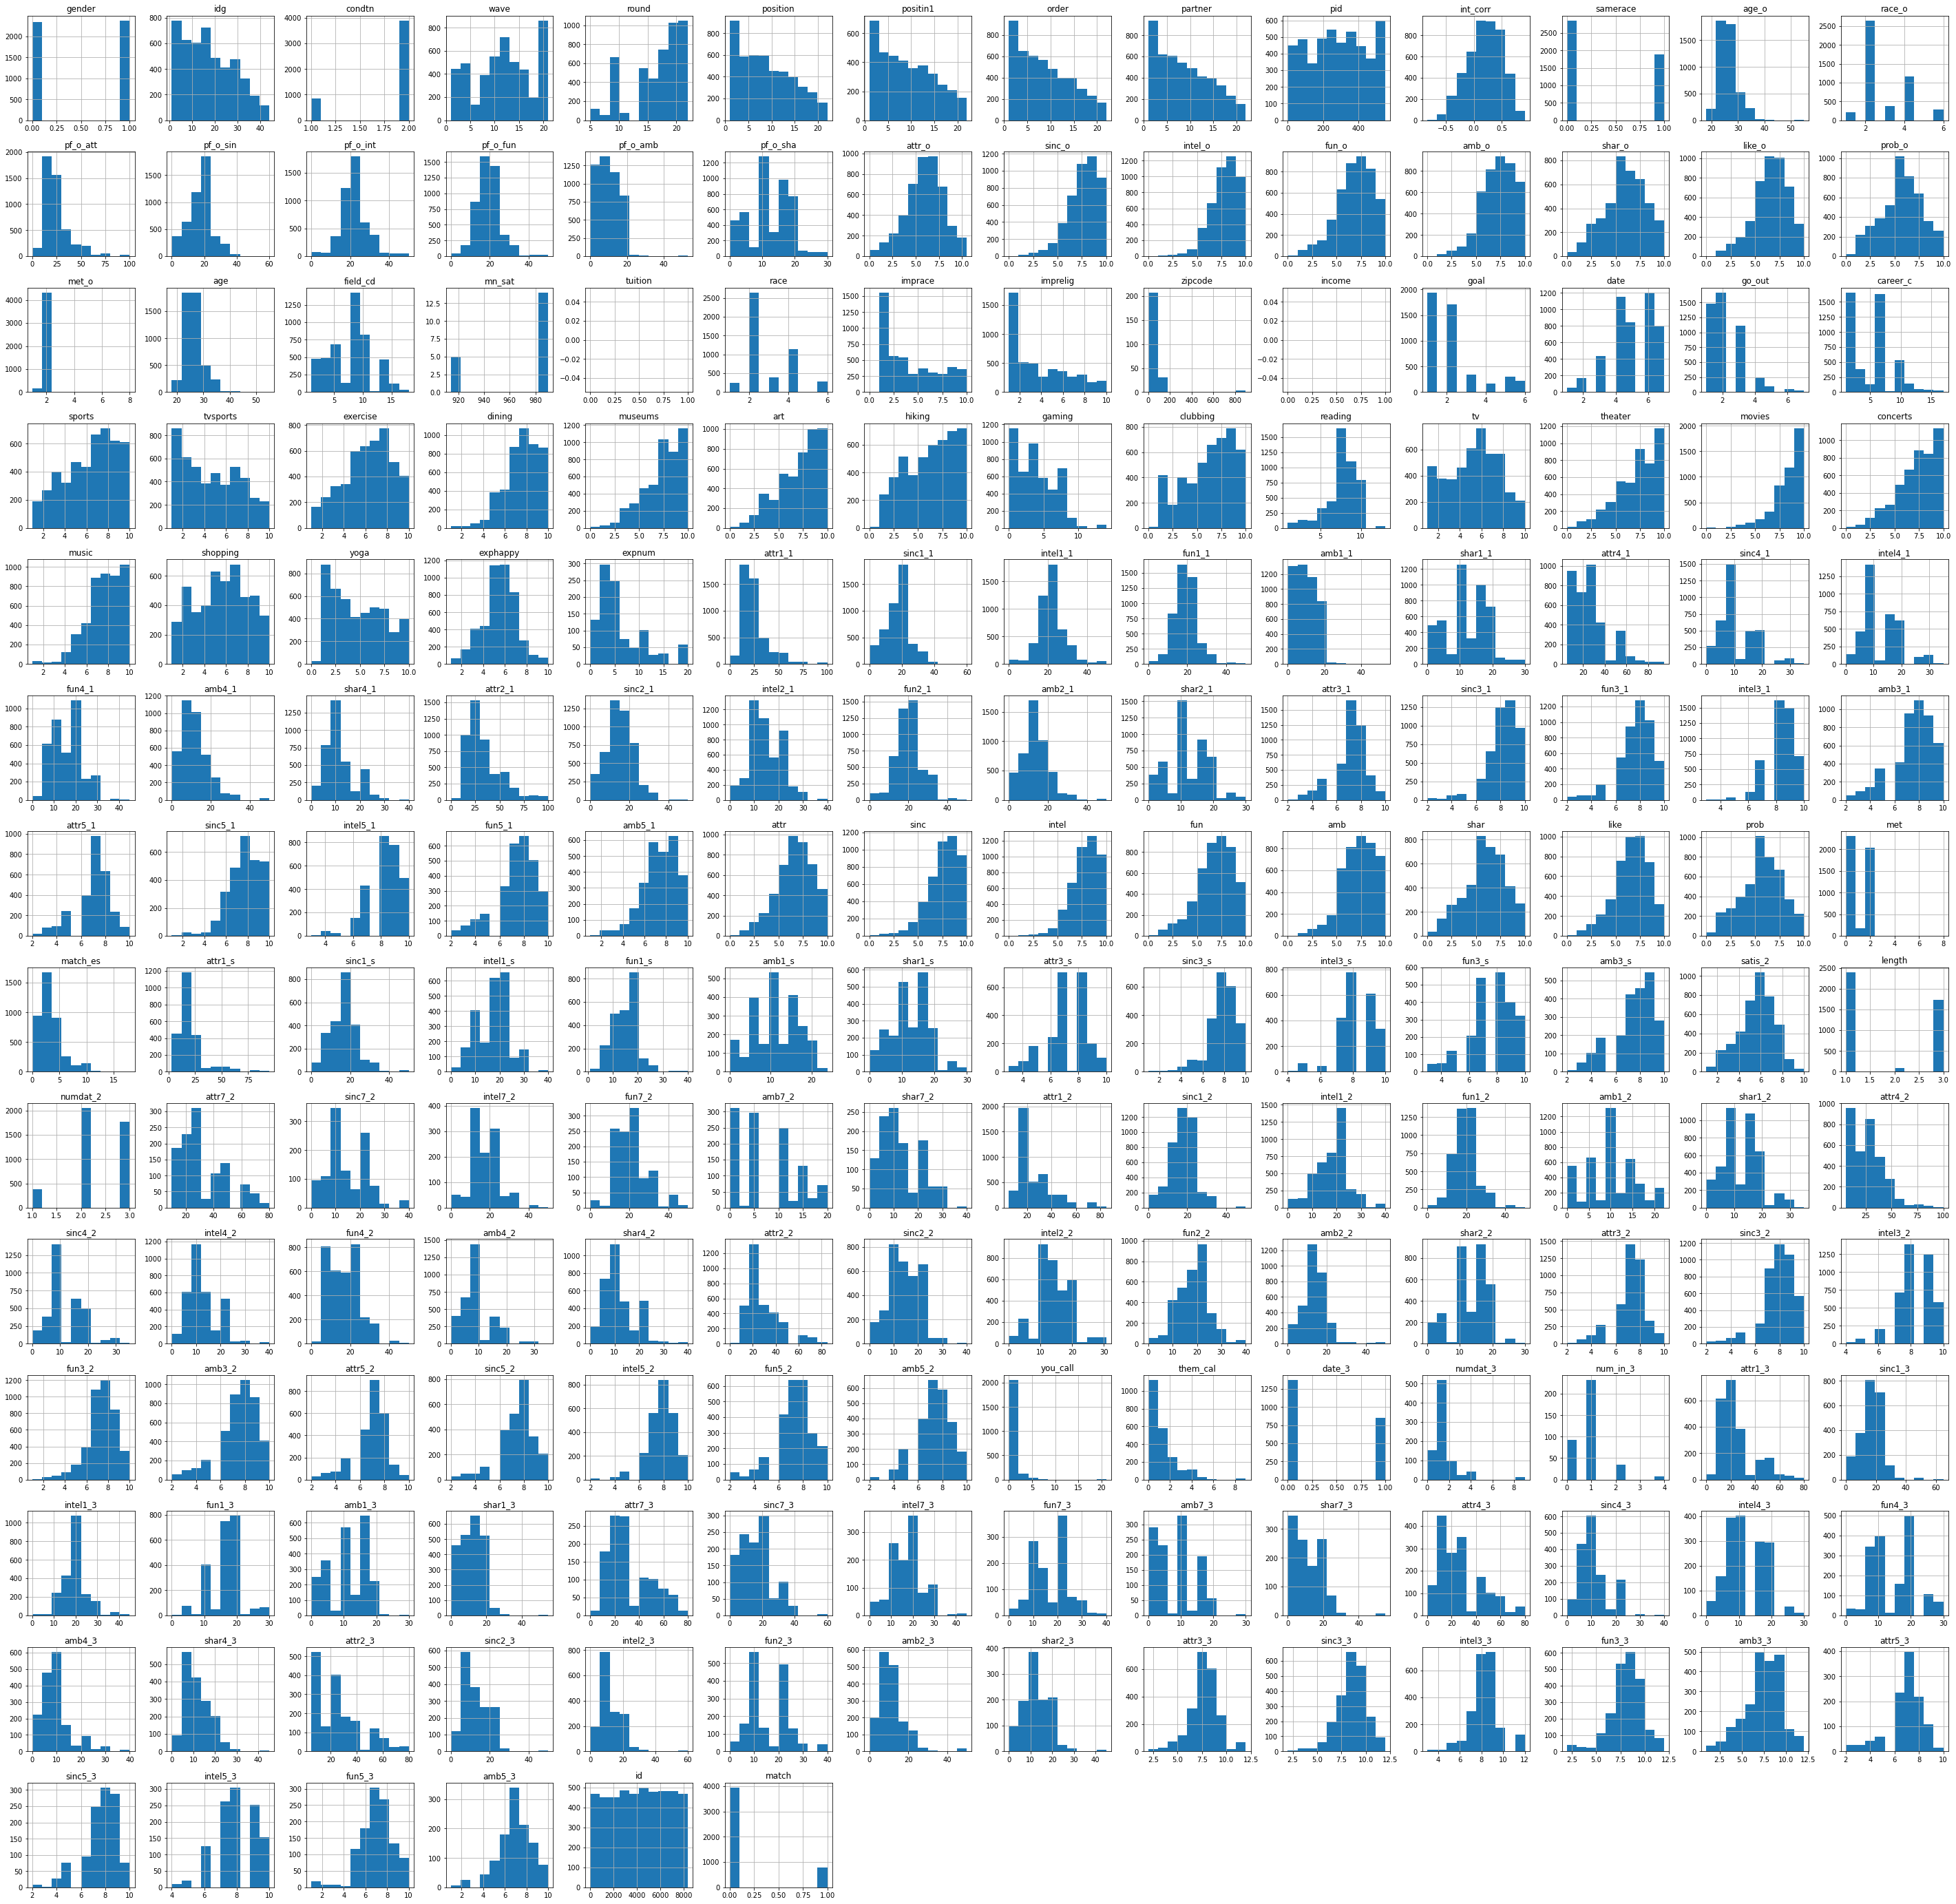

In [ ]:
plt.rcParams['figure.figsize'] = [50, 50]
train_data.hist()

 **Observation** 💡💡💡💡💡

- The data has data points far from each other. So, we will need to provide scaling to improve the performance.
- Most of columns are skewed distributed. Let's visualize all columns to see the distribution of data, The rest is almost normal distributed. Scaler can reduce the effect of skewed distribution. we will try different techiniques later on to choose the suitable technique.



### Describe categorigal data

In [ ]:
print("Number of categorical columns in the data is : ", train_data.describe(include=['O']).shape[1])
train_data.describe(include=['O'])

Number of categorical columns in the data is :  8


field undergra    mn_sat    tuition      from zipcode     income  \
count       4687     2781      1780       2031      4676    4142       2405   
unique       259      241        68        115       269     408        260   
top     Business  Harvard  1,400.00  26,908.00  New York       0  55,080.00   
freq         286       72       224        143       298     207         62   

           career  
count        4671  
unique        367  
top     professor  
freq          108

**Observations**💡💡💡💡💡


We have 8 object features. We noticed that :

- mn_sat,	tuition, zipcode, and	income are numeric not string. So,we visualize the values for each column from them to confirm taht all values are numbers.There are  serveral missing values.we will calculate the percent of missing values later.

- field variable as 259 possible values with 5.5% Business (top=Business, freq=259/count=4687).There is about 40 smaples are missing. This feature has a high cardinality(we can solve this problem later)

- undergra variable as 241 possible values with 2.5% Harvard (top=Harvard, freq=72/count=2781).There is about 1949 smaples are missing. This feature has a little bit high cardinality(we can solve this problem later).It has serveral missing values about 41%  ((4727-2781)/4727).

- from variable as 269 possible values with 6.4% NewYork (top=NewYork , freq=298/count=4676). There is about 51 smaples are missing. This feature has a little bit high cardinality(we can solve this problem later).


- career variable as 367 possible values with 2.3% professor (top=professor, freq=108/count=4671).There is about 56 smaples are missing. his feature has a little bit high cardinality(we can solve this problem later).


Don't worry, we will check null values later. 


['MFA Creative Writing' 'Law' 'Social Work' 'sociology' 'film' 'MBA'
 'Electrical Engg.' 'Comparative Literature' 'Statistics' 'Math'
 'Business, Media' 'International affairs' 'Medical Informatics'
 'medicine and biochemistry' 'Political Science' 'EDUCATION' 'philosophy'
 'business' 'Urban Planning' 'Engineering' 'Business' nan
 'Anthropology/Education' 'Creative Writing (Nonfiction)'
 'International Affairs' 'Electrical Engineering' 'Biochemistry'
 'financial math' 'Mechanical Engineering' 'Business- MBA'
 'Economics, Sociology' 'International Affairs/Finance' 'Mathematics, PhD'
 'Education- Literacy Specialist' 'electrical engineering'
 'Business (MBA)' 'Genetics' 'Education' 'law' 'medicine'
 'Social Work/SIPA' 'biotechnology' 'Creative Writing - Nonfiction'
 'Biomedical engineering' 'business school' 'Health policy' 'nutrition'
 'Communications' 'microbiology' 'School Psychology'
 'international affairs/international finance' 'music education'
 'Mathematics' 'Ecology' 'Art History

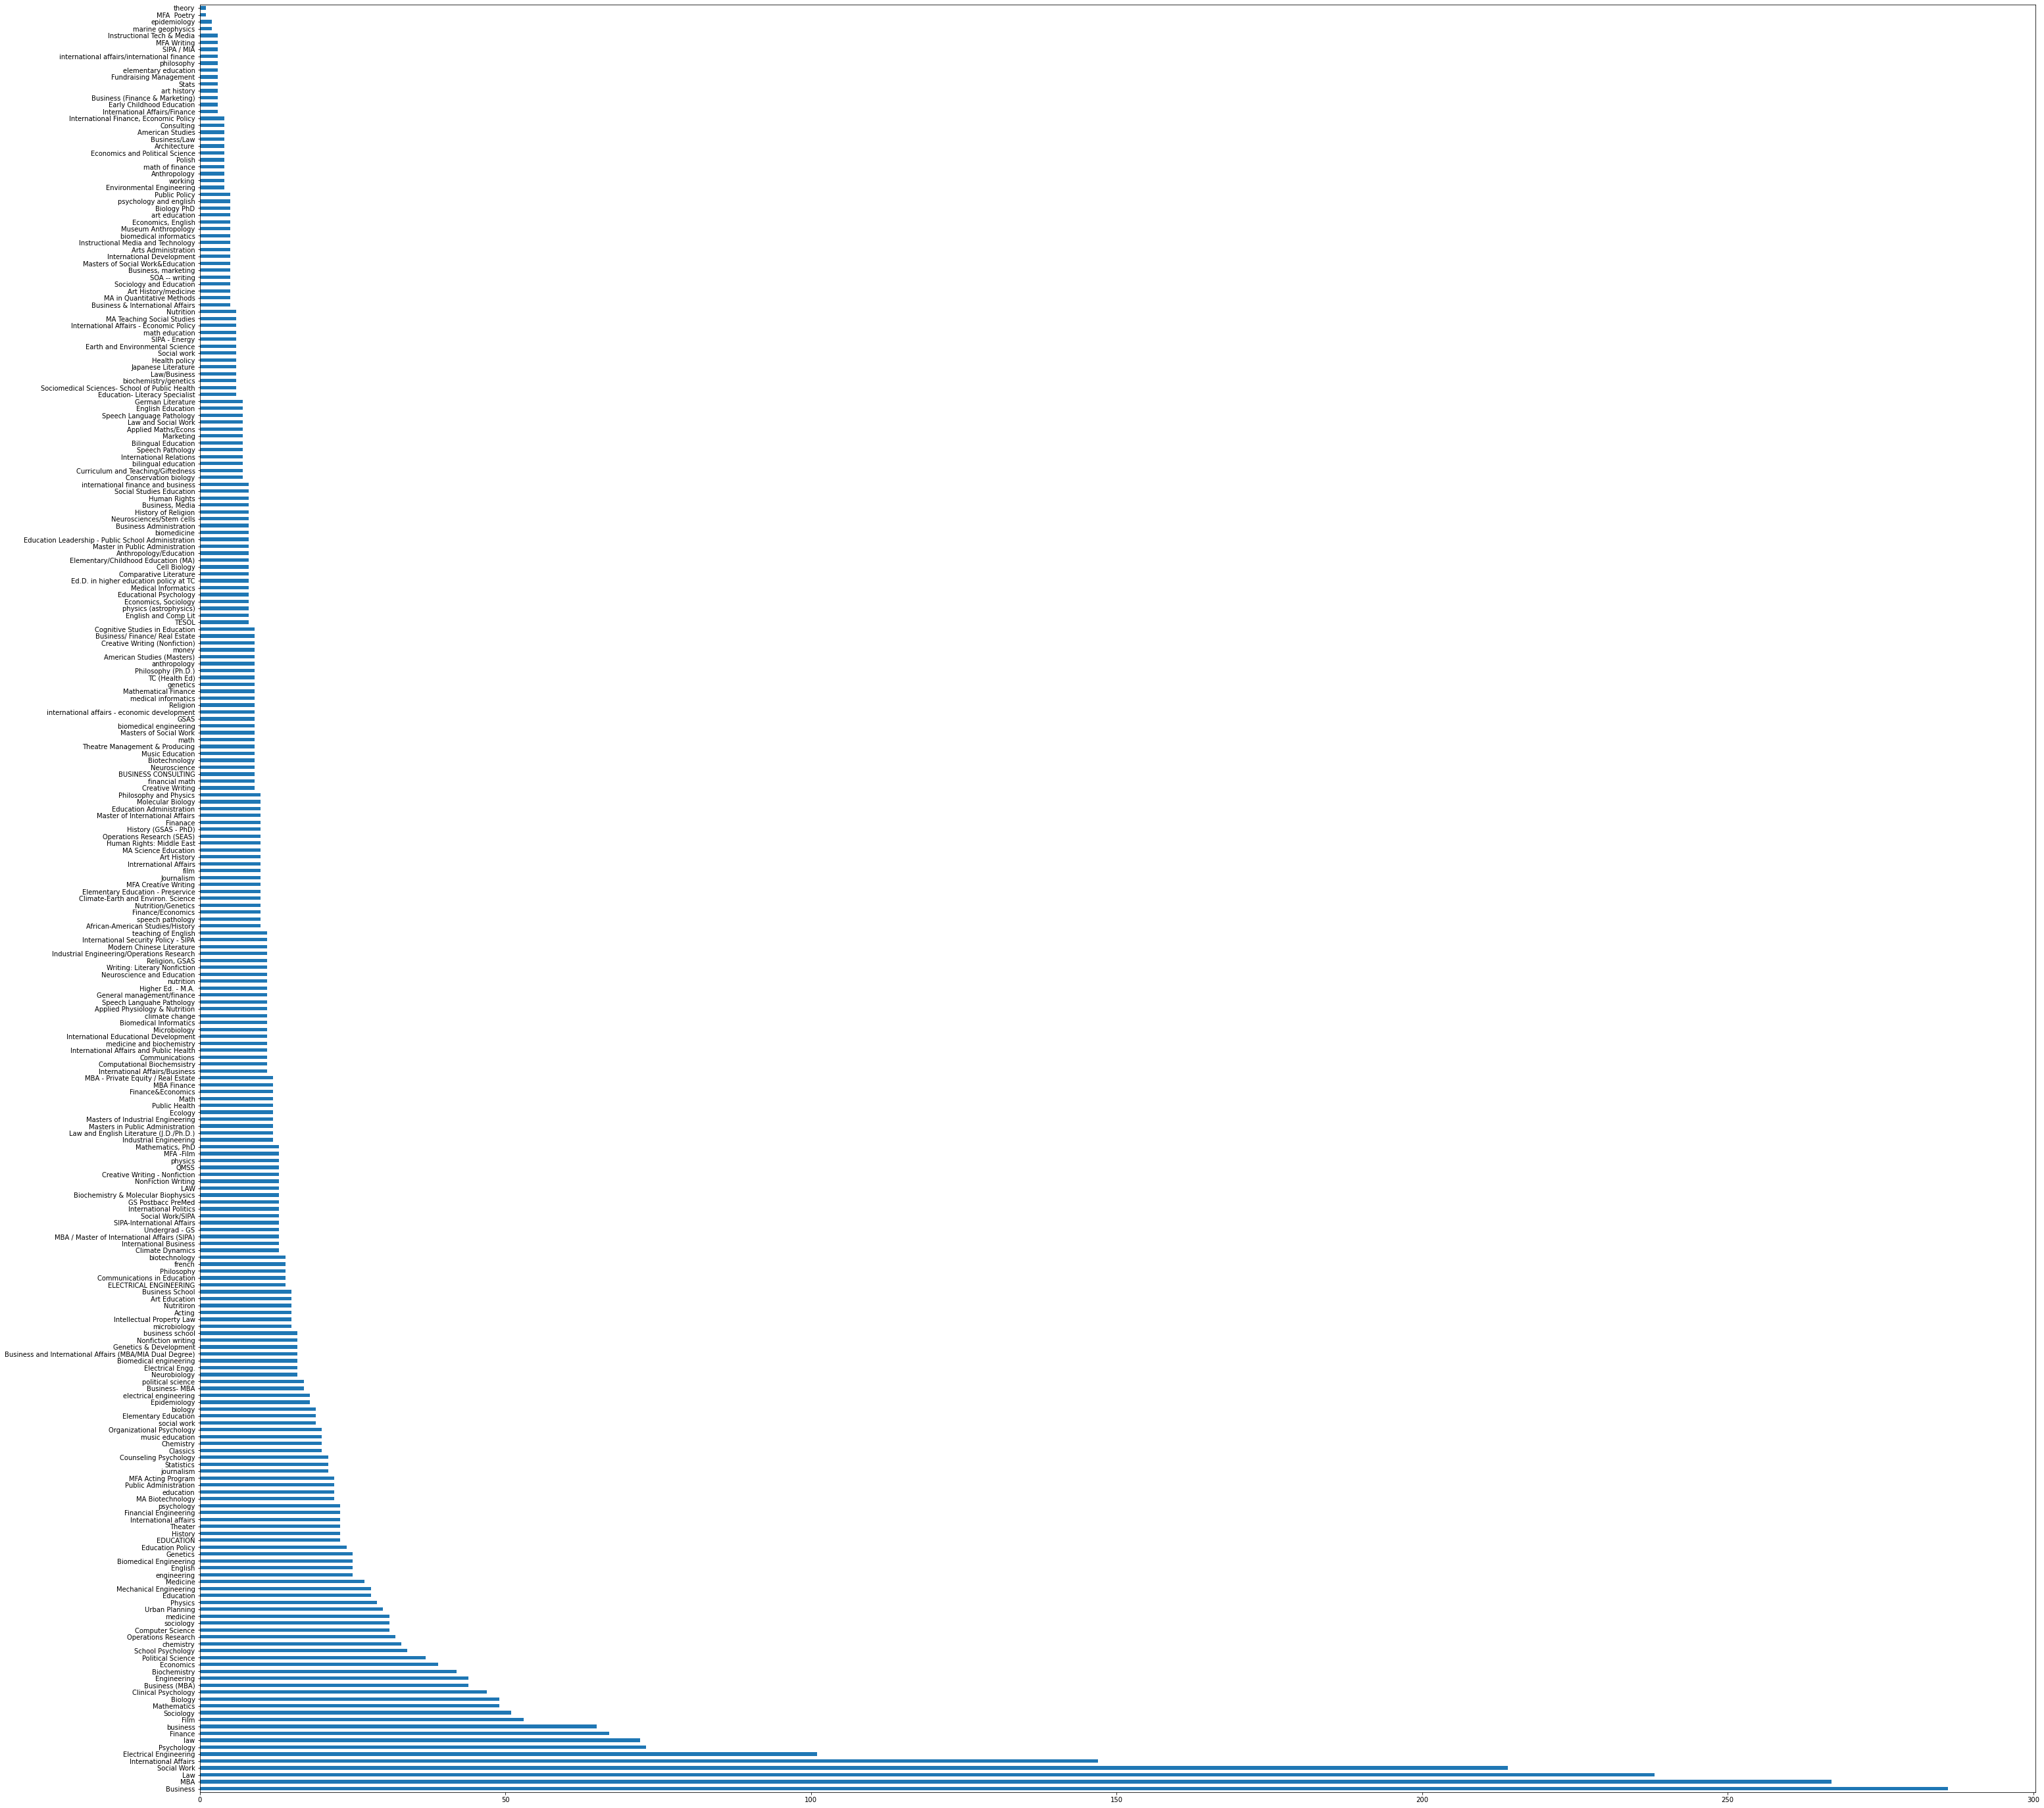

[nan 'Princeton' 'Princeton University' 'NYU' 'REC, Rourkela' 'NUS'
 'Naples, Italy' 'UC Berkeley' 'Harvard' 'Universidad Iberoamericana'
 'UC, IRVINE!!!!!!!!!' 'UCLA' 'University of Reading, England' 'Cornell'
 'Miami University' 'Wesleyan University' 'University of Vermont'
 'McGill University' 'Engineering' 'Tianjin University in China' 'CSUN'
 'University of North Carolina at Charlotte'
 'Monash University - Australia' 'Washington U. in St. Louis'
 'SUNY Binghamton' 'Texas State University' 'Delhi University' 'Rice'
 'Bowdoin College' 'Columbia University' 'Santa Clara University'
 'Georgetown' 'washington university in st louis' 'Columbia'
 'Cooper Union, Bard college, and SUNY Purchase' 'nyu' 'UW Madison'
 'SUNY Stony Brook' 'Fordham University' 'Shia-Chian University'
 'Queens College' 'George Washington University' 'Barnard College'
 'Taiwan University' 'University of Tennessee'
 'school of social sciences in uruguay' 'university of pennsylvania'
 'Purdue' 'Rutgers University' 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


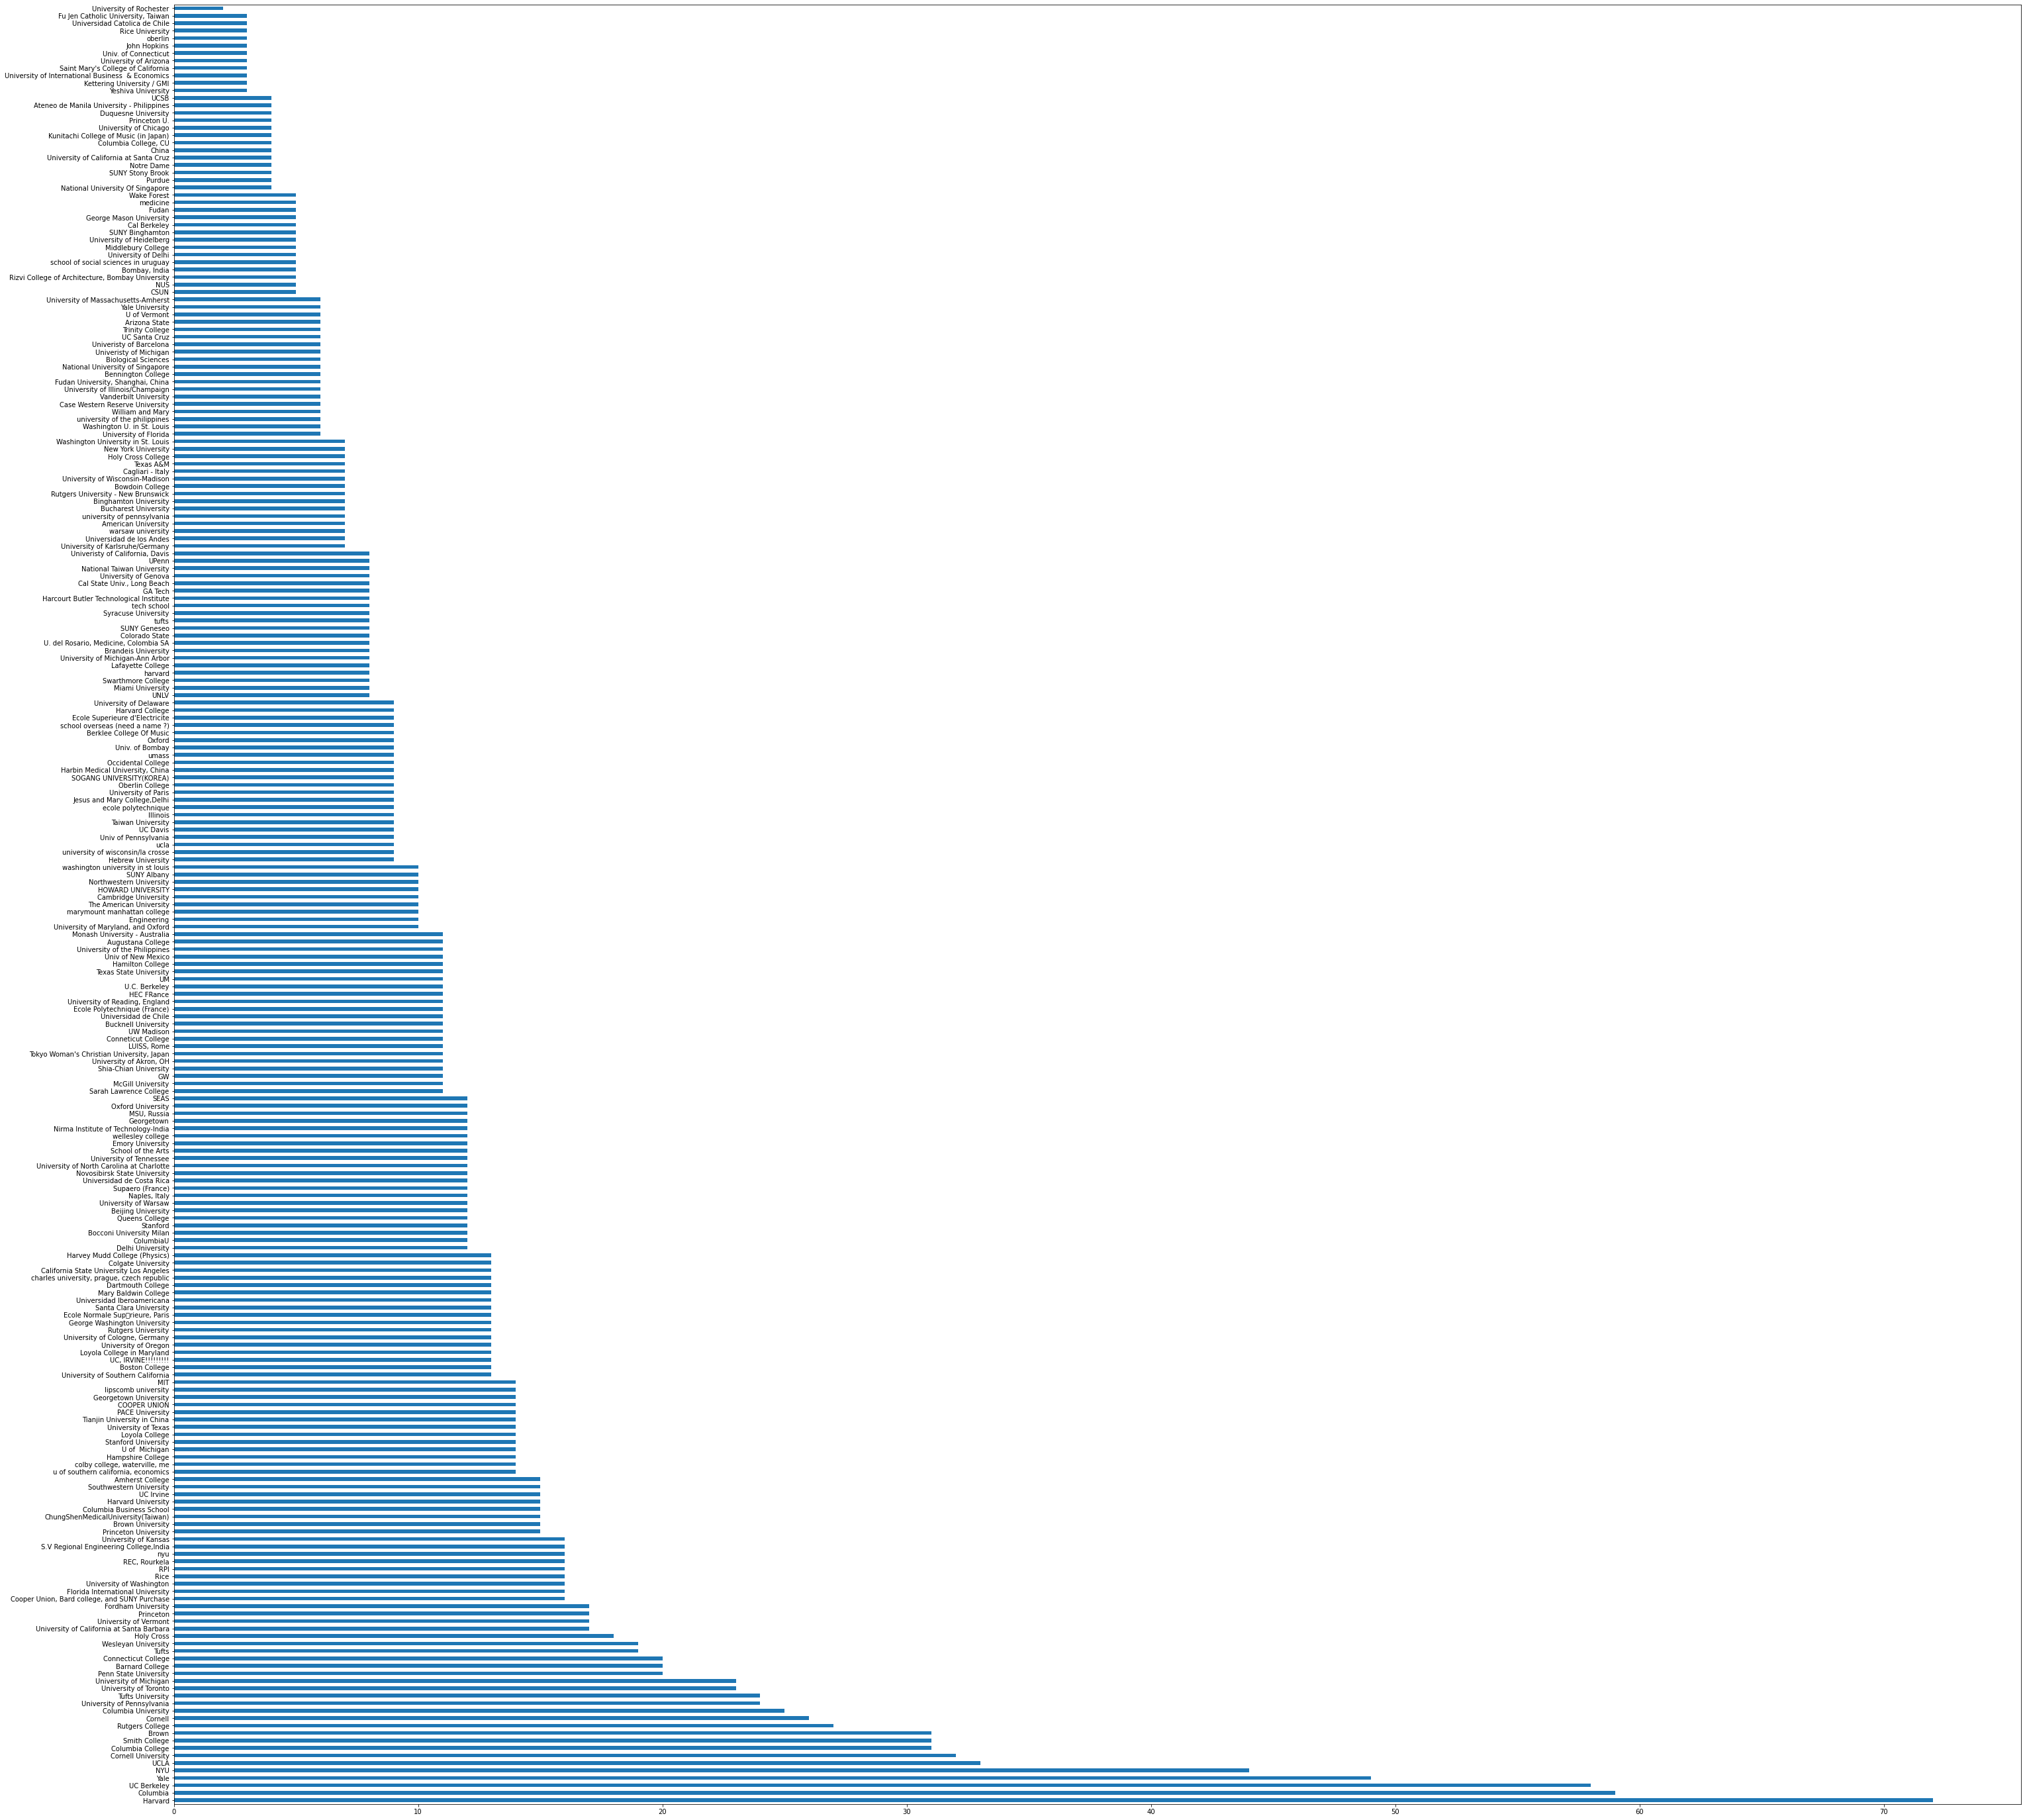

[nan '1,460.00' '1,340.00' '1,309.00' '1,400.00' '1,157.00' '1,290.00'
 '1,360.00' '1,250.00' '1,380.00' '1,130.00' '914' '1,260.00' '1,215.00'
 '1,410.00' '1,370.00' '1,430.00' '1,239.00' '1,210.00' '1,140.00'
 '1,160.00' '1,100.00' '1,330.00' '1,092.00' '1,134.00' '1,188.00'
 '1,270.00' '1,450.00' '1,180.00' '1,227.00' '1,341.00' '1,178.00'
 '1,080.00' '990' '1,200.00' '1,011.00' '1,310.00' '1,258.00' '1,185.00'
 '1,331.00' '1,110.00' '1,034.00' '1,149.00' '1,308.00' '1,105.00'
 '1,030.00' '1,212.00' '1,320.00' '1,365.00' '1,070.00' '1,230.00'
 '1,060.00' '1,050.00' '1,470.00' '1,097.00' '1,090.00' '1,280.00'
 '1,490.00' '1,155.00' '1,206.00' '1,214.00' '1,220.00' '1,014.00'
 '1,402.00' '1,242.00' '1,191.00' '1,159.00' '1,267.00' '1,099.00']


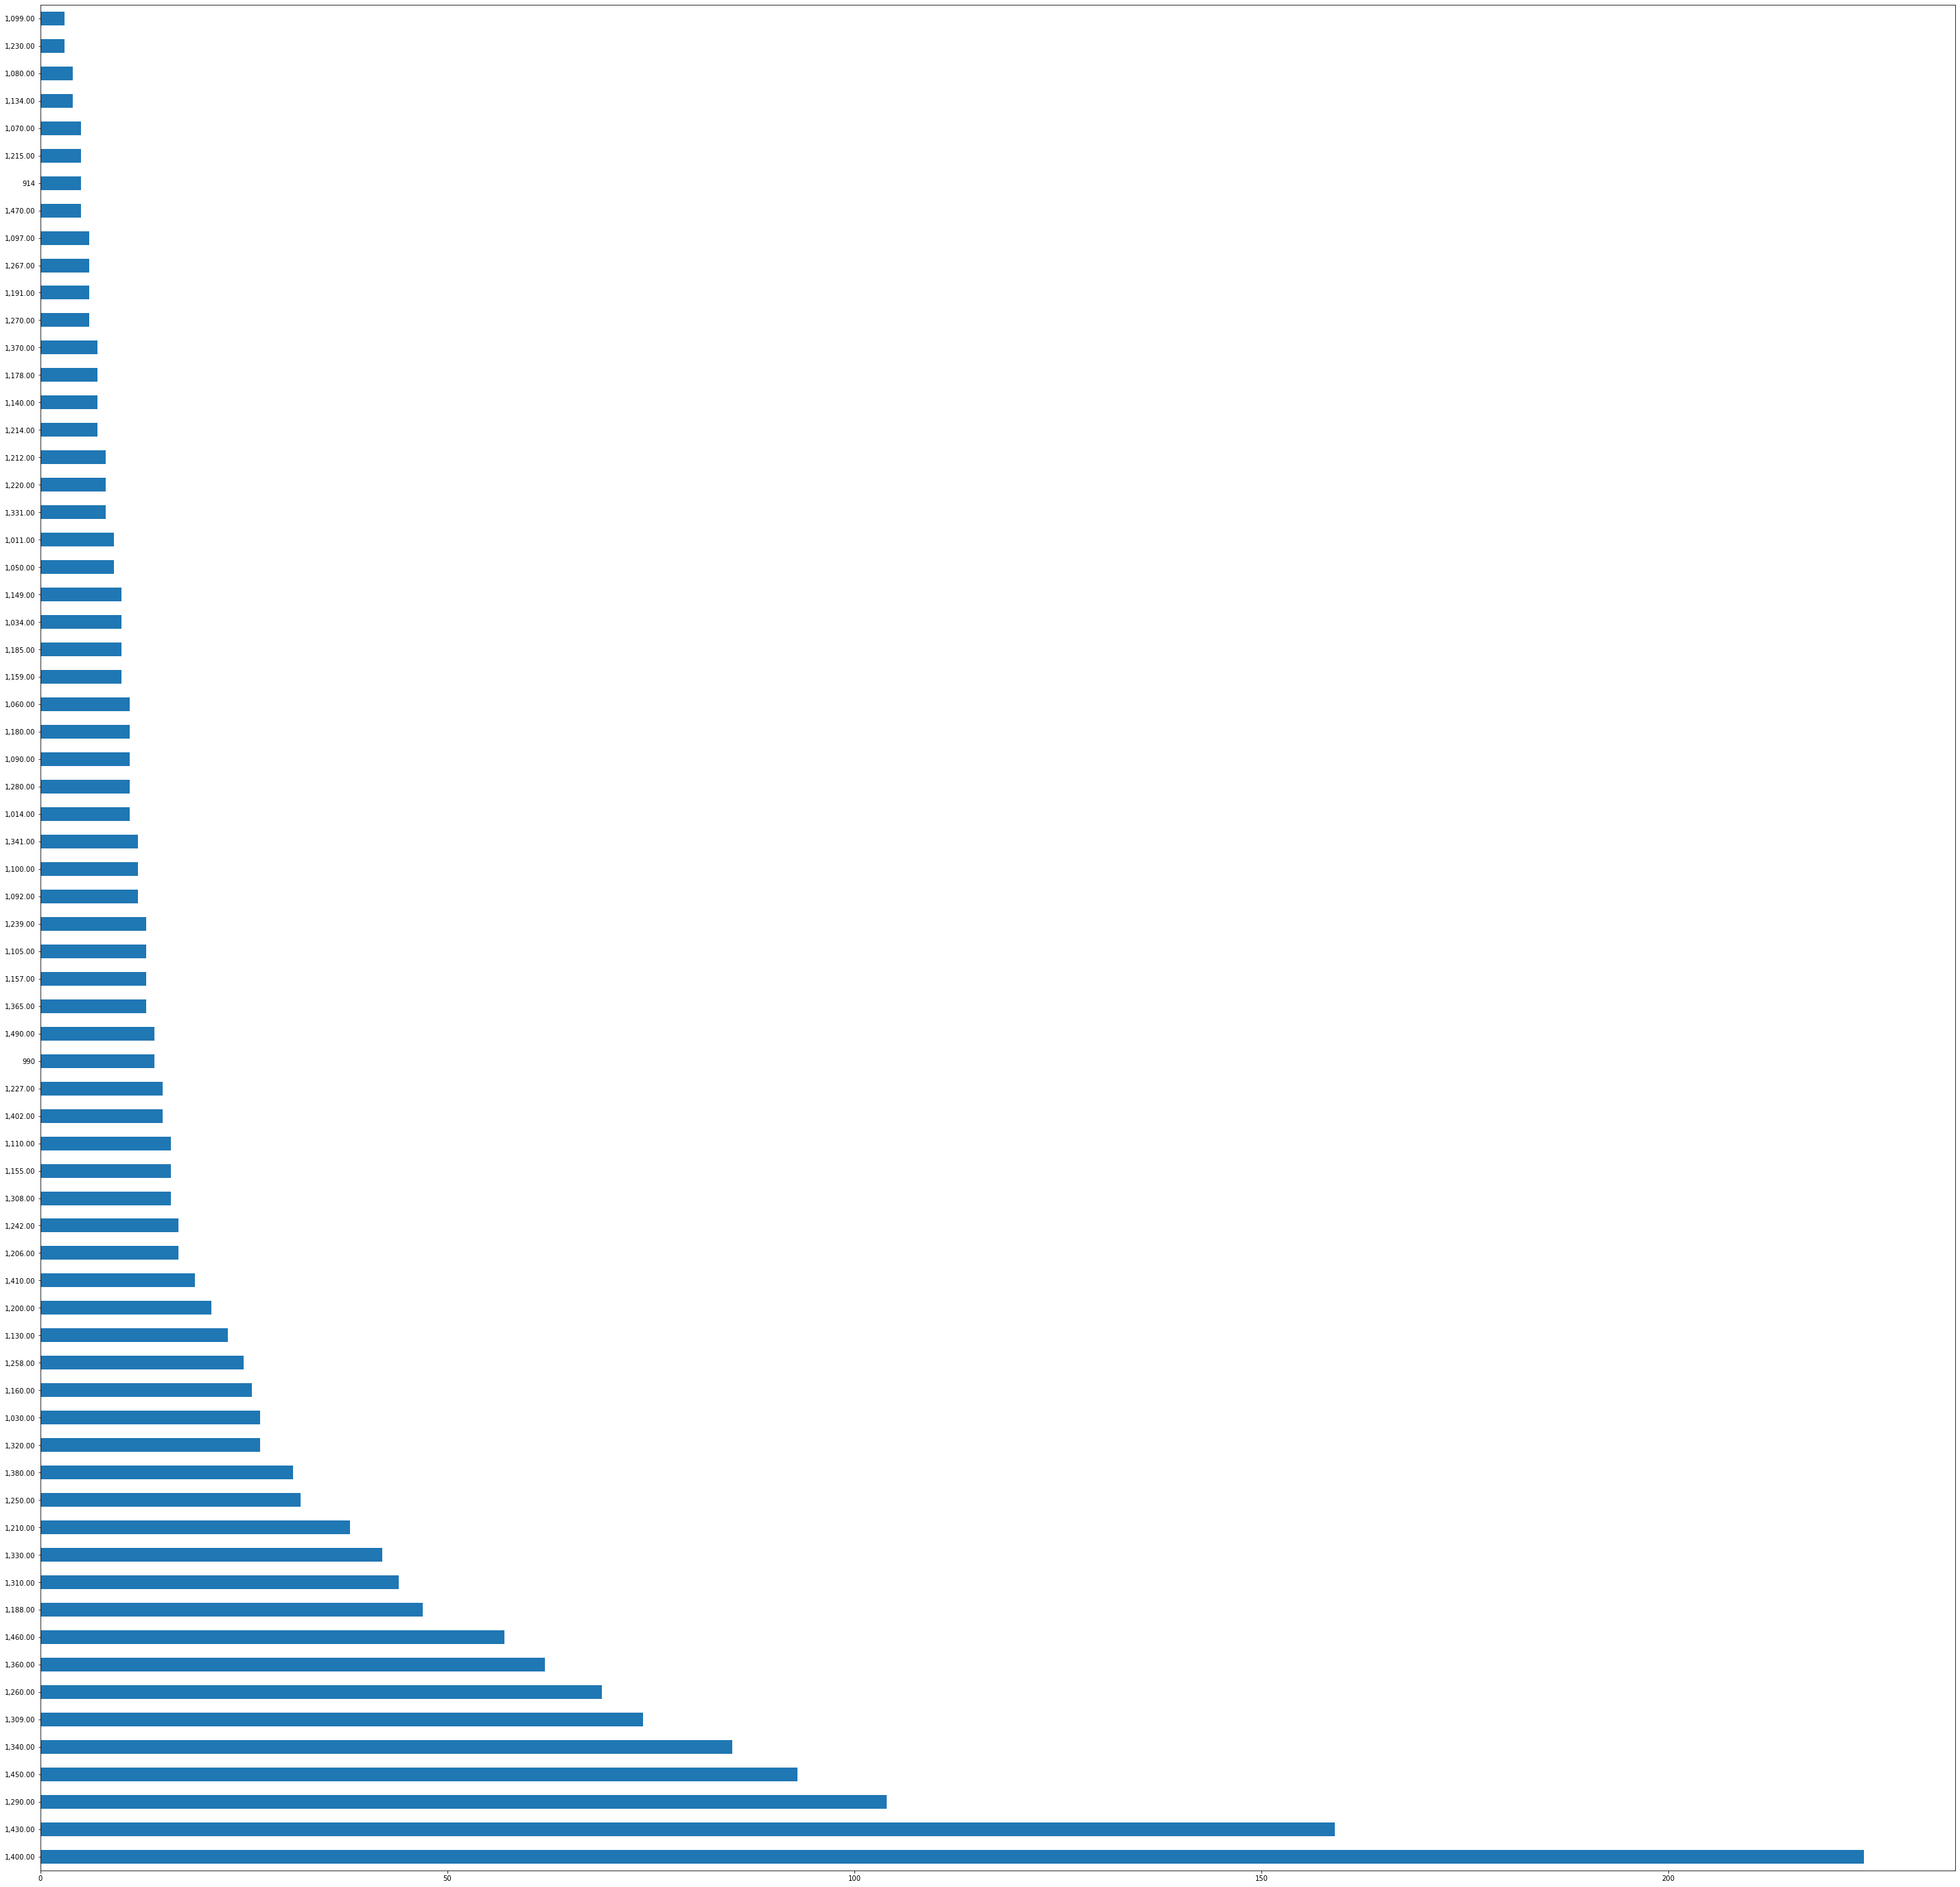

[nan '27,230.00' '25,380.00' '15,162.00' '26,019.00' '15,260.00'
 '15,309.00' '26,062.00' '14,589.00' '27,100.00' '20,100.00' '9,790.00'
 '13,211.00' '26,377.00' '9,451.00' '17,125.00' '25,890.00' '26,908.00'
 '20,337.00' '25,425.00' '12,900.00' '9,168.00' '22,170.00' '11,360.00'
 '26,170.00' '24,036.00' '11,570.00' '26,630.00' '13,872.00' '11,311.00'
 '26,786.00' '18,720.00' '16,650.00' '25,504.00' '14,388.00' '26,871.00'
 '27,395.00' '10,052.00' '17,478.00' '10,096.00' '25,552.00' '14,915.00'
 '24,742.00' '9,729.00' '33,585.00' '26,892.00' '25,020.00' '26,100.00'
 '9,620.00' '12,350.00' '10,450.00' '14,695.00' '15,004.00' '25,555.00'
 '14,493.00' '24,921.00' '17,030.00' '9,210.00' '25,533.00' '27,025.00'
 '25,847.00' '8,421.00' '25,917.00' '12,696.00' '9,696.00' '18,656.00'
 '13,413.00' '3,730.00' '23,500.00' '21,645.00' '15,990.00' '25,335.00'
 '11,424.00' '34,290.00' '14,433.00' '26,376.00' '34,300.00' '9,162.00'
 '10,352.00' '19,525.00' '26,580.00' '27,350.00' '27,728.00' '25,026.

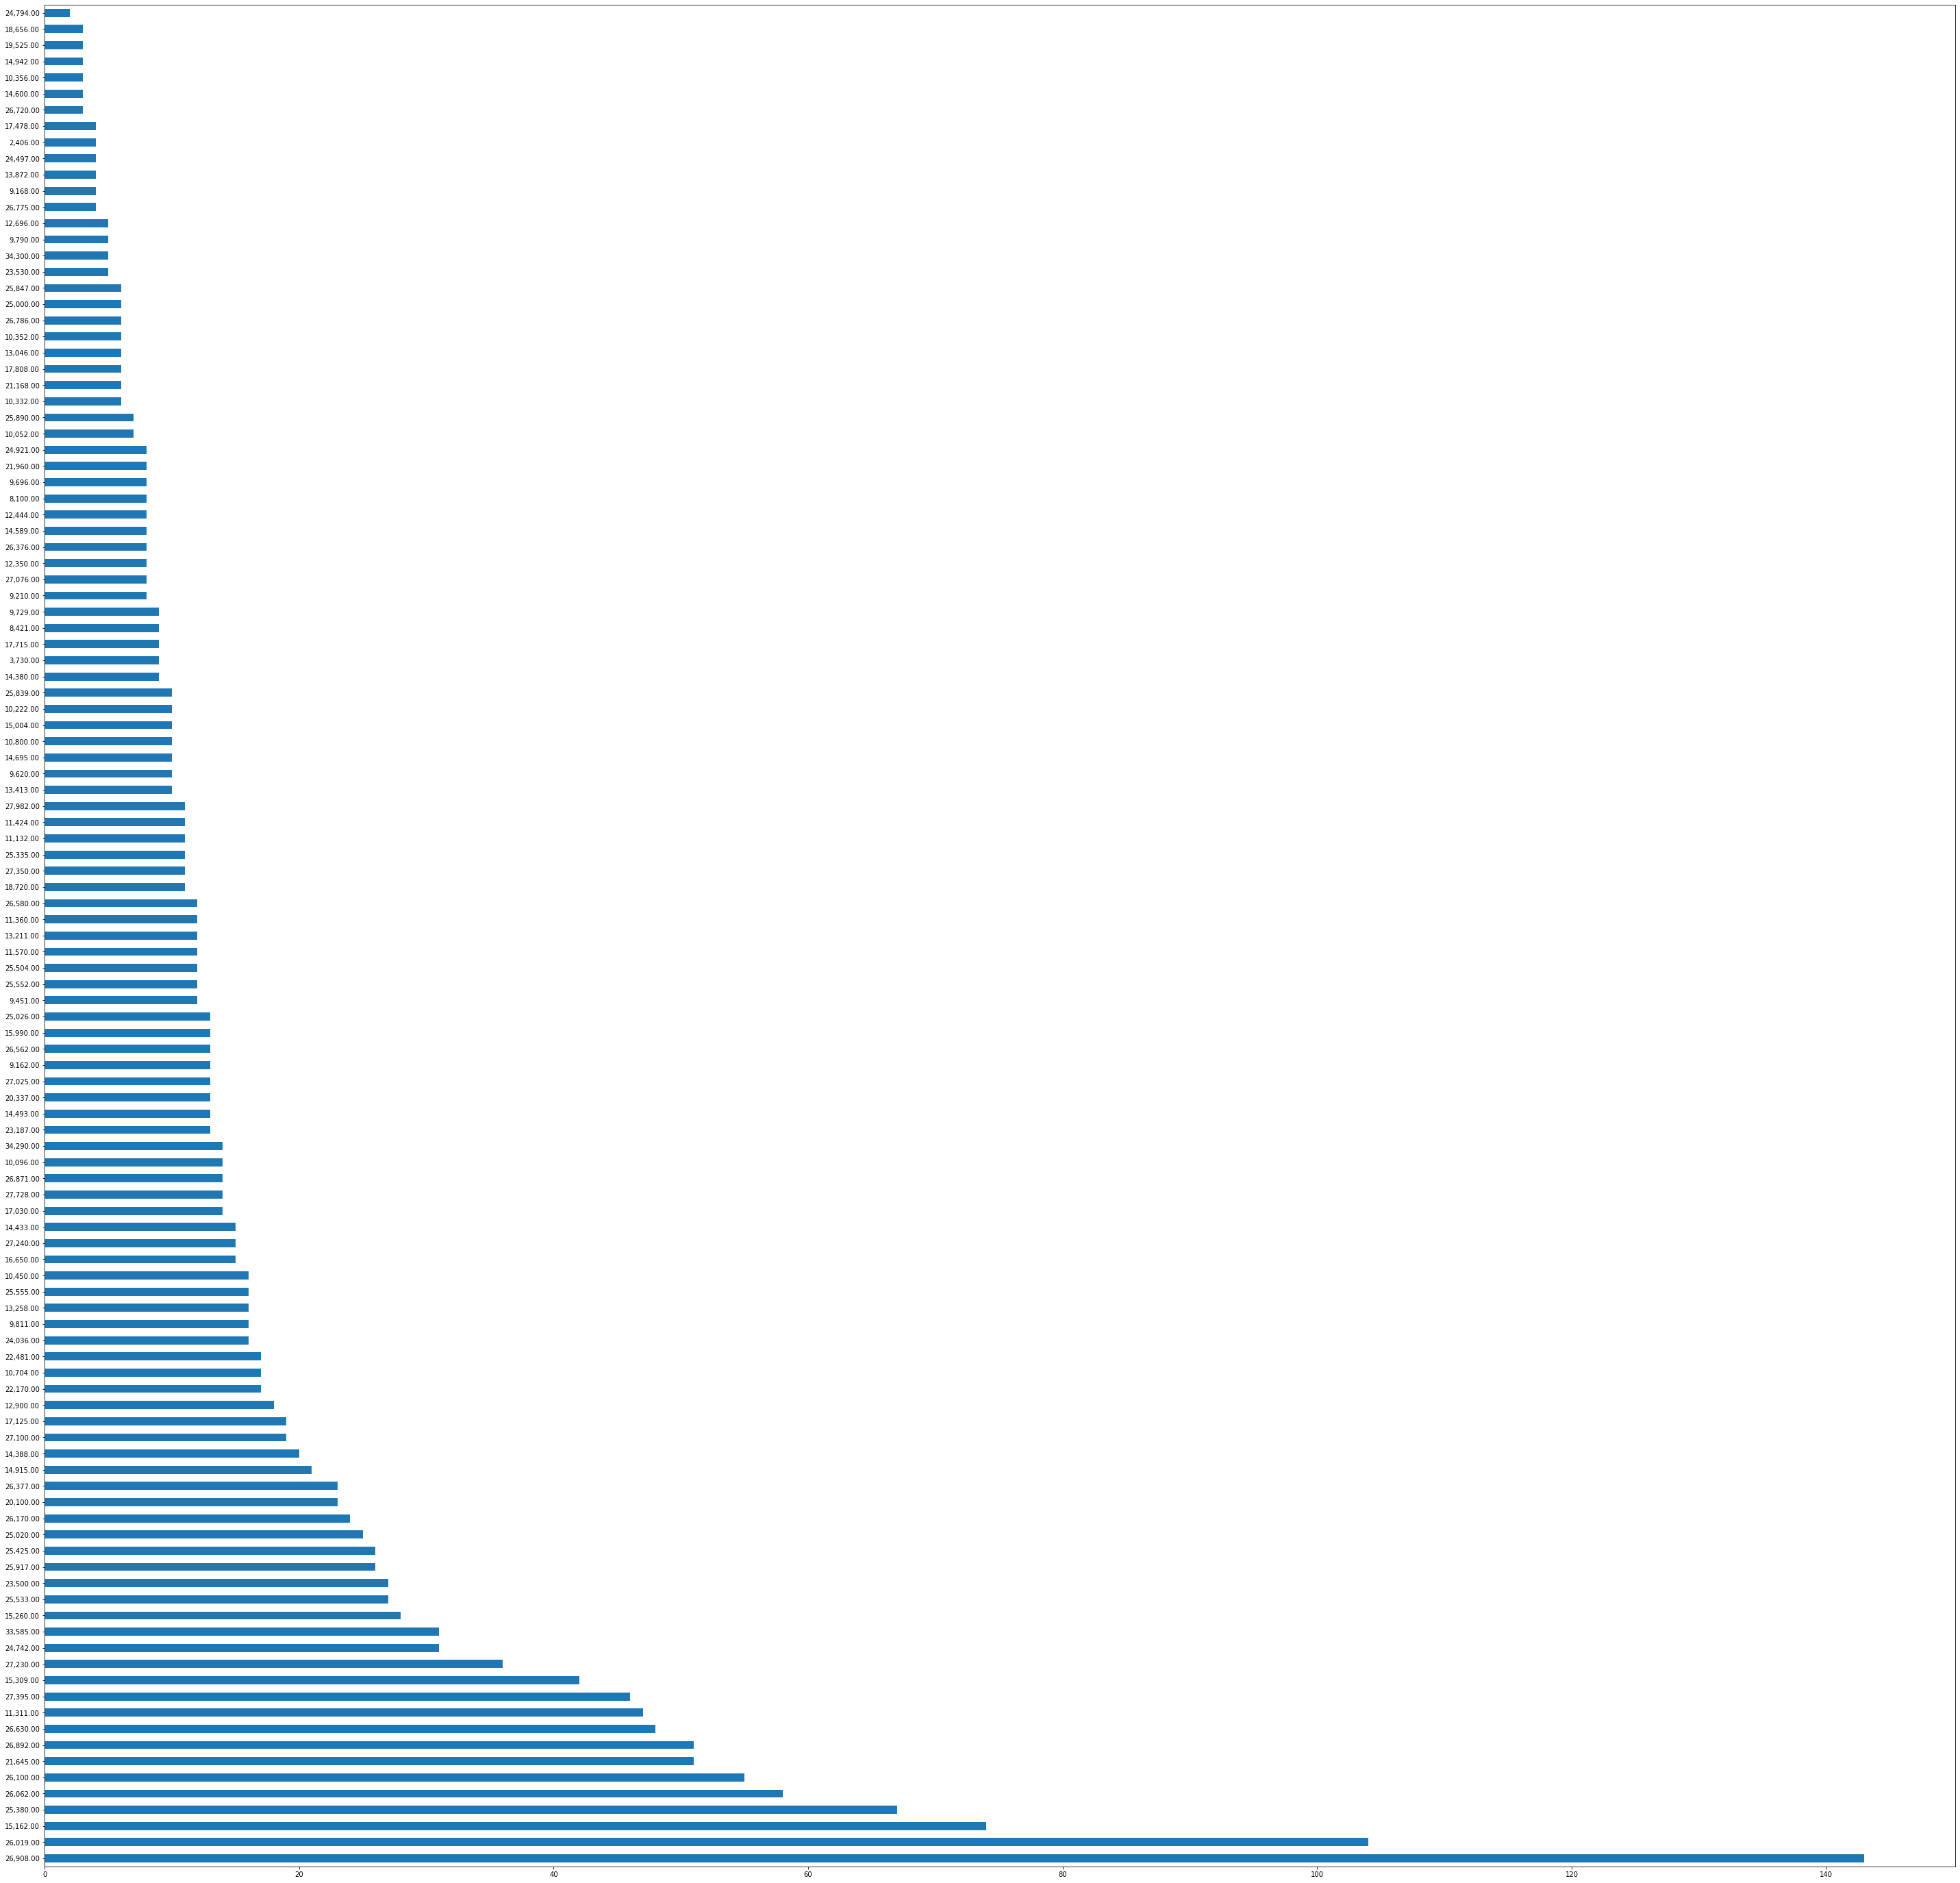

['St. Louis, MO' 'New York' 'Iowa' 'Northern New Jersey'
 'Palo Alto, California' 'NYC' 'Boston' 'Asia, Singapore' 'Queens' 'Italy'
 'NYC, San Francisco' 'China' 'Kansas' 'New Jersey' 'Mexico' 'CALIFORNIA'
 'New York, NY' 'Philadelphia, PA' 'California' 'Greece' nan 'Buffalo, NY'
 'San Francisco Bay Area' 'New York City' 'Canada' 'India' 'Chicago'
 'Long Island, NY' 'UNCC' 'Australia' 'Pennsylvania' 'Germany' 'Texas'
 'Bangladesh' 'Connecticut' 'Washington, DC' 'Michigan' 'Hawaii' 'alabama'
 'Southern California' 'Born in Iran' 'new york' 'Ohio' 'Maryland'
 'Minneapolis, MN' 'spain' 'brooklyn, ny' 'Atlanta, GA' 'San Diego, CA'
 'Taiwan' 'Russia' 'Atlanta' 'Cambridge, Massachusetts' 'North Carolina'
 'uruguay' 'Westchester County, N.Y.' 'Arizona' 'Indiana' 'Brooklyn, NY'
 'Spain' 'Westchester, new York' 'Silver Spring, MD'
 'New York/South Korea/Japan' 'Persia' 'Vestal' 'Rochester, NY'
 'San Francisco' 'Argentina' 'Ottawa, Canada' 'Palm Springs, California'
 'Taipei, Taiwan' 'Milan, Ita

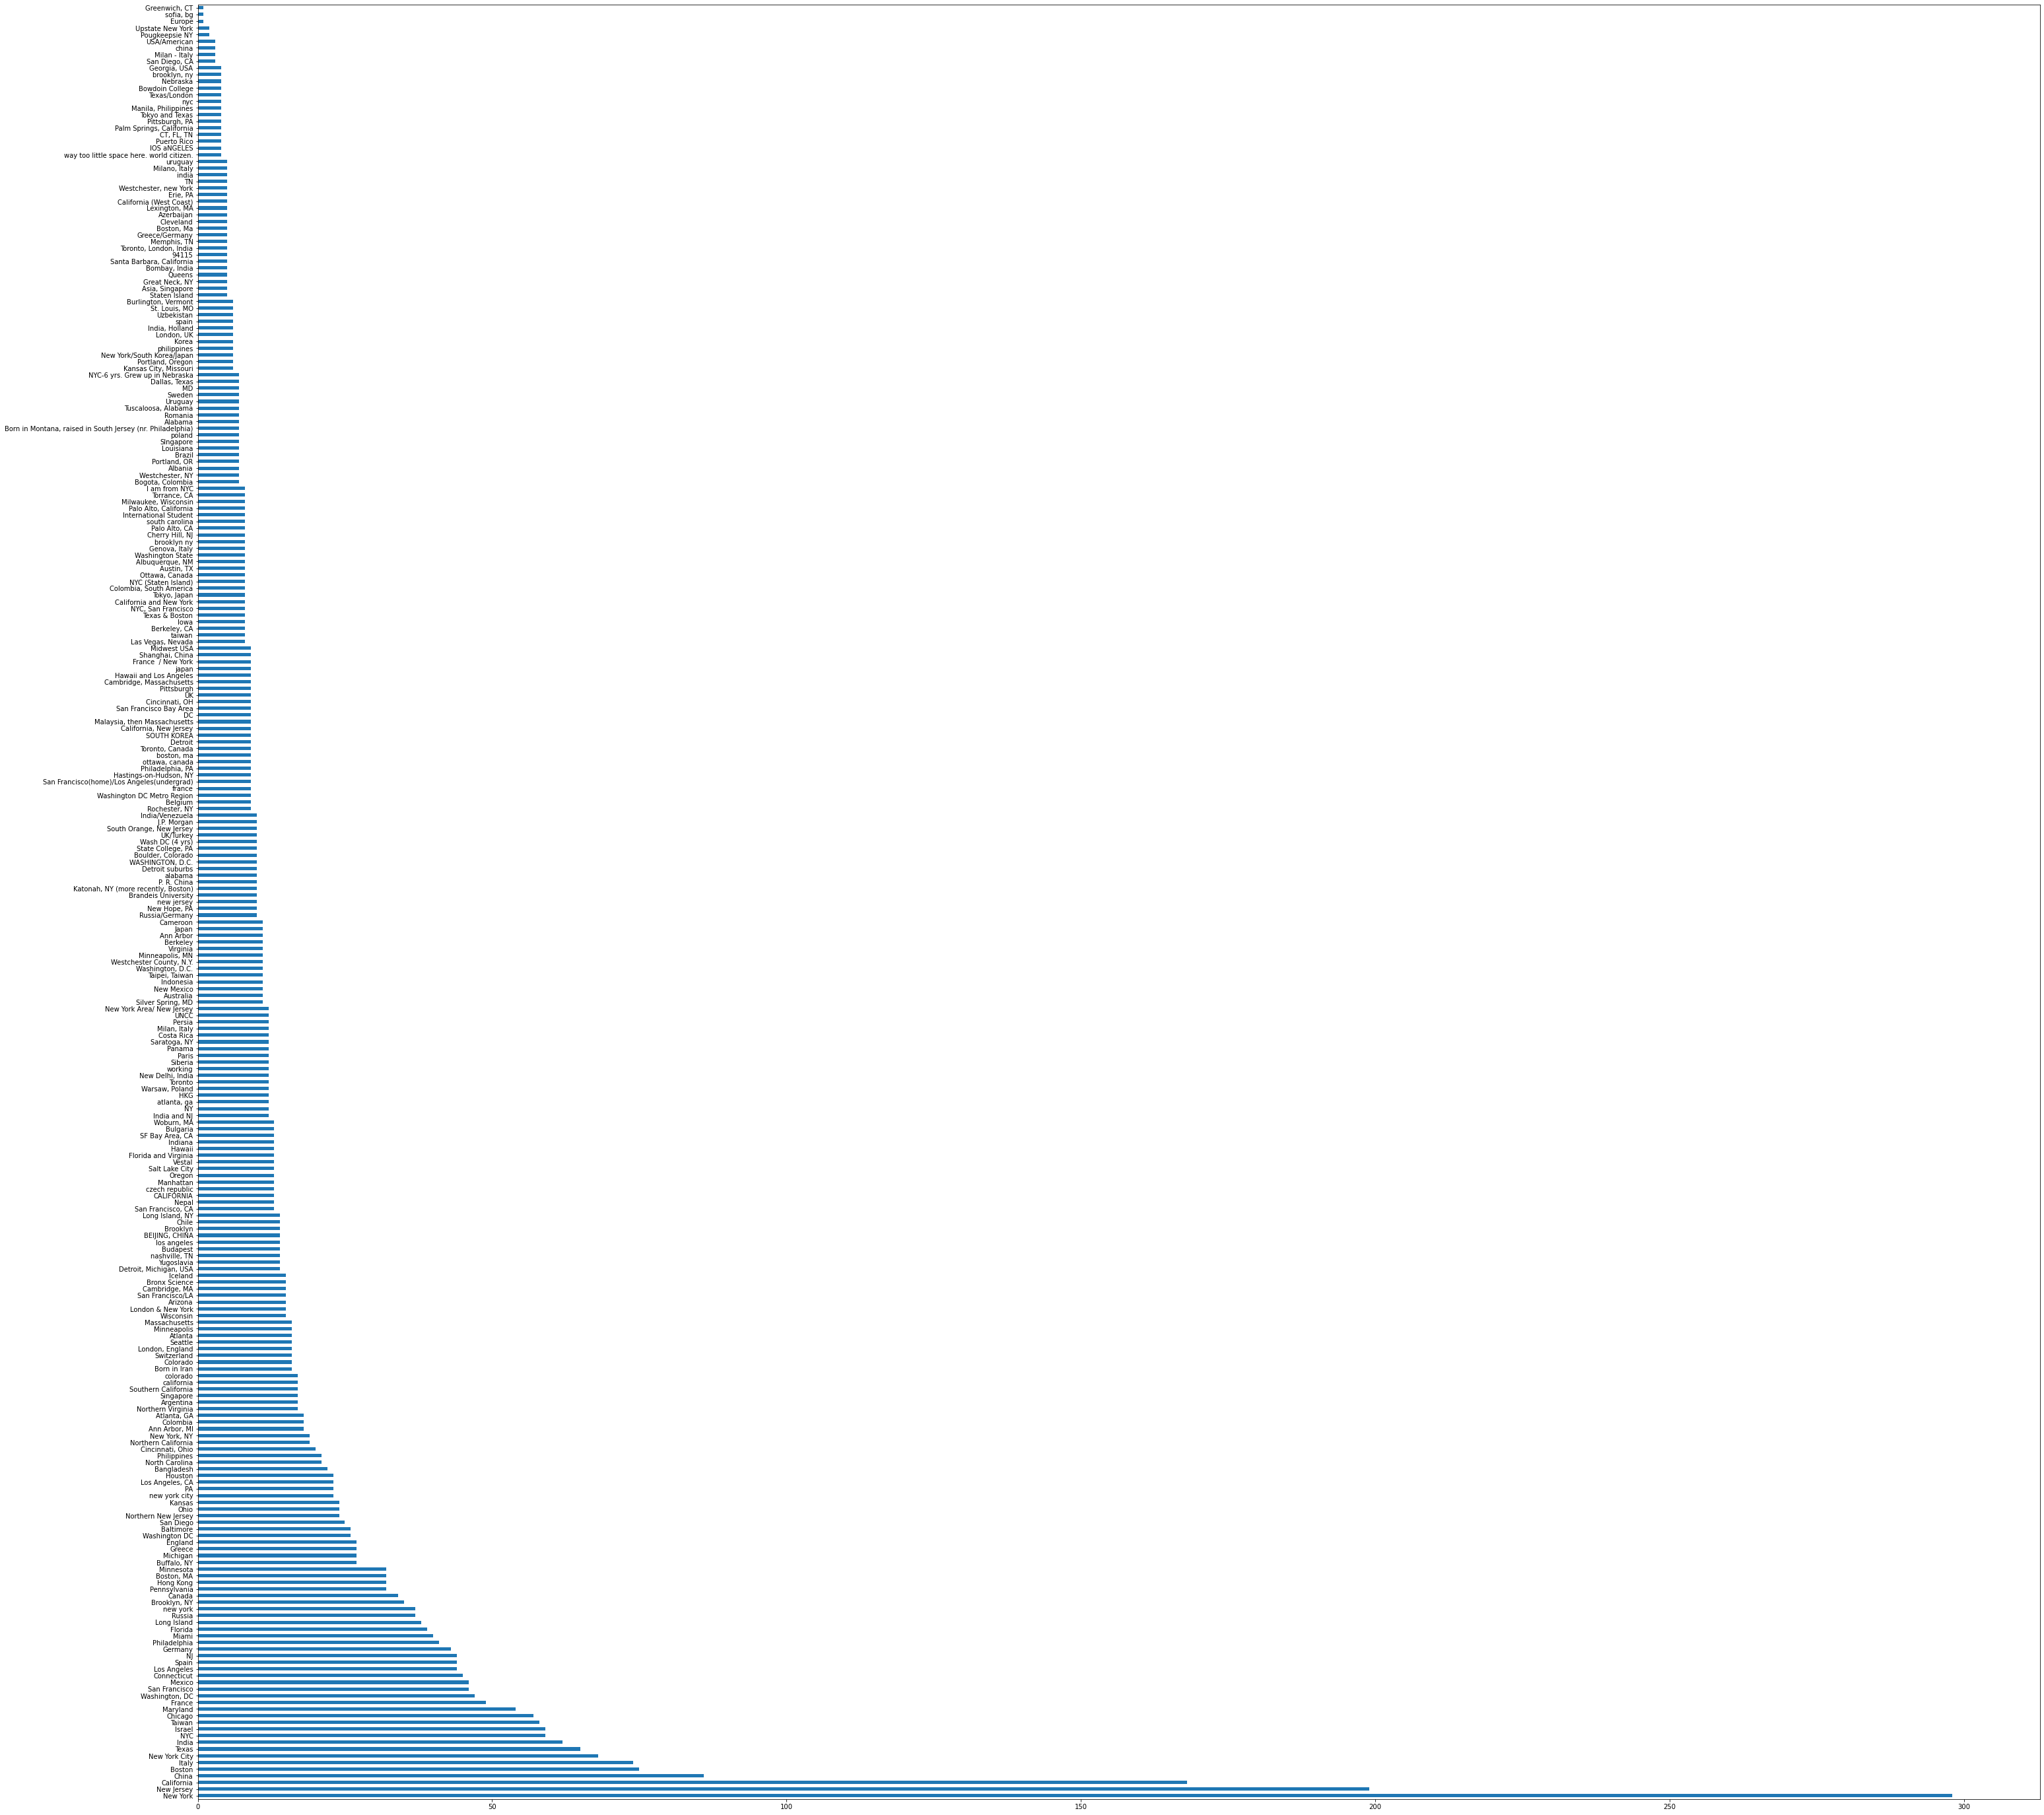

['63,034' '11,552' '52,803' '11,001' '7,410' '94,306' '22,066' '1,851'
 '19,087' '650,206' '8,854' '80,131' '95,695' '10,025' '66,610' '7,936'
 '11,910' '92,683' '10,021' '19,041' '92,879' '26,223' nan '14,043'
 '94,403' '110,015' '471,001' '91,011' '60,089' '11,021' '3,186' '77,401'
 '10,598' '0' '10,027' '77,546' '6,019' '13,413' '48,306' '96,797'
 '36,701' '10,128' '92,821' '12,563' '7,039' '43,229' '21,701' '22,151'
 '55,424' '28,035' '11,234' '27,870' '92,120' '11,373' '125,438' '30,345'
 '7,675' '8,904' '10,454' '411,101' '76,116' '11,137' '10,471' '28,804'
 '28,387' '12,000' '10,502' '8,540' '85,201' '11,354' '47,906' '92,602'
 '10,012' '11,215' '20,903' '100,063' '13,850' '14,526' '11,364' '76,513'
 '66,614' '78,666' '30,071' '16,803' '90,620' '11,104' '15,668' '10,536'
 '94,043' '10,523' '55,391' '90,026' '38,119' '92,037' '94,133' '15,146'
 '27,701' '7,045' '100' '21,044' '20,878' '90,503' '92,028' '11,733'
 '16,510' '10,514' '136' '15,211' '20,011' '10,014' '11,561' '92,833'

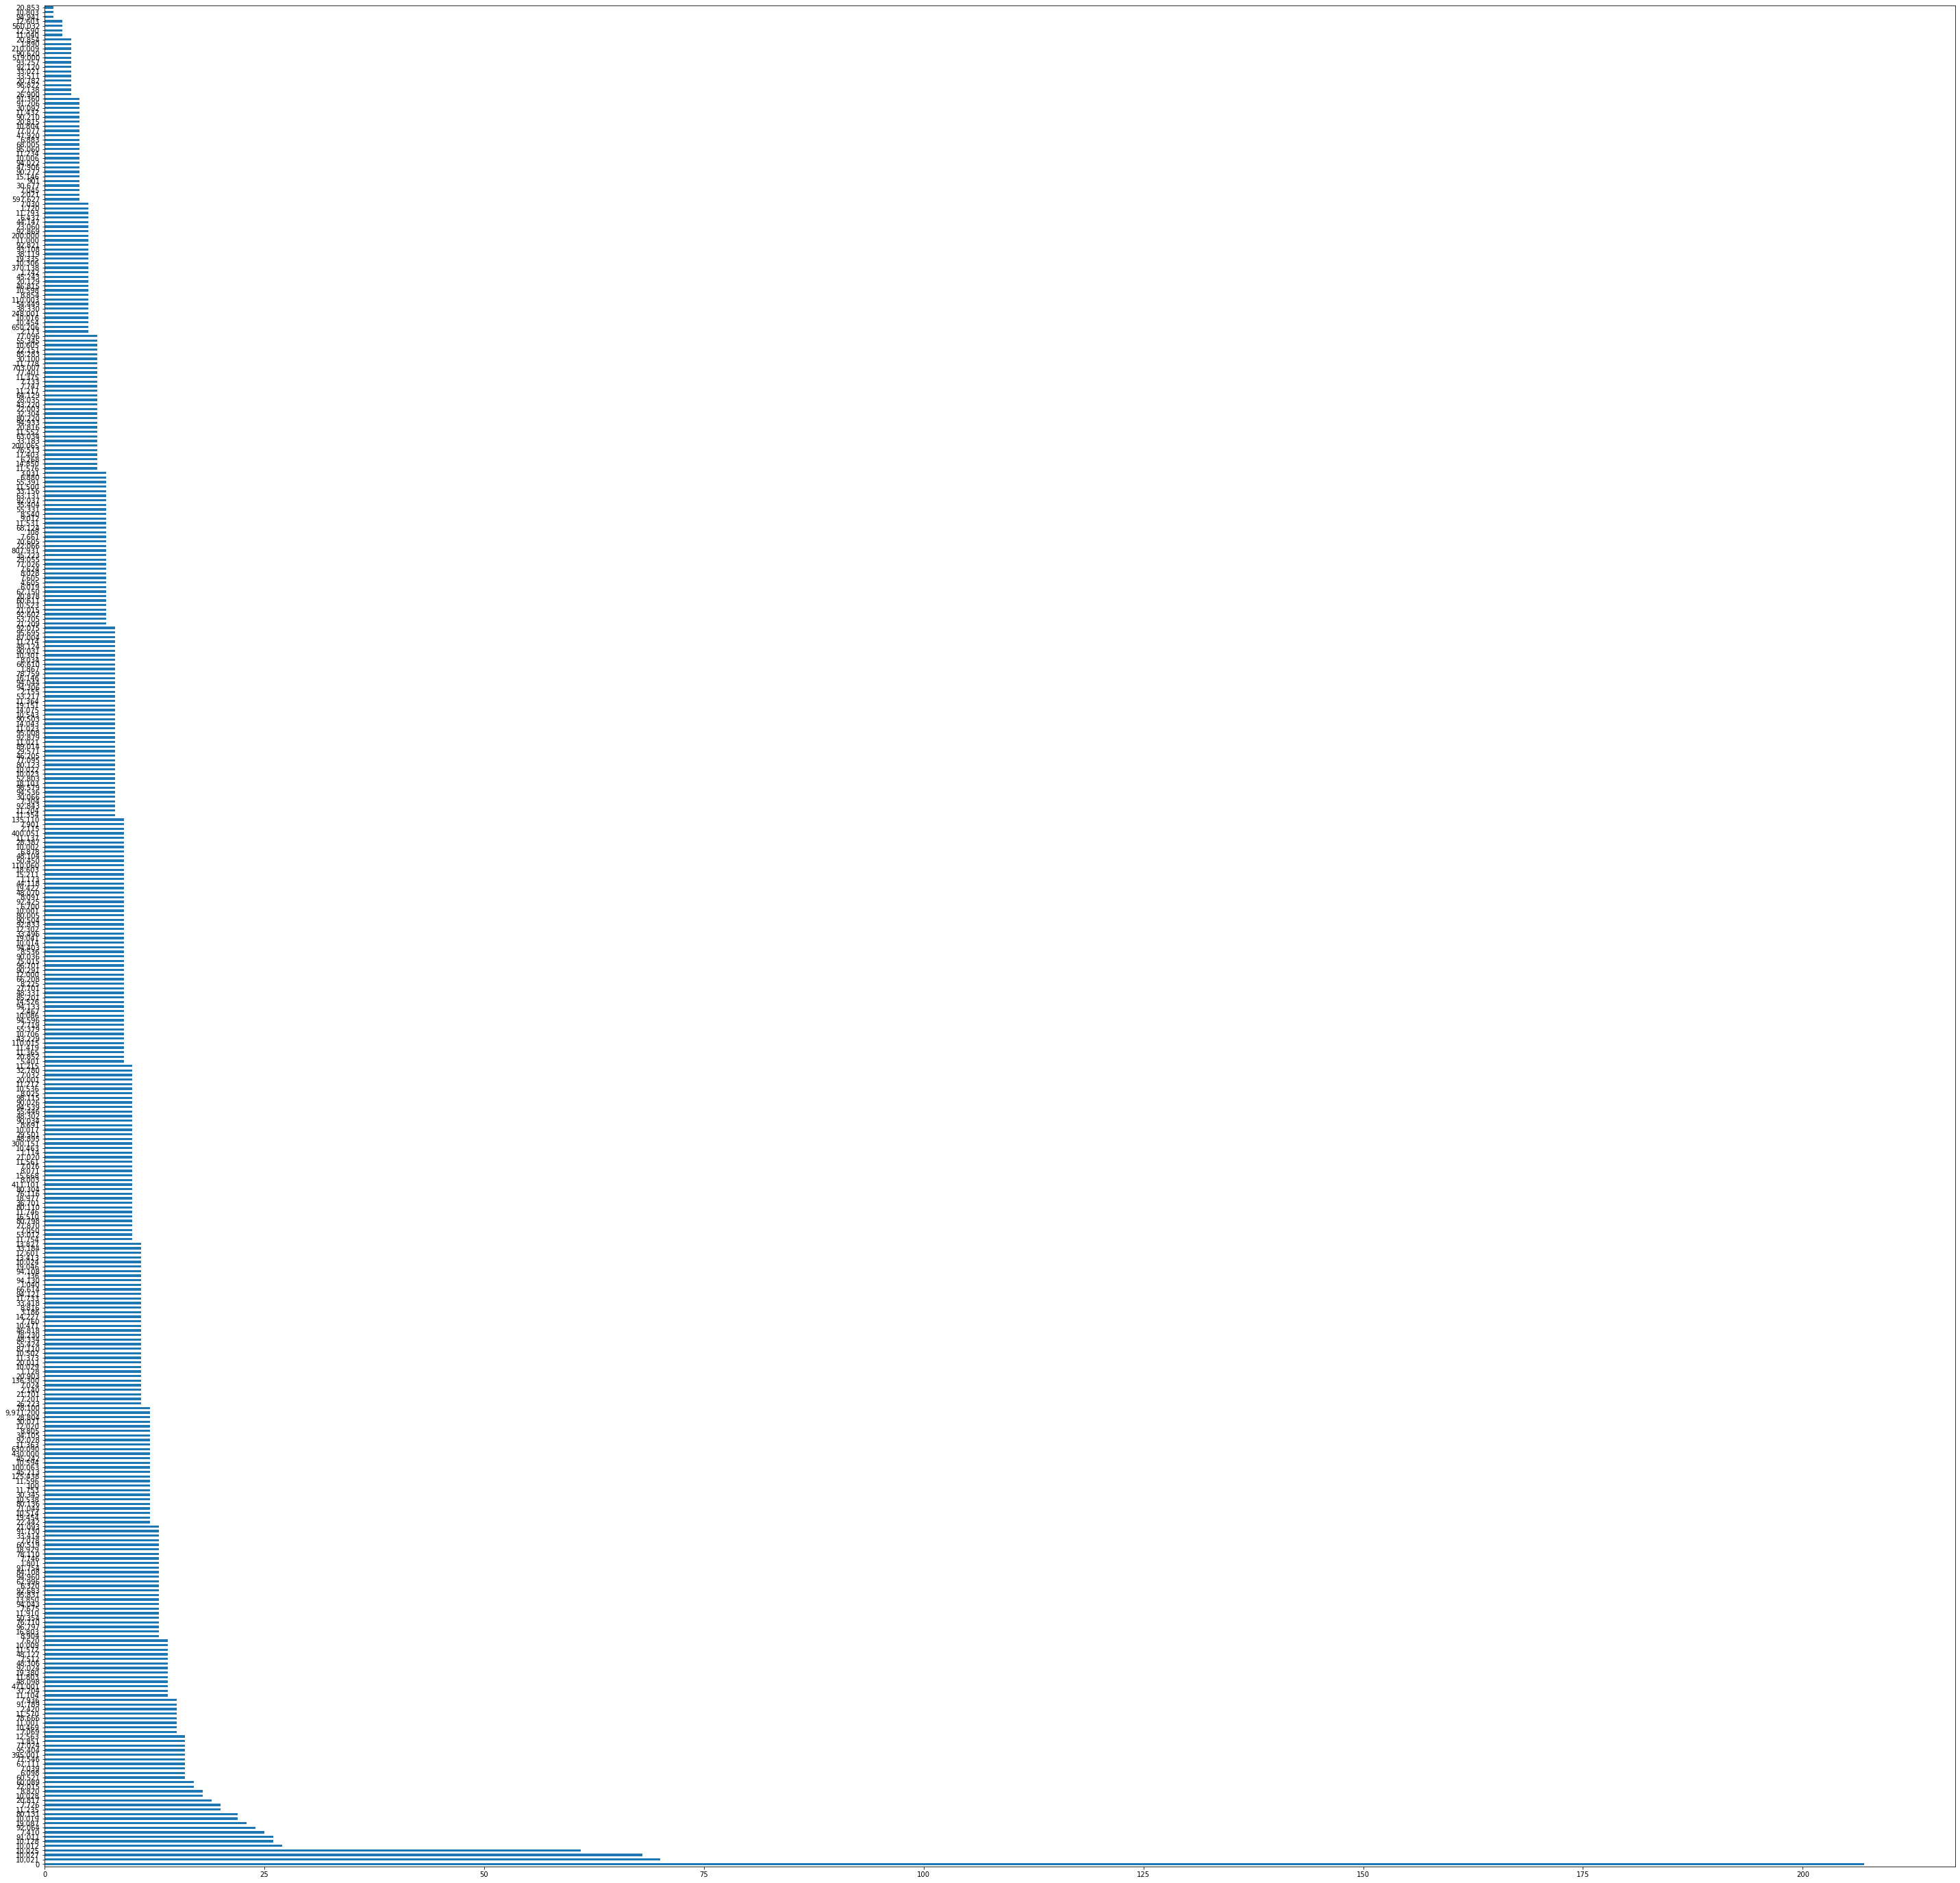

['53,539.00' '52,280.00' '23,152.00' '49,642.00' nan '50,948.00'
 '97,857.00' '58,802.00' '31,809.00' '44,195.00' '41,778.00' '55,080.00'
 '74,624.00' '32,563.00' '45,736.00' '78,704.00' '55,550.00' '57,213.00'
 '45,788.00' '61,141.00' '48,944.00' '36,485.00' '72,412.00' '46,280.00'
 '71,787.00' '22,161.00' '49,409.00' '30,973.00' '36,594.00' '61,152.00'
 '55,223.00' '41,476.00' '21,590.00' '47,997.00' '46,800.00' '8,607.00'
 '28,317.00' '45,300.00' '29,746.00' '28,240.00' '78,844.00' '25,589.00'
 '30,146.00' '23,707.00' '32,649.00' '35,968.00' '40,244.00' '42,640.00'
 '49,466.00' '45,695.00' '23,361.00' '35,963.00' '36,223.00' '33,906.00'
 '45,017.00' '27,503.00' '53,771.00' '77,112.00' '42,096.00' '48,441.00'
 '56,096.00' '24,997.00' '43,636.00' '49,841.00' '28,891.00' '36,381.00'
 '16,908.00' '53,196.00' '60,304.00' '47,559.00' '35,627.00' '65,693.00'
 '29,279.00' '109,031.00' '22,805.00' '31,432.00' '41,831.00' '43,185.00'
 '50,501.00' '21,488.00' '50,745.00' '80,608.00' '26,298.00

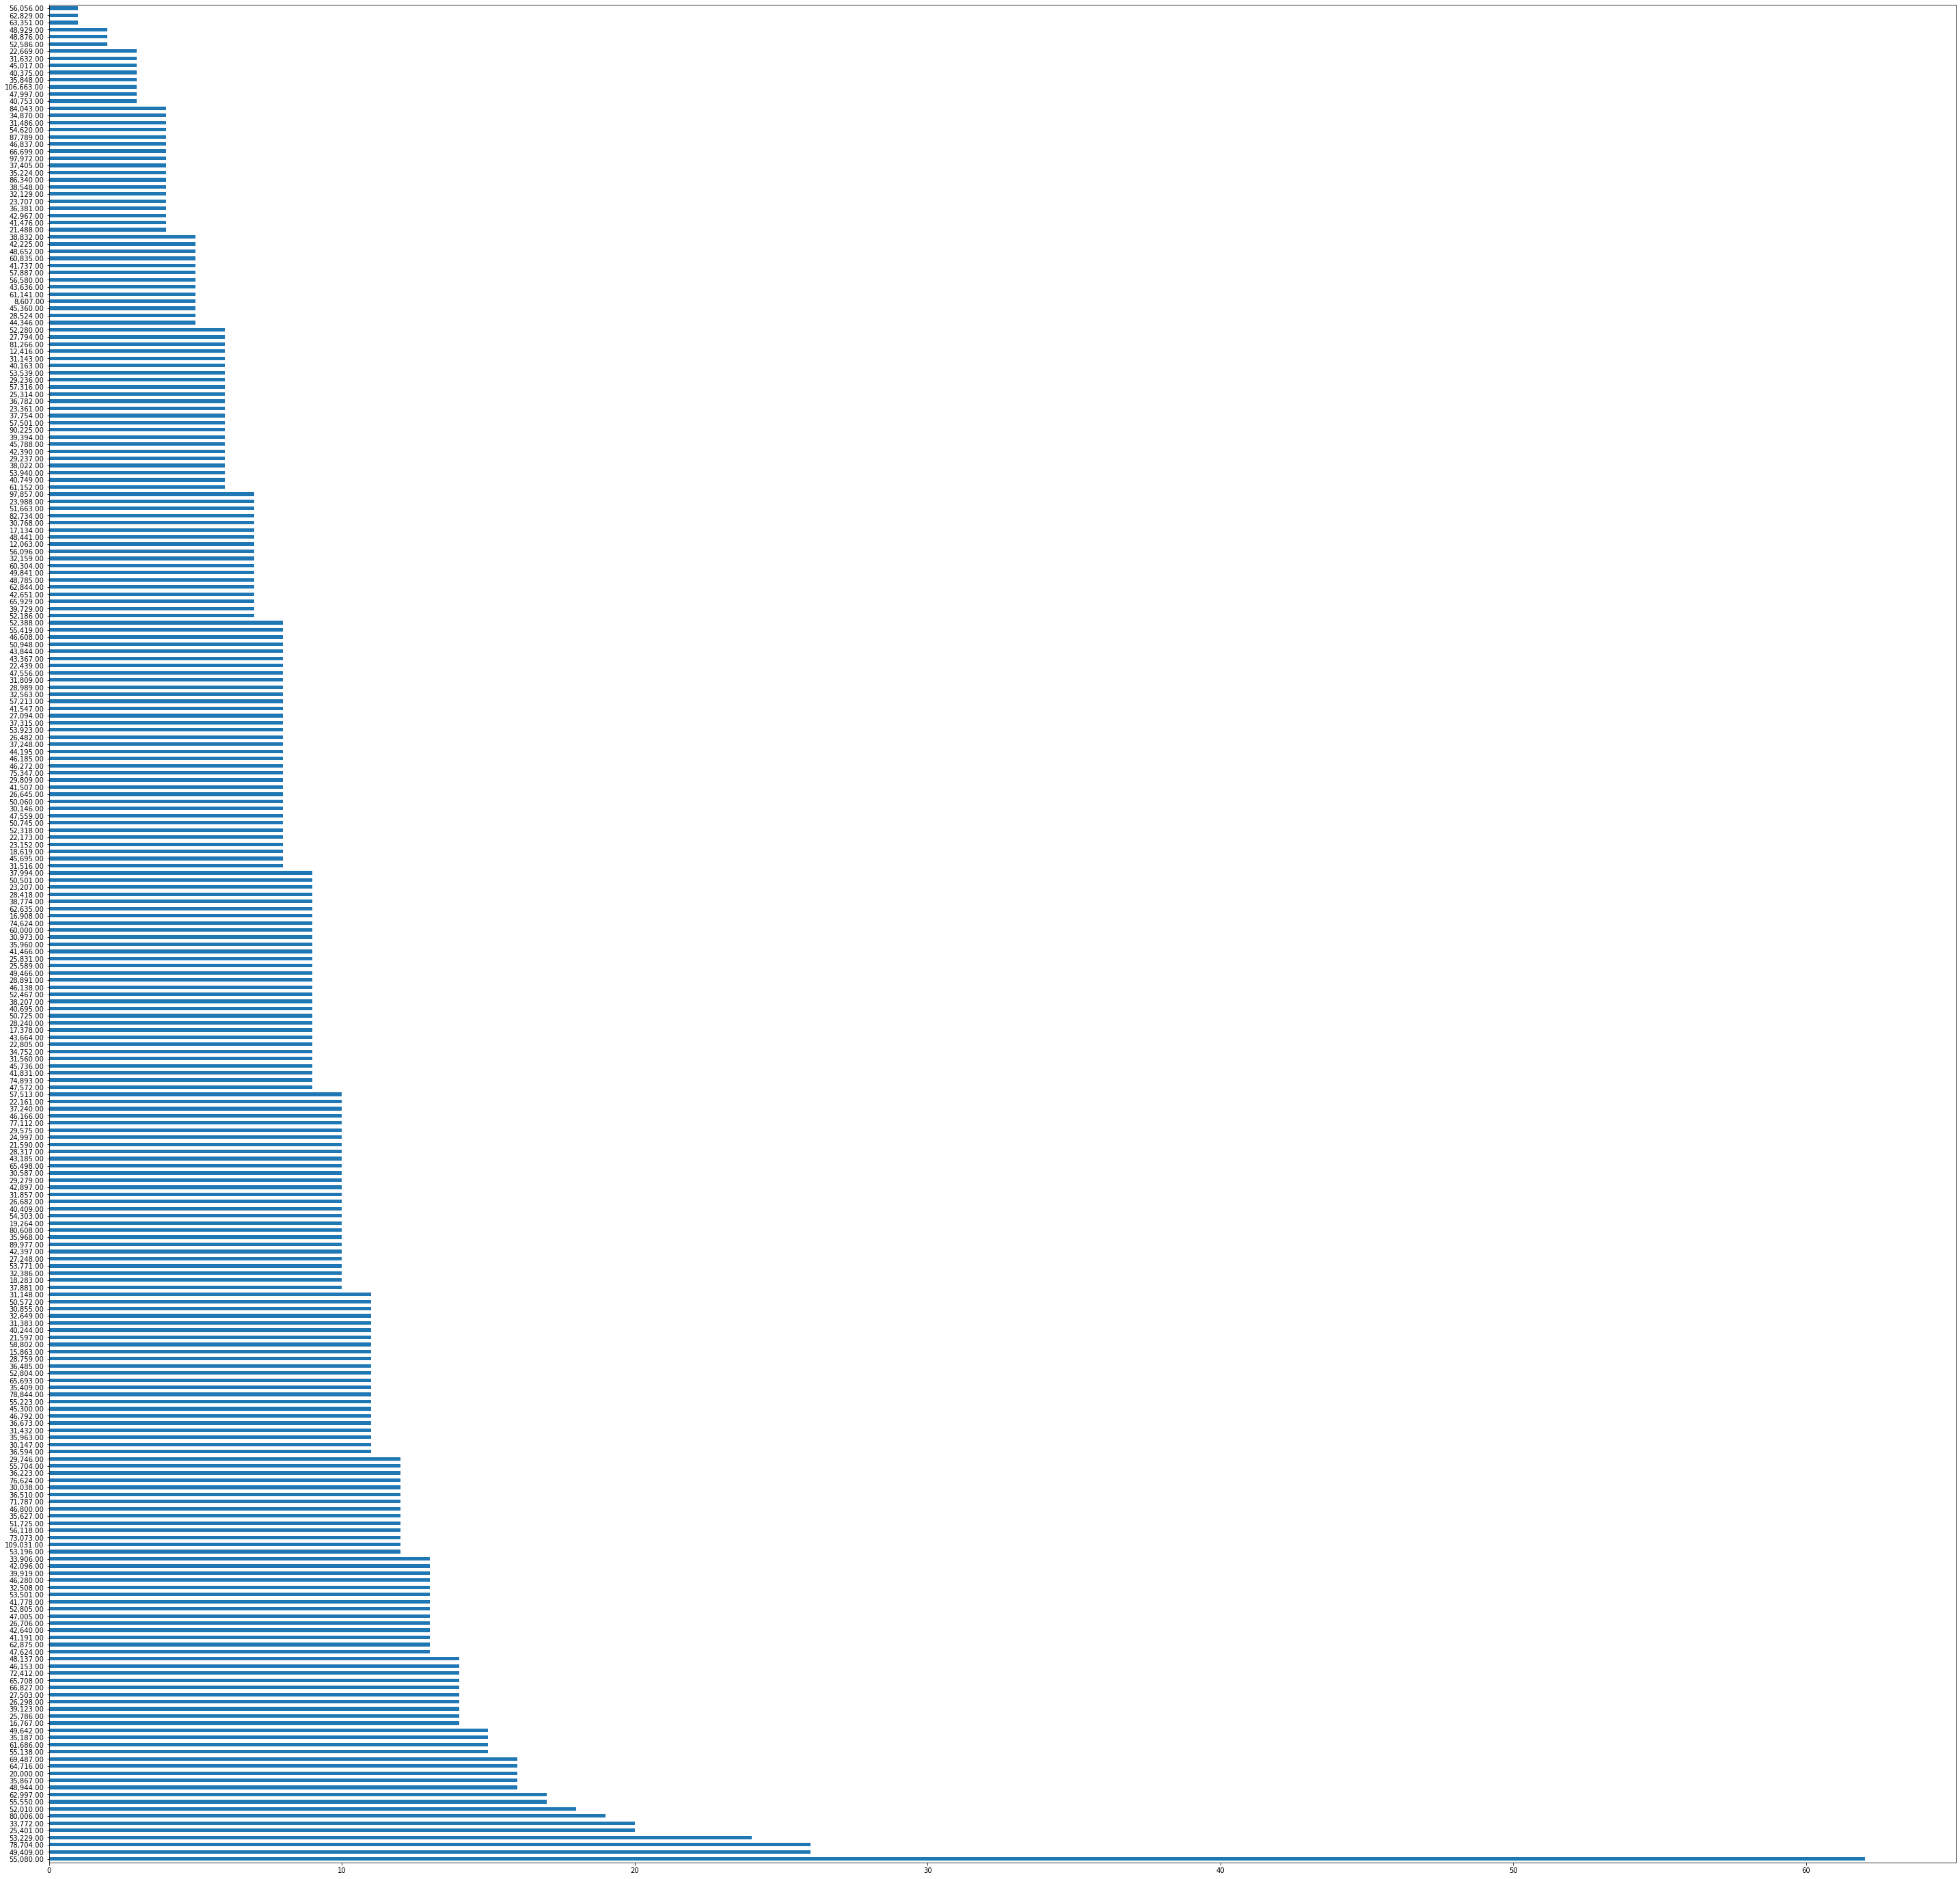

['novelist' 'Business/Law' 'Social Worker' 'teacher and performer'
 'writer/producer' 'Undecided' 'finance' 'Industry CTO/CEO' 'Education'
 'banking' 'Paper Back Writer' 'Finance'
 'Media Marketing/Entrepreneurship' 'investment banking' 'Professor'
 'doctor and entrepreneur' 'EDUCATION ADMINISTRATION' 'medicine'
 'Nonprofit' 'Urban Planner' 'Academic/ Finance' 'Business' nan
 'Researcher' 'writer/editor' "Diplomat / Int'l civil servant" 'Engineer'
 'pharmaceuticals and biotechnology' 'International Development banker'
 'dont know yet' 'business' 'Marketing, Advertising' 'enterpreneur'
 'Art Management' 'Professor or Consultant'
 'Literacy Organization head/ Director of Development for non-profit'
 'Entertainment/Media' 'software engr, network engr' 'Marketing'
 'Management Consulting' 'Scientist' 'law' 'physician/healthcare'
 'Foreign Service' 'Assistant District Attorney' 'scientist'
 'Writer/teacher' 'Lawyer' 'self-made millionare' 'investment management'
 'health policy' 'Counseling

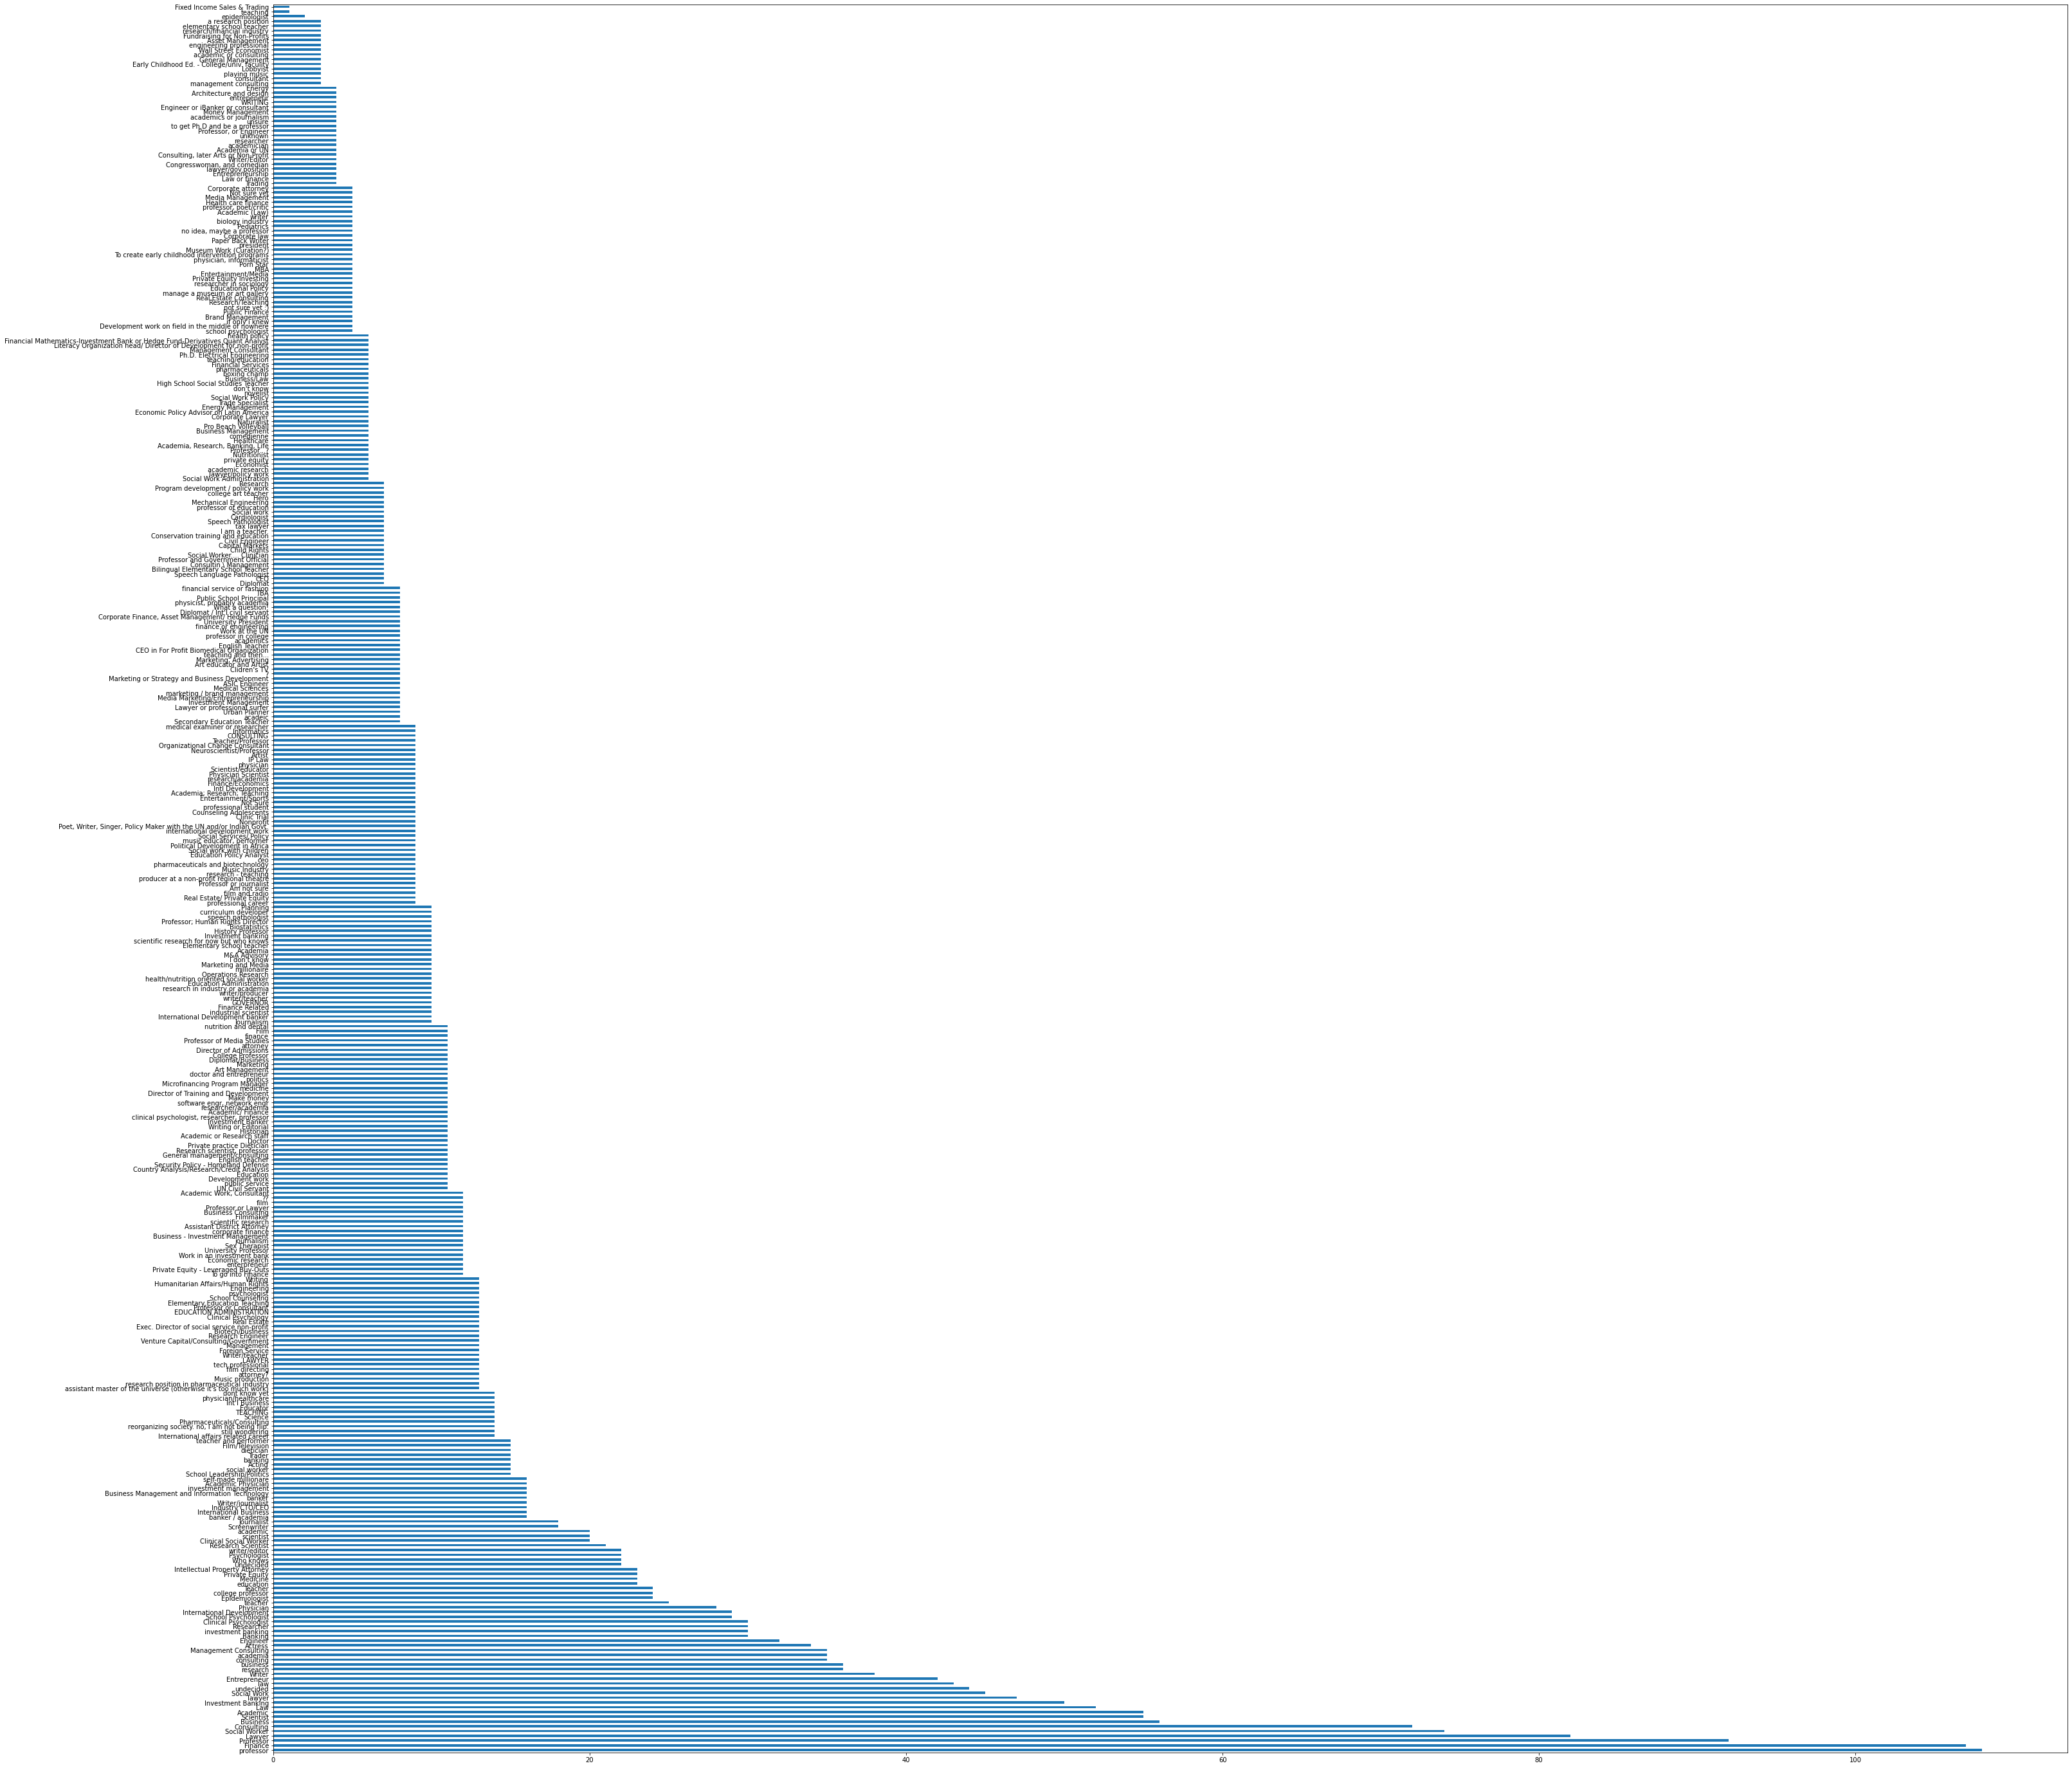

field       None
undergra    None
mn_sat      None
tuition     None
from        None
zipcode     None
income      None
career      None
dtype: object

In [ ]:

plt.rcParams['figure.figsize'] = [50, 50]

#------------------------------------ plot and print the unique values ^_^ ------------------------------------------------
'''
This Function help us to print the unique values in each column and plot the count of these unique values
'''


def values_unique(df):
    print(df.unique())
    df.value_counts().plot(kind='barh')
    plt.show()
    
#------------------------------------ apply the above function on the catigorical columns  ^_^ ------------------------------------------------
train_data.select_dtypes(include=['O']).apply(values_unique)

**Observations**💡💡💡💡💡

- AS we noticed before mn_sat,	tuition, zipcode, and	income are numeric not string. all values in these columns are numbers. So,we will convert the type of these columns into float to deal with these columns as number not string.

- The rest are string but need some preprocessing to remove stop words, regex characters and non valid values.

- There is some of words aren't english. There is different languages in these columns. So,we are inspired to translate these columns from these different language into english 

#### Apply some preprocessing in columns that contain string(sentence)


---



---


In [ ]:
columns_str_float = ['tuition', 'mn_sat' , 'income' , 'zipcode'] # list of columns that contain number but its type is object
columns_obj_cat = ['field','undergra','from', 'career']  # list of columns that contain string but its type is object

# Call the preprocessing class to discover train data and apply preprocessing methods on train data
preprocessing_steps = preprocessing(train_data)
# Call the preprocessing class to discover train data and apply preprocessing methods on submission  data
preprocessing_steps_sub = preprocessing(submission_data)
# Call the preprocessing class to  apply preprocessing methods on test data
preprocessing_steps_test = preprocessing(test_data)



def clean_text(i):
    train_data = preprocessing_steps.translation(i)
    train_data[i]=train_data[i].apply(preprocessing_steps.preprocess) 
    submission_data = preprocessing_steps_sub.translation(i)
    submission_data[i] =  submission_data[i].apply(preprocessing_steps_sub.preprocess) 

    test_data = preprocessing_steps_test.translation(i)
    test_data[i] =  test_data[i].apply(preprocessing_steps_test.preprocess) 
    return train_data , submission_data , test_data


train_data , submission_data , test_data = clean_text('undergra')
train_data , submission_data , test_data = clean_text('field')
train_data , submission_data , test_data = clean_text('career')


In [ ]:
train_data['from']=train_data['from'].apply(preprocessing_steps.preprocess) 
submission_data['from'] =  submission_data['from'].apply(preprocessing_steps_sub.preprocess) 
test_data['from'] =  test_data['from'].apply(preprocessing_steps_test.preprocess) 

In [ ]:
train_data.head(20)

gender  idg  condtn  wave  round  position  positin1  order  partner  \
2584       1    6       1     3     10         8       NaN      1        4   
2734       1   20       2    17     11         4       8.0      8        5   
4565       0    9       2     2     16        12       NaN      7        9   
5018       0   11       2    21     22        16      16.0     15        3   
5495       1   20       2    19     15        11       6.0      6       16   
3065       0   15       1     3     10         2       NaN      3       10   
4377       0   25       2     7     16        15      15.0     12        7   
2207       1   22       2    11     21         5       5.0      7        7   
1555       0    9       2     7     16         4       4.0      5       16   
5614       1   22       2    17     11         7      13.0      6        6   
2363       1    4       1     8     10         9       7.0      3        6   
4438       1   12       2    21     22        11       3.0      9       16   
5443       0    1       2    15     19         7       7.0      6       16   
1364       0    9       2     9     20        14      14.0     10        1   
4186       1    6       1     8     10         9       4.0      6        6   
1042       1   38       2    11     21         9       9.0     21       17   
5418       0    1       2    11     21        18      18.0      3        8   
3115       0   15       2    14     18        16      16.0      7       18   
3986       1   10       1     5     10         9       NaN      6        2   
448        0   27       2     7     16         5       5.0     14        2   

        pid  int_corr  samerace  age_o  race_o  pf_o_att  pf_o_sin  pf_o_int  \
2584   59.0       NaN         0    NaN     NaN       NaN       NaN       NaN   
2734  434.0     -0.12         0   27.0     2.0     30.00     15.00     15.00   
4565   48.0      0.38         1   22.0     2.0     30.00     15.00     25.00   
5018  533.0      0.24         1   26.0     2.0     25.00     25.00     25.00   
5495  480.0      0.19         1   26.0     2.0     16.00     18.00     18.00   
3065   75.0      0.16         0   24.0     6.0     20.00     20.00     20.00   
4377  164.0      0.66         1   27.0     2.0     20.51     23.08     20.51   
2207  258.0      0.58         0   25.0     6.0      7.00     35.00     20.00   
1555  173.0     -0.21         1   22.0     2.0     18.37     18.37     20.41   
5614  435.0      0.21         0   22.0     1.0     25.00      5.00     20.00   
2363  179.0      0.41         0   30.0     3.0     19.15     21.28     17.02   
4438  524.0      0.51         0   25.0     4.0     15.00     20.00     25.00   
5443  412.0     -0.03         1   27.0     2.0     75.00      5.00      5.00   
1364  214.0      0.07         0   23.0     2.0     17.02     21.28     17.02   
4186  179.0      0.36         0   30.0     3.0     19.15     21.28     17.02   
1042  268.0      0.40         0   24.0     3.0     30.00     20.00     20.00   
5418  280.0      0.45         0   25.0     2.0     25.00     20.00     30.00   
3115  378.0     -0.04         0   29.0     2.0     25.00     15.00     20.00   
3986  113.0      0.44         1   21.0     2.0     15.00     15.00     25.00   
448   159.0      0.59         1   28.0     2.0     15.91     20.45     20.45   

      pf_o_fun  pf_o_amb  pf_o_sha  attr_o  sinc_o  intel_o  fun_o  amb_o  \
2584       NaN       NaN       NaN     3.0     4.0      9.0    2.0    9.0   
2734     30.00      0.00     10.00     8.0     8.0      8.0    8.0    8.0   
4565     25.00      5.00      0.00     9.0     8.0      7.0    8.0    NaN   
5018     13.00     12.00      0.00     5.0     7.0      7.0    6.0    9.0   
5495     20.00     12.00     16.00     3.0     8.0      6.0    6.0    6.0   
3065     20.00     10.00     10.00     5.0     6.0      6.0    7.0    6.0   
4377     17.95      2.56     15.38     8.0     7.0      7.0    NaN    NaN   
2207     20.00      5.00     13.00     9.0    10.0      8.0    6.0    

#### Convert object columns 
---------------
------------------------

In [ ]:
train_data[columns_obj_cat] = train_data[columns_obj_cat].apply(lambda x: x.where(x!="", np.nan), axis=1)
train_data[columns_str_float] = train_data[columns_str_float].apply(lambda x: x.str.replace(',', '').astype(float), axis=1)
train_data[columns_obj_cat] = train_data[columns_obj_cat].astype("category")
submission_data[columns_str_float] =  submission_data[columns_str_float].apply(lambda x: x.str.replace(',', '').astype(float), axis=1)
submission_data[columns_obj_cat] =  submission_data[columns_obj_cat].astype("category")
test_data[columns_str_float] =  test_data[columns_str_float].apply(lambda x: x.str.replace(',', '').astype(float), axis=1)
test_data[columns_obj_cat] =  test_data[columns_obj_cat].astype("category") 


print("Number of categorical columns in the data is : ", train_data.describe(include=['category']).shape[1])
train_data.describe(include=['category'])

Number of categorical columns in the data is :  4


field  undergra     from     career
count       4687      2756     4609       4671
unique       210       201      215        303
top     business  columbia  newyork  professor
freq         382       119      354        261

['mfacreativewriting', 'law', 'socialwork', 'sociology', 'film', ..., 'instructionaltechmedium', 'biologyphd', 'theory', 'mfapoetry', 'sipamia']
Length: 211
Categories (210, object): ['mfacreativewriting', 'law', 'socialwork', 'sociology', ..., 'biologyphd', 'theory', 'mfapoetry', 'sipamia']


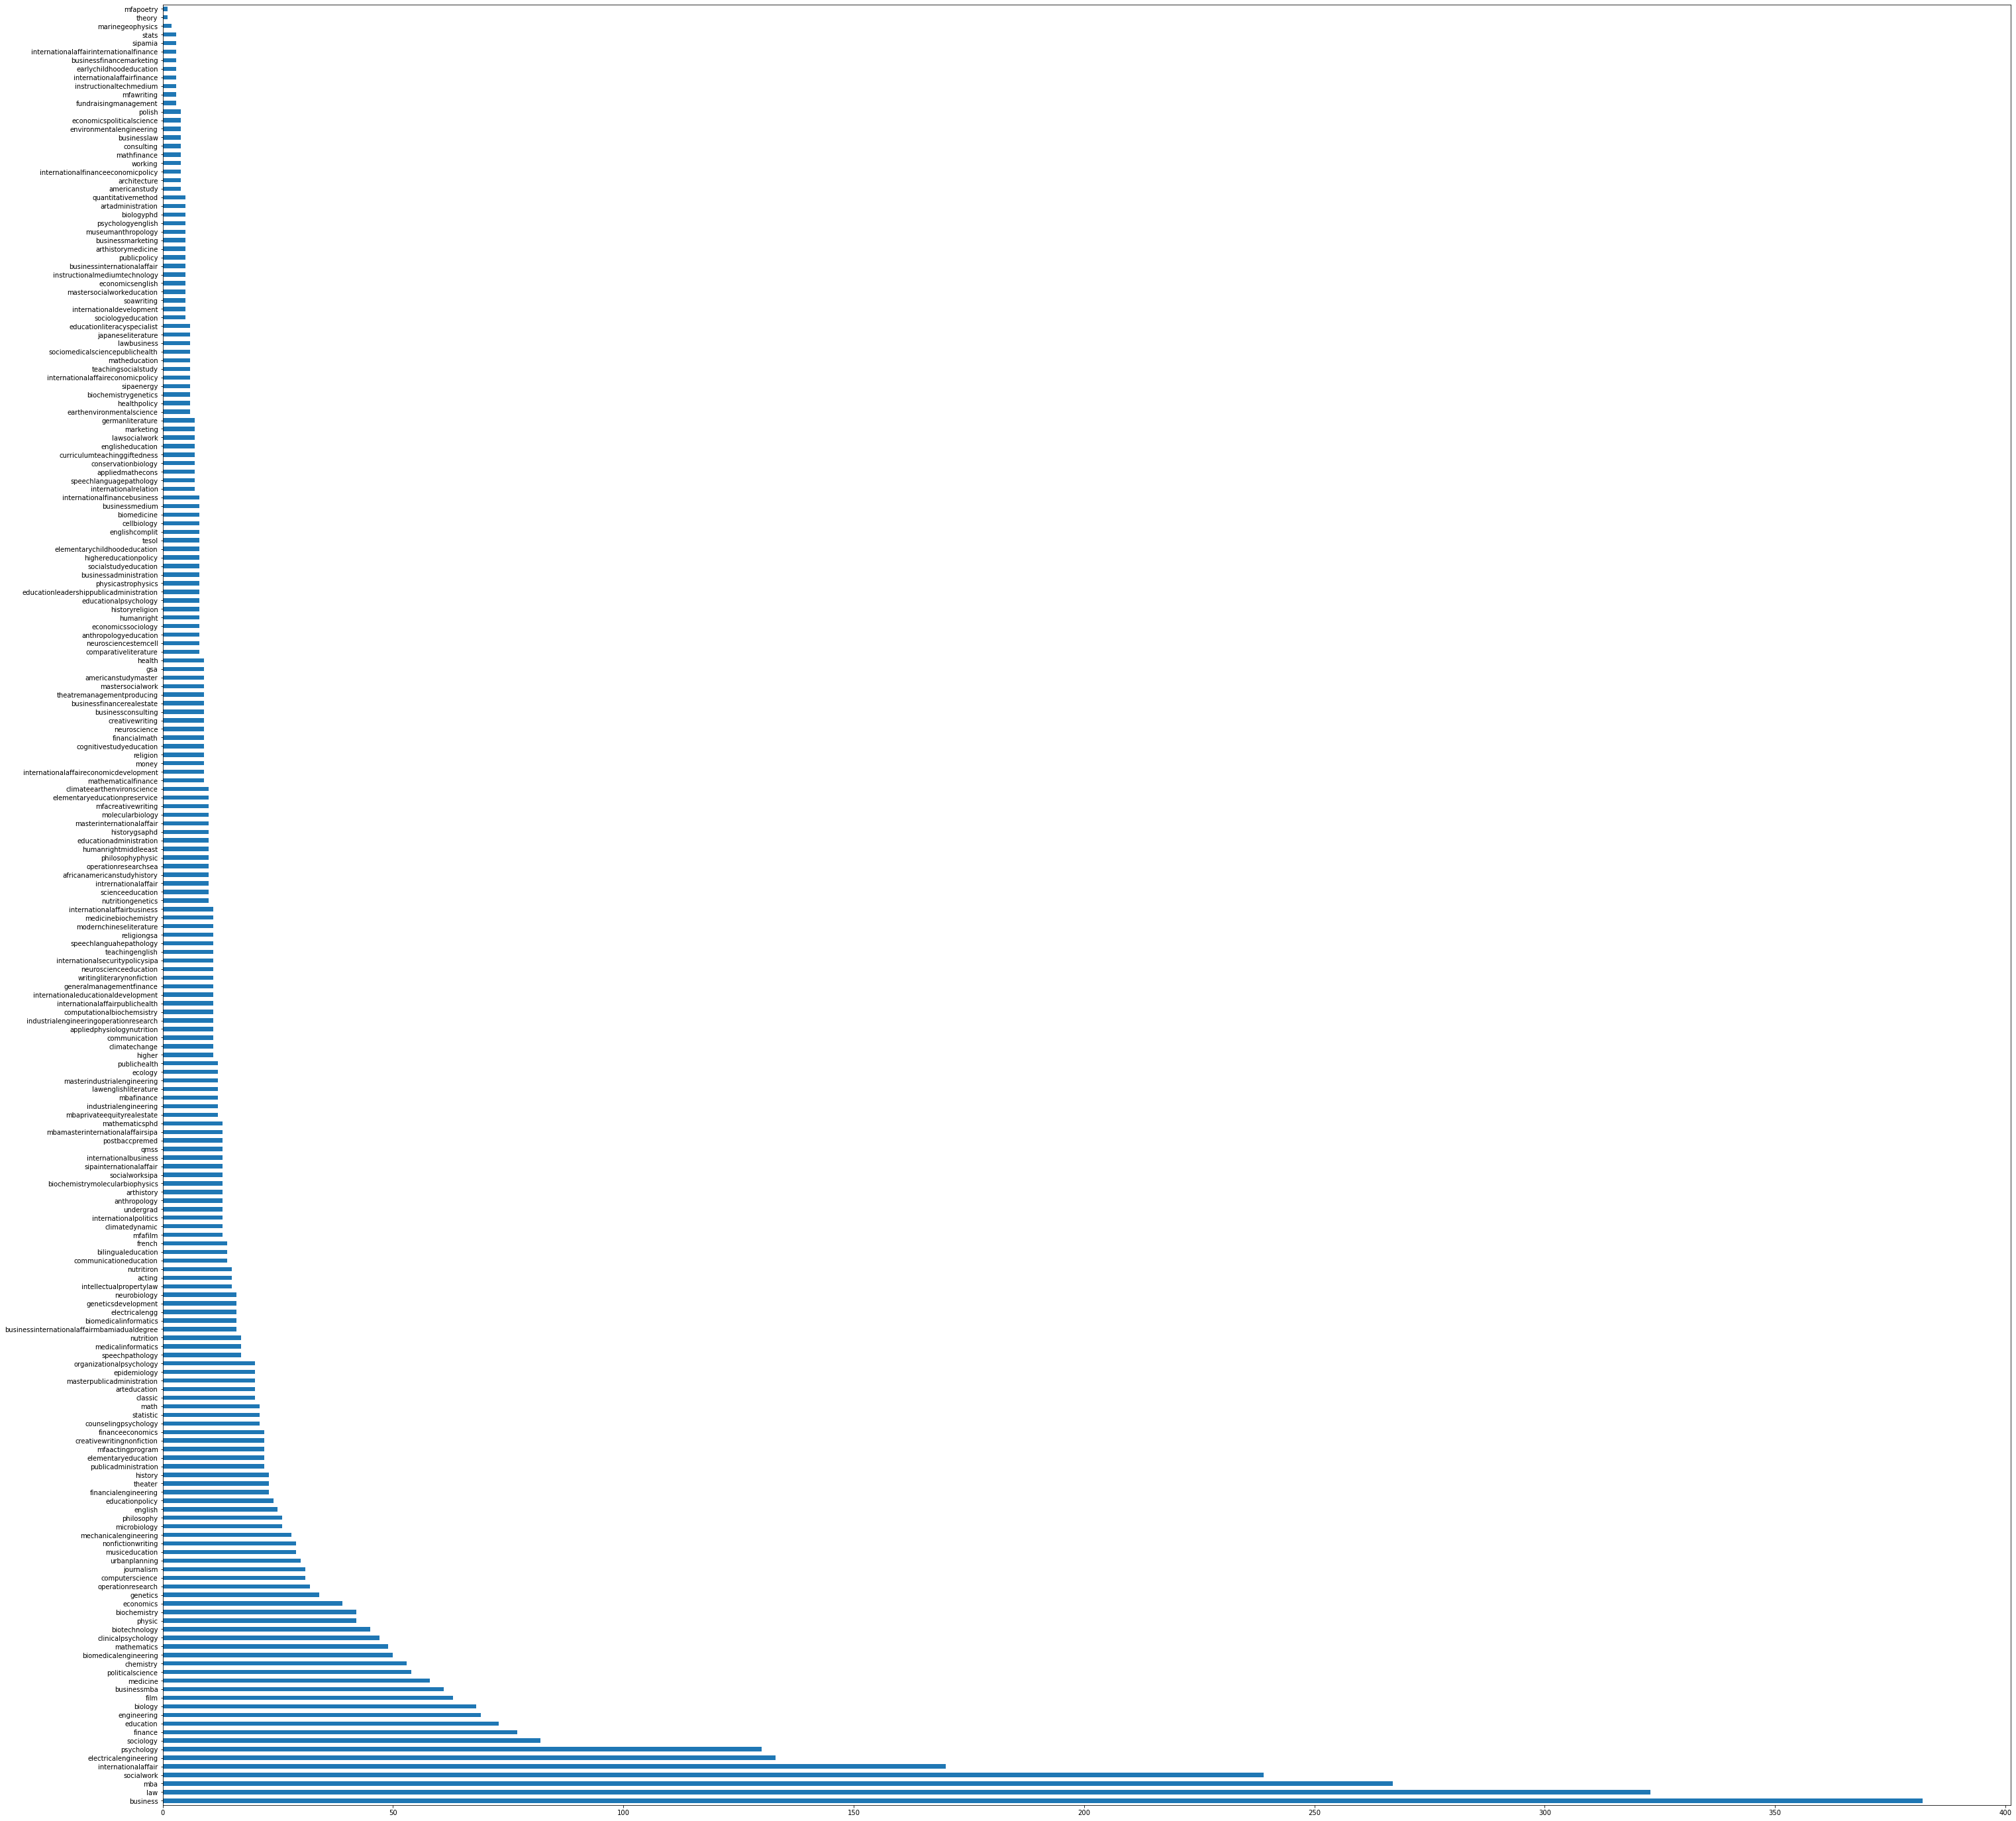

[NaN, 'princeton', 'nyu', 'recrourkela', 'nu', ..., 'johnhopkins', 'karlsruhegermany', 'heidelberg', 'rochester', 'arizona']
Length: 202
Categories (201, object): ['princeton', 'nyu', 'recrourkela', 'nu', ..., 'karlsruhegermany', 'heidelberg', 'rochester', 'arizona']


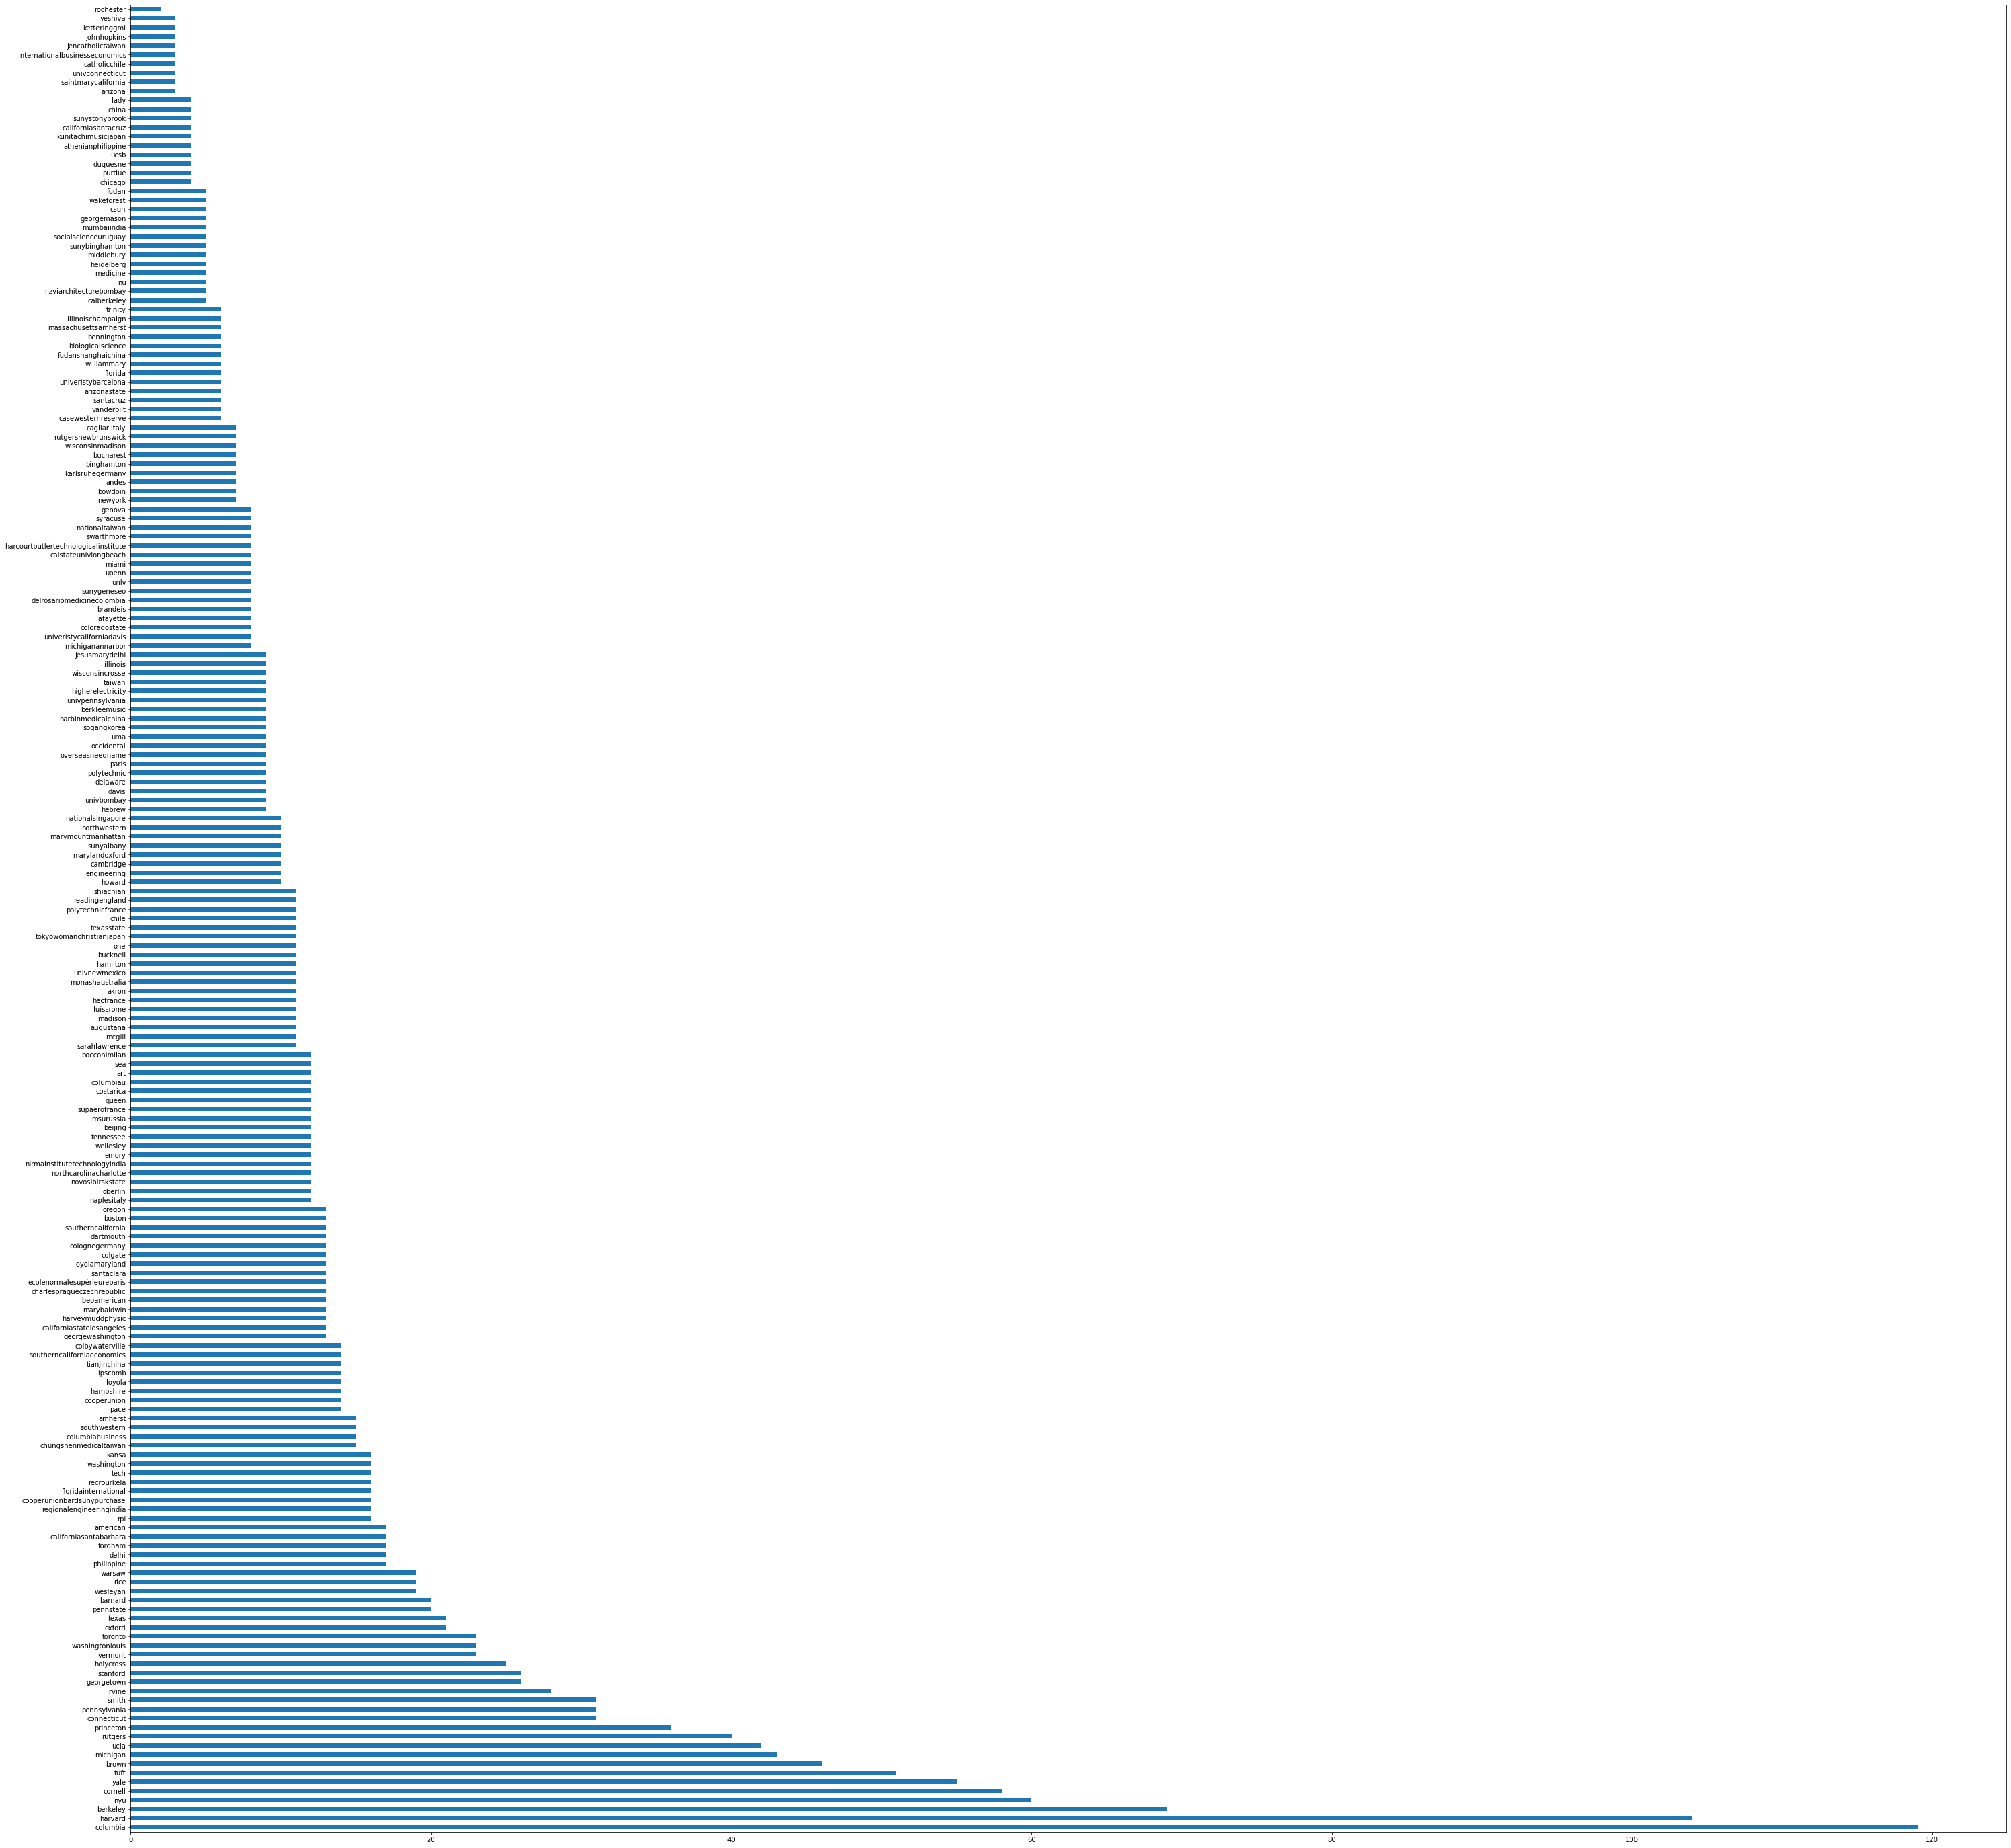

['louis', 'newyork', 'iowa', 'northernnewjersey', 'paloaltocalifornia', ..., 'erie', 'europe', 'lexington', 'sofia', 'usaamerican']
Length: 216
Categories (215, object): ['louis', 'newyork', 'iowa', 'northernnewjersey', ..., 'europe', 'lexington', 'sofia', 'usaamerican']


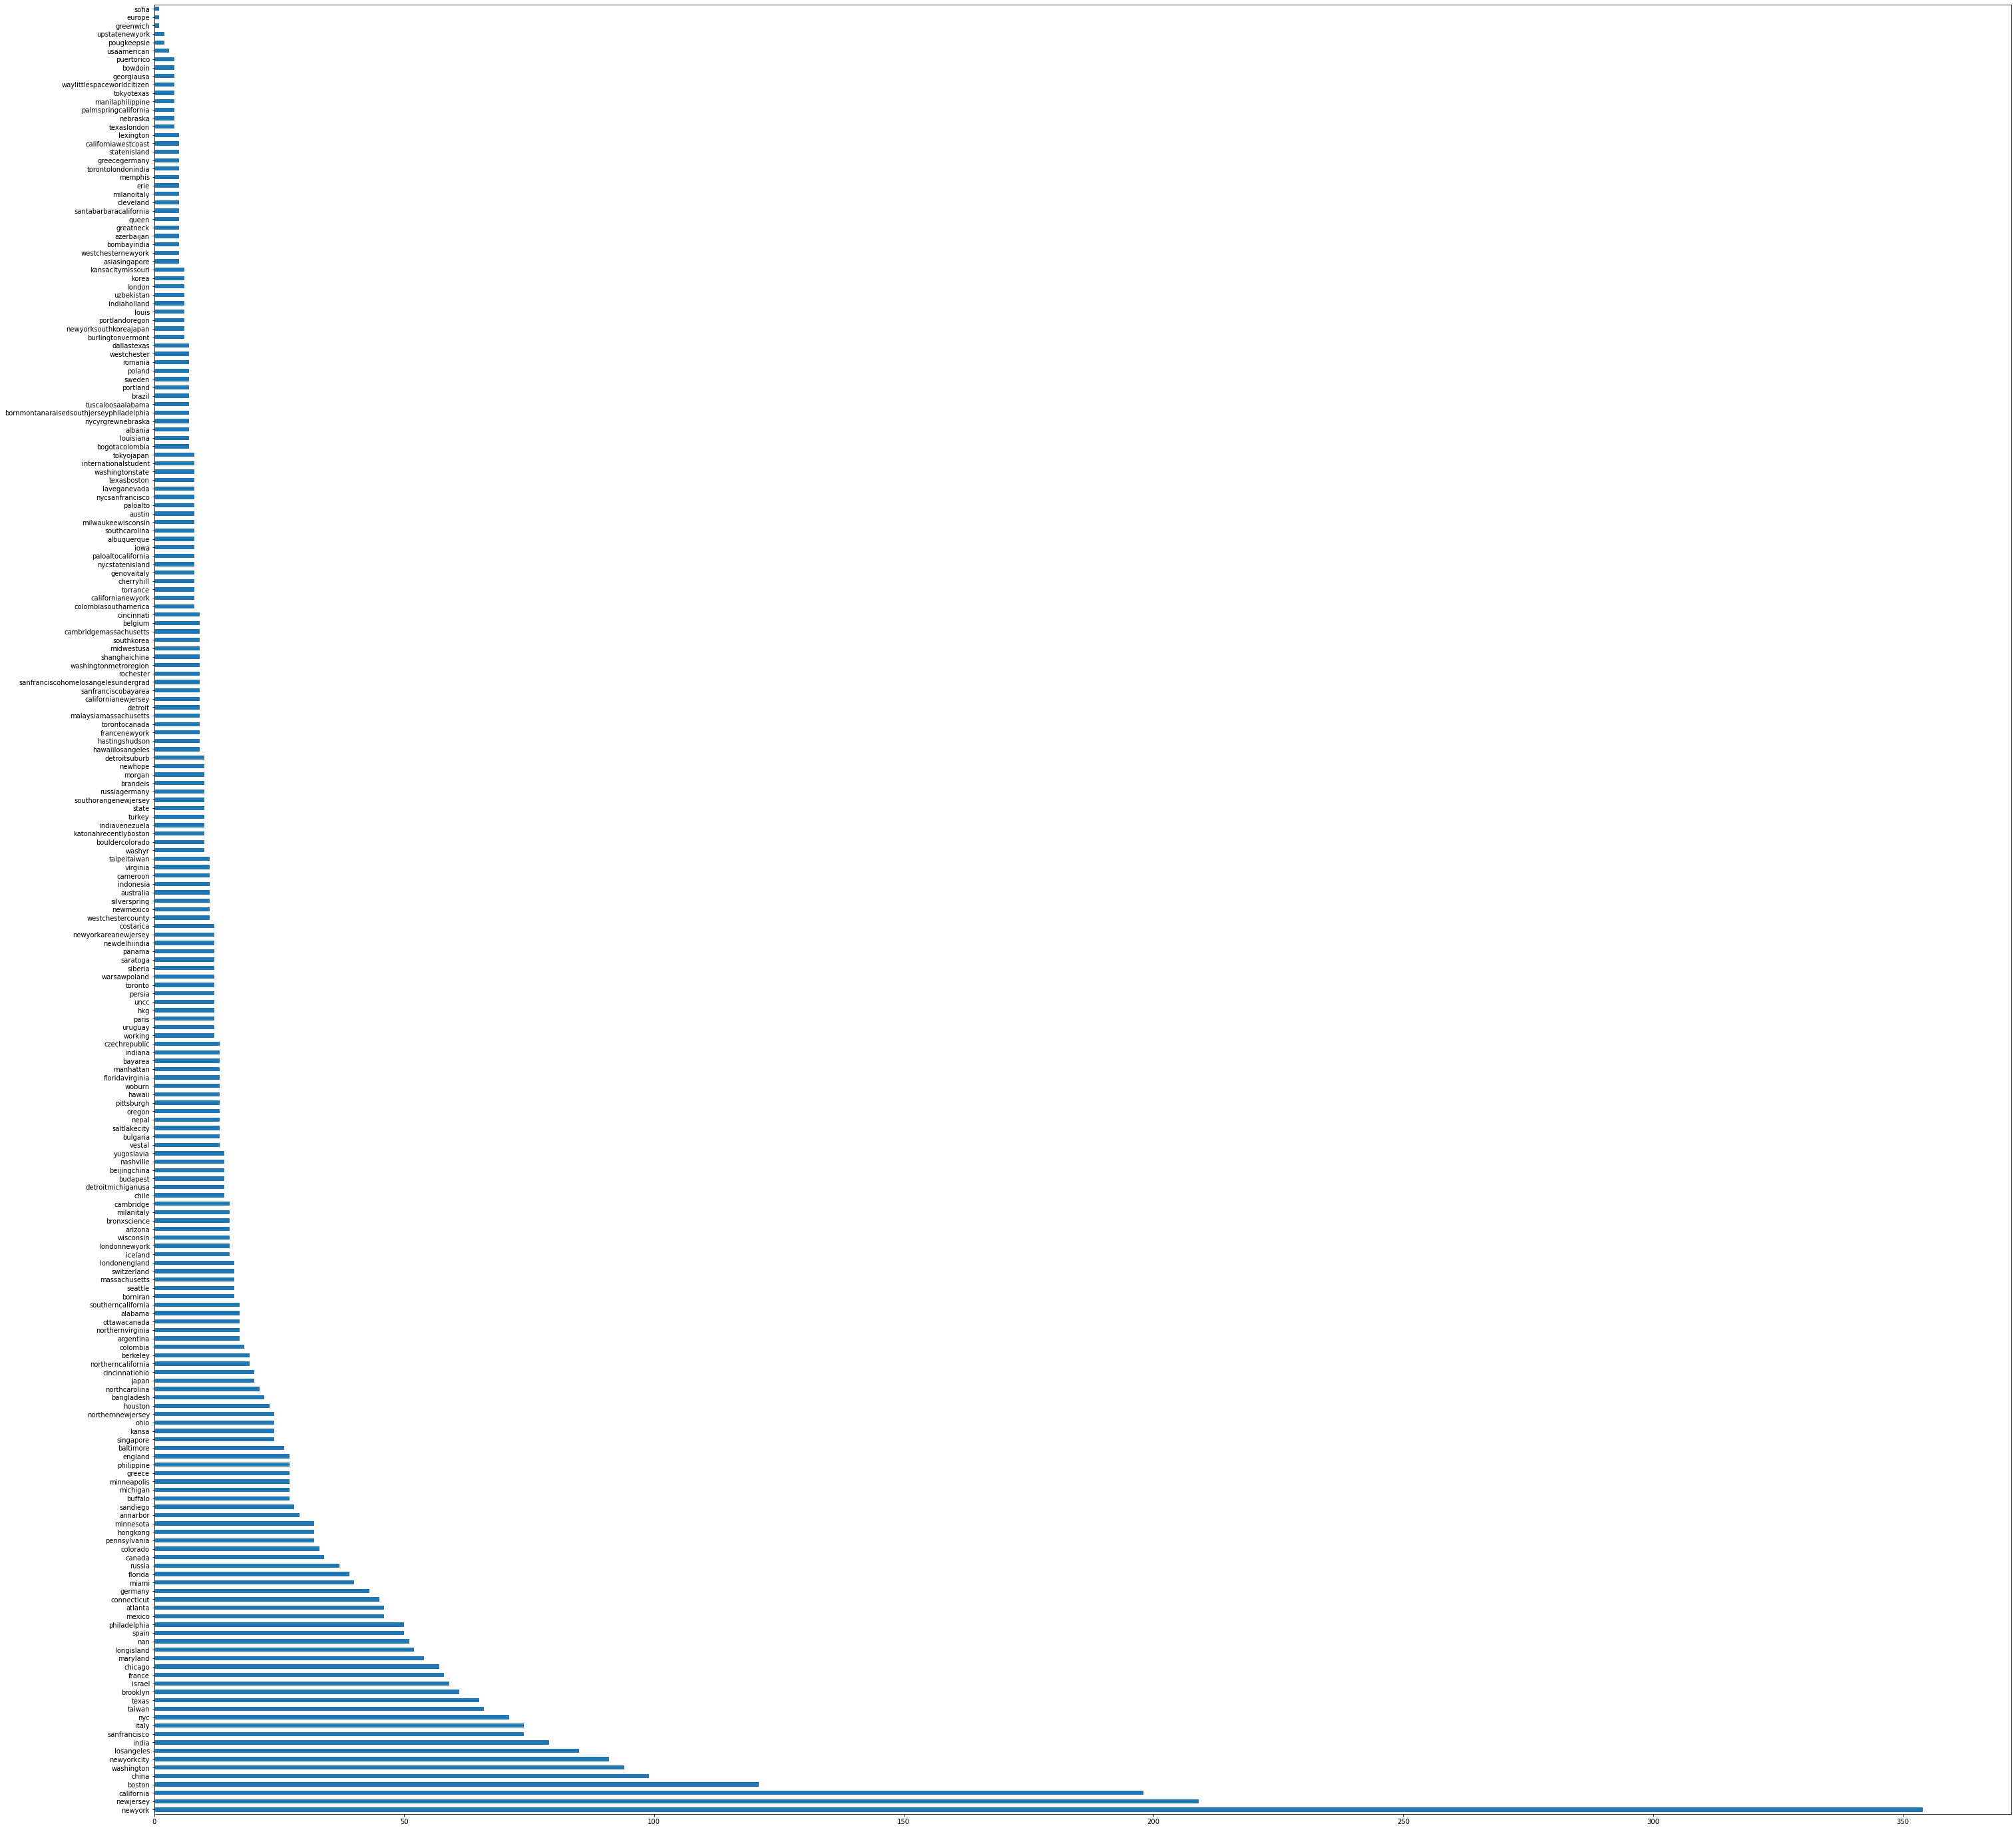

['novelist', 'businesslaw', 'socialworker', 'teacherperformer', 'writerproducer', ..., 'socialworkchild', 'healthcarefinance', 'academiclaw', 'consultant', 'corporatelaw']
Length: 304
Categories (303, object): ['novelist', 'businesslaw', 'socialworker', 'teacherperformer', ..., 'healthcarefinance', 'academiclaw', 'consultant', 'corporatelaw']


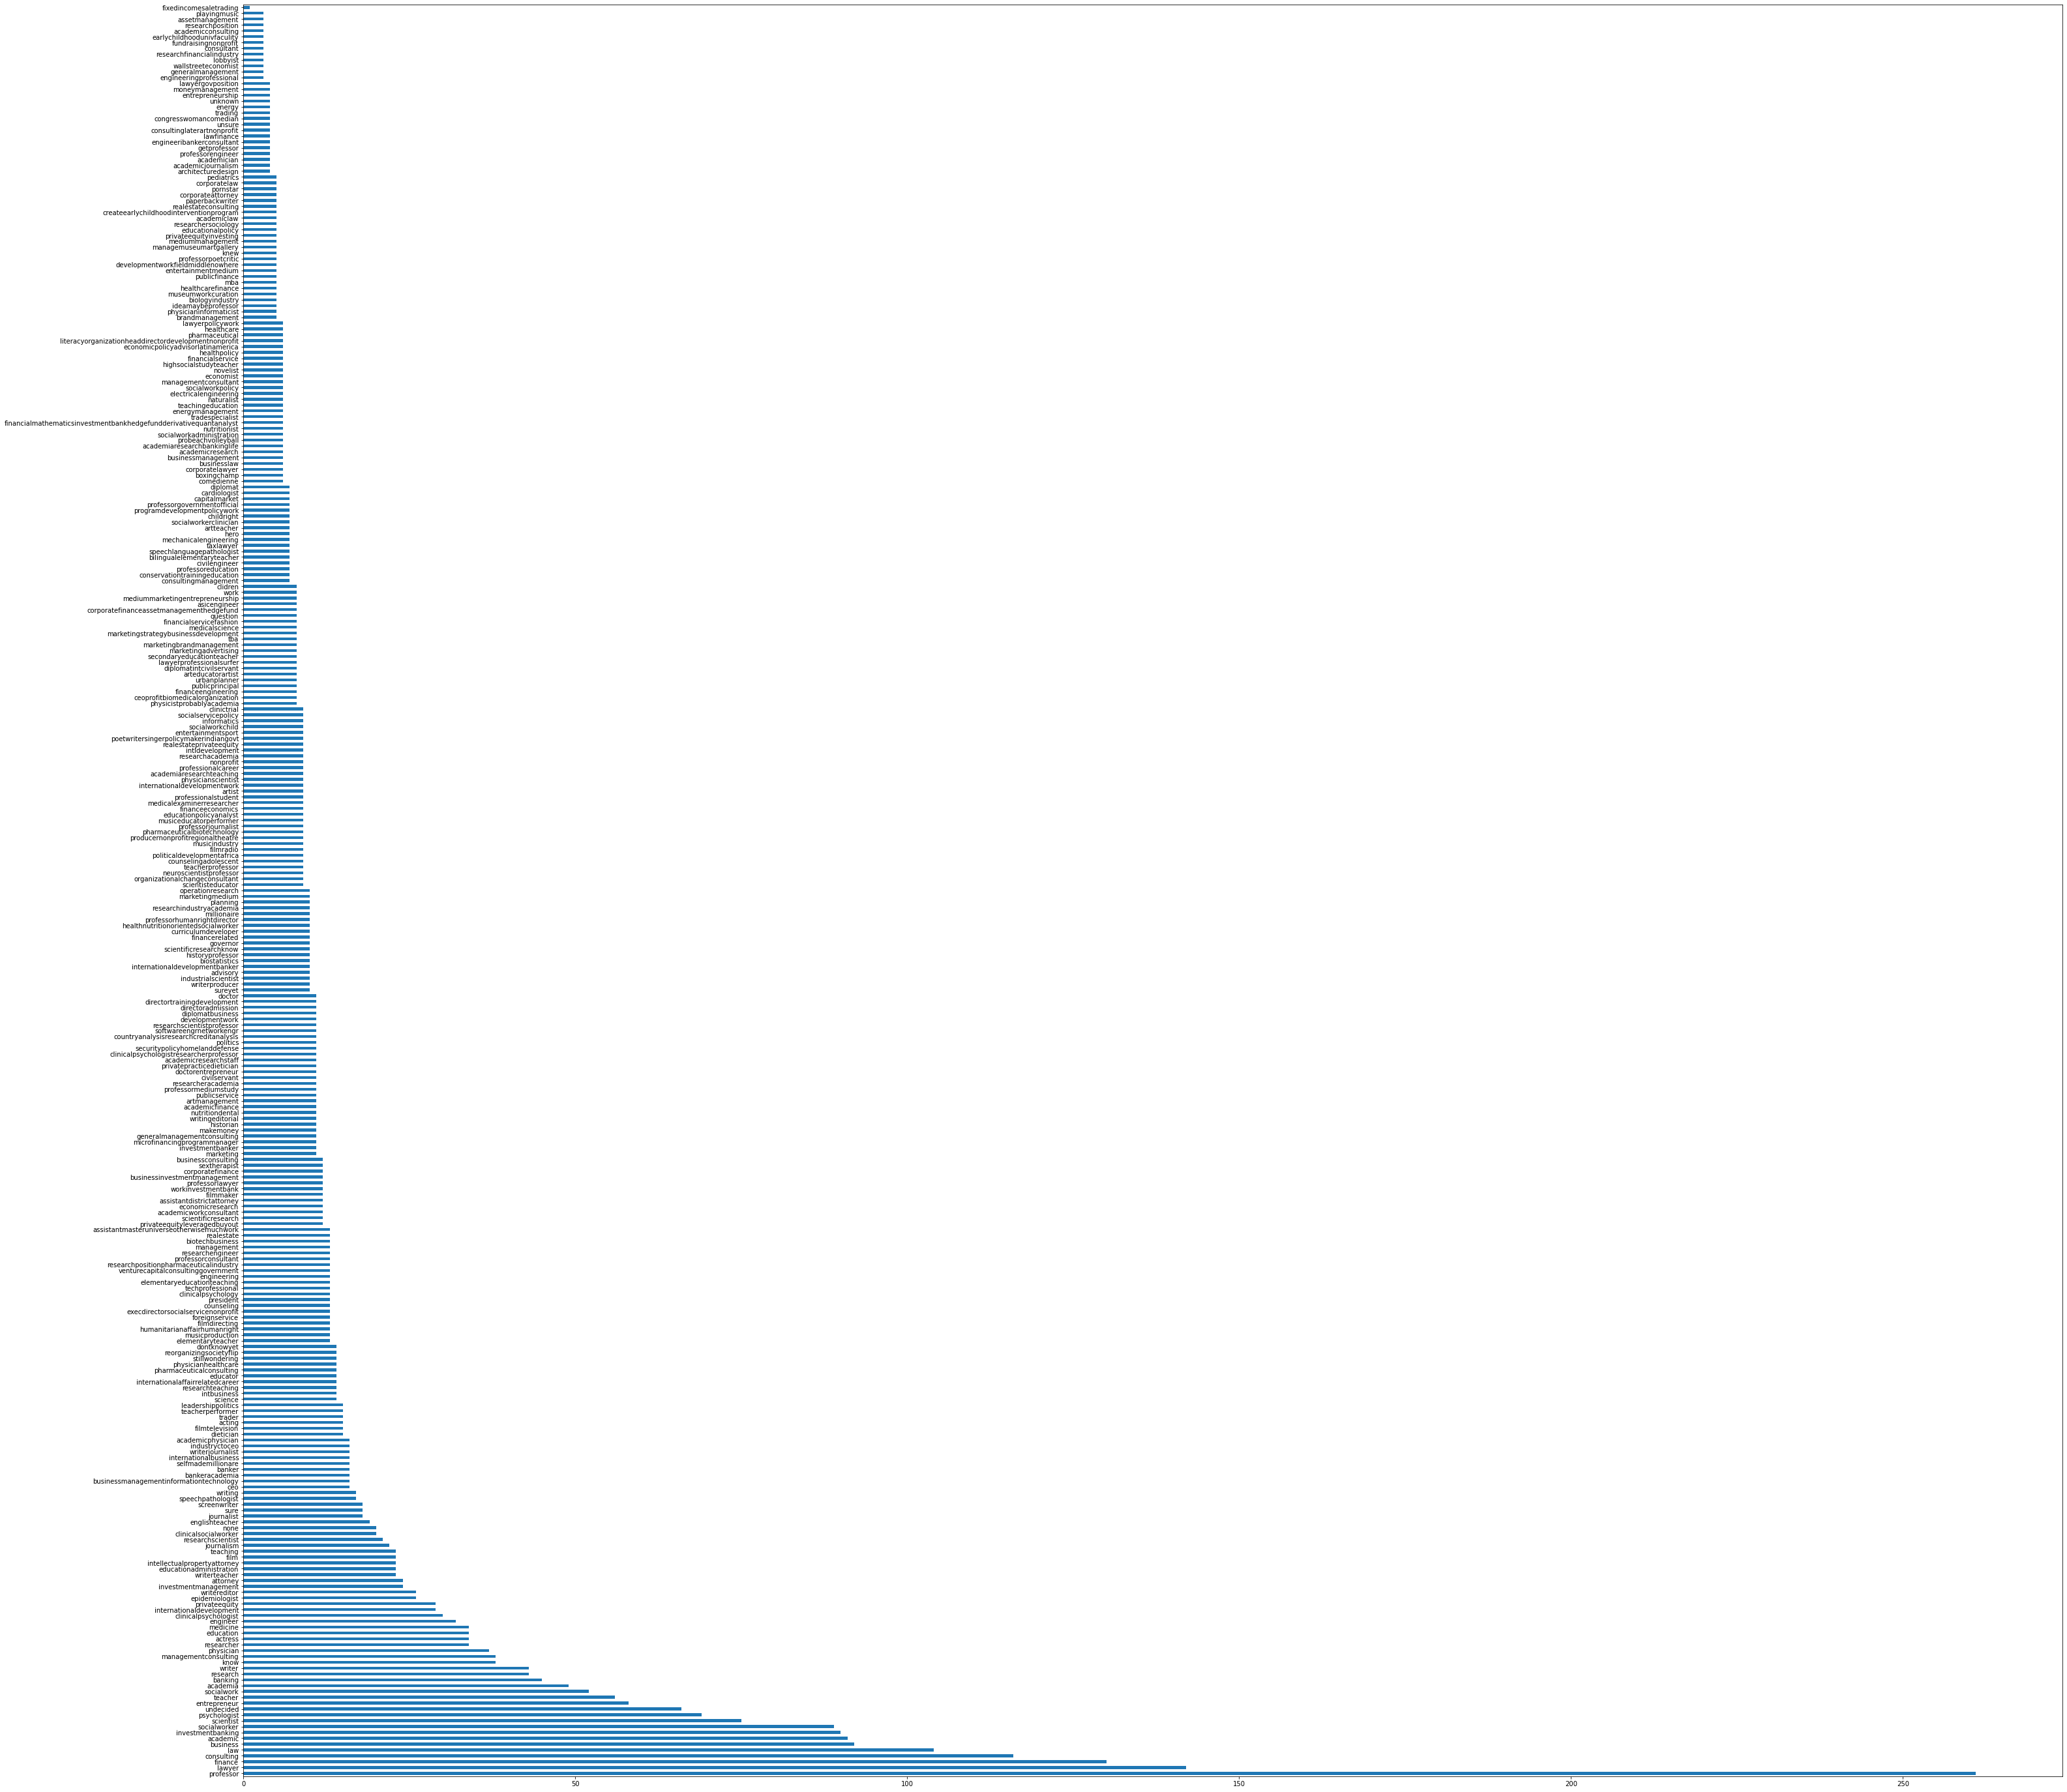

field       None
undergra    None
from        None
career      None
dtype: object

In [ ]:
train_data.select_dtypes(include=['category']).apply(values_unique)# Visualize object columns after preprocessing

# Target Column
--------------------------------------------------------------------------
--------------------------------------------------------------------------

classes in rating column [0 1]


<AxesSubplot:>

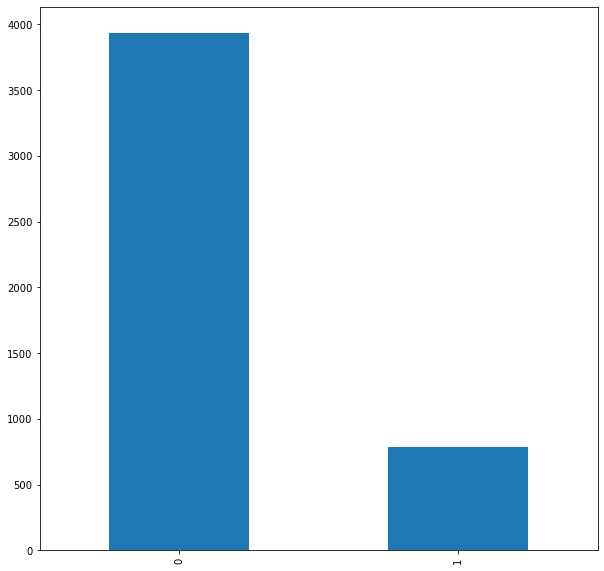

In [ ]:
plt.rcParams['figure.figsize'] = [10,10]
print("classes in rating column" , np.unique(data["match"]))
#plot count of each class in target column 
train_data["match"].value_counts().plot(kind='bar')

**Observation**

- The match is 0 or 1.
- There is imbalance between classes. Class 0 has highly counts. We are expected that will have a bad effect in our model.
The model will have an overfiting problem.we will solve this problem later

# Apply on Training Data
-------------------------------------------------
--------------------------------------------------

In [ ]:
# Call the preprocessing class to descover train data and apply preprocessing methods
preprocessing_steps = preprocessing(train_data)

# Explore Data
------------------------------------------------------------
-------------------------------------------------------

- ### Check null values

In [ ]:
preprocessing_steps.null_values()

null_val  percent_
num_in_3      4359      92.0
numdat_3      3883      82.0
expnum        3712      79.0
intel7_2      3596      76.0
fun7_3        3599      76.0
shar7_2       3601      76.0
intel7_3      3599      76.0
sinc7_3       3599      76.0
attr7_3       3599      76.0
attr7_2       3596      76.0
sinc7_2       3610      76.0
shar7_3       3599      76.0
amb7_3        3599      76.0
fun7_2        3596      76.0
attr5_3       3599      76.0
sinc5_3       3599      76.0
amb7_2        3610      76.0
intel5_3      3599      76.0
fun5_3        3599      76.0
amb5_3        3599      76.0
shar2_3       3599      76.0
sinc4_3       3080      65.0
fun4_3        3080      65.0
attr4_3       3080      65.0
intel4_3      3080      65.0
amb4_3        3080      65.0
shar4_3       3080      65.0
attr2_3       3080      65.0
sinc2_3       3080      65.0
intel2_3      3080      65.0
fun2_3        3080      65.0
amb2_3        3080      65.0
mn_sat        2947      62.0
tuition       2696      57.0
attr3_3       2503      53.0
them_cal      2503      53.0
intel3_3      2503      53.0
sinc3_3       2503      53.0
you_call      2503      53.0
attr1_3       2503      53.0
sinc1_3       2503      53.0
amb1_3        2503      53.0
amb3_3        2503      53.0
fun3_3        2503      53.0
shar1_3       2503      53.0
date_3        2503      53.0
intel1_3      2503      53.0
fun1_3        2503      53.0
attr3_s       2469      52.0
sinc3_s       2469      52.0
fun3_s        2469      52.0
amb3_s        2469      52.0
intel3_s      2469      52.0
amb1_s        2404      51.0
fun1_s        2404      51.0
intel1_s      2404      51.0
sinc1_s       2404      51.0
attr1_s       2404      51.0
shar1_s       2404      51.0
income        2322      49.0
attr5_2       2243      47.0
sinc5_2       2243      47.0
intel5_2      2243      47.0
fun5_2        2243      47.0
amb5_2        2243      47.0
undergra      1971      42.0
attr5_1       1954      41.0
amb5_1        1954      41.0
fun5_1        1954      41.0
sinc5_1       1954      41.0
intel5_1      1954      41.0
sinc2_2       1457      31.0
shar2_2       1457      31.0
attr4_2       1457      31.0
sinc4_2       1457      31.0
intel4_2      1457      31.0
fun4_2        1457      31.0
amb4_2        1457      31.0
shar4_2       1457      31.0
attr2_2       1457      31.0
intel2_2      1457      31.0
fun2_2        1457      31.0
amb2_2        1457      31.0
sinc4_1       1071      23.0
attr4_1       1071      23.0
fun4_1        1071      23.0
shar4_1       1082      23.0
amb4_1        1071      23.0
intel4_1      1071      23.0
positin1      1048      22.0
match_es       670      14.0
shar_o         625      13.0
shar           621      13.0
zipcode        585      12.0
amb1_2         513      11.0
numdat_2       531      11.0
attr1_2        519      11.0
sinc1_2        513      11.0
intel1_2       513      11.0
attr3_2        513      11.0
shar1_2        513      11.0
sinc3_2        513      11.0
amb3_2         513      11.0
satis_2        513      11.0
fun3_2         513      11.0
intel3_2       513      11.0
length         513      11.0
fun1_2         513      11.0
amb            416       9.0
amb_o          412       9.0
fun_o          222       5.0
met_o          228       5.0
fun            220       5.0
intel          179       4.0
prob           191       4.0
prob_o         191       4.0
sinc_o         176       4.0
intel_o        183       4.0
sinc           167       4.0
met            211       4.0
like_o         153       3.0
attr           124       3.0
attr_o         132       3.0
like           154       3.0
from           118       2.0
shar1_1         72       2.0
career_c        89       2.0
int_corr        92       2.0
field           40       1.0
date            64       1.0
goal            51       1.0
intel2_1        51       1.0
pf_o_sin        47       1.0
imprelig        51       1.0
imprace         51       1.0
race            40       1.0
field_cd        53       1.0
pf_o_int

**Observation**

- There is a lot of columns that have null values above 64 % . This percent considers a little bit big. So,It is better to remove columns that have missing values more than 64 %.

- ### Check duplications

In [ ]:
preprocessing_steps.duplicated_values()

Number of duplicated rows 0


**Observations**


Thanks to allah, there is no duplication in our data 

- ### Constant Features 

In [ ]:
preprocessing_steps.constant_columns()

[]

**Observation**
- Thanks to Allah, There is no constant features. Features that have the same values across all samples

- ###  Check redundant_features


In [ ]:
high_corr_features , corr = preprocessing_steps.redundant_features()
print("Features that are highly correlated " , high_corr_features)
print("Number of Features that are highly correlated " , len(high_corr_features))

corr

Features that are highly correlated  ['pid']
Number of Features that are highly correlated  1


gender       idg    condtn      wave     round  position  positin1  \
gender       NaN  0.030547  0.001911  0.000855  0.013315  0.008431  0.010690   
idg          NaN       NaN  0.332368  0.093197  0.387093  0.162839  0.168458   
condtn       NaN       NaN       NaN  0.221412  0.822097  0.337218  0.310304   
wave         NaN       NaN       NaN       NaN  0.231954  0.080897  0.061067   
round        NaN       NaN       NaN       NaN       NaN  0.384535  0.369558   
position     NaN       NaN       NaN       NaN       NaN       NaN  0.732574   
positin1     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
order        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
partner      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pid          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
int_corr     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
samerace     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
age_o        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
race_o       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pf_o_att     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pf_o_sin     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pf_o_int     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pf_o_fun     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pf_o_amb     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pf_o_sha     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
attr_o       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
sinc_o       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
intel_o      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
fun_o        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
amb_o        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
shar_o       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
like_o       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
prob_o       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
met_o        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
age          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
field_cd     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
mn_sat       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
tuition      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
race         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
imprace      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
imprelig     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
zipcode      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
income       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
goal         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
date         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
go_out       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
career_c     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
sports       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
tvsports     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
exercise     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
dining       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
museums      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
art          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
hiking       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
gaming    

**Observation**

- As you can see, there is onl one column is highly correlated to each other. we have to remove them to prevent the bad effect of these columns in the performance. we will drop them later

- ### Check cardinality

In [ ]:
preprocessing_steps.cardinality()

unique_val  percent_
id              4727     100.0
pid              551      12.0
zipcode          409       9.0
income           261       6.0
career           304       6.0
from             216       5.0
field            211       4.0
undergra         202       4.0
int_corr         156       3.0
amb2_2            77       2.0
shar1_2           83       2.0
tuition          116       2.0
sinc2_1           81       2.0
attr2_2           82       2.0
amb2_1            78       2.0
shar2_1           73       2.0
fun1_2            75       2.0
fun2_1            75       2.0
attr1_1           95       2.0
sinc1_1           79       2.0
fun1_1            72       2.0
amb1_1            83       2.0
shar1_1           86       2.0
intel2_1          79       2.0
amb1_2            74       2.0
attr2_1           87       2.0
attr1_s           74       2.0
attr1_2           78       2.0
pf_o_sin          79       2.0
pf_o_att          95       2.0
shar1_s           76       2.0
pf_o_fun          72       2.0
pf_o_amb          83       2.0
sinc1_2           72       2.0
pf_o_sha          86       2.0
amb1_s            77       2.0
intel1_1          66       1.0
intel1_2          68       1.0
fun1_3            54       1.0
attr4_1           34       1.0
sinc4_1           25       1.0
age_o             25       1.0
intel4_1          25       1.0
shar2_2           65       1.0
amb4_1            26       1.0
fun2_2            62       1.0
shar4_1           26       1.0
attr1_3           57       1.0
sinc1_3           48       1.0
attr2_3           24       1.0
intel1_3          45       1.0
amb1_3            57       1.0
attr4_3           24       1.0
sinc1_s           68       1.0
age               25       1.0
intel1_s          65       1.0
attr4_2           28       1.0
fun1_s            65       1.0
mn_sat            69       1.0
intel4_2          26       1.0
shar1_3           54       1.0
idg               44       1.0
amb4_2            25       1.0
pf_o_int          66       1.0
sinc2_2           68       1.0
intel2_2          70       1.0
fun4_2            23       0.0
fun3_2            11       0.0
intel3_2           8       0.0
sinc3_2           10       0.0
sinc4_2           23       0.0
attr3_2           10       0.0
shar7_2           15       0.0
amb7_2            11       0.0
fun7_2            17       0.0
shar4_2           23       0.0
intel7_2          17       0.0
gender             2       0.0
them_cal           9       0.0
amb3_2            10       0.0
sinc3_3           11       0.0
shar4_3           17       0.0
sinc2_3           14       0.0
intel2_3          18       0.0
fun2_3            17       0.0
amb2_3            18       0.0
shar2_3           13       0.0
attr3_3           11       0.0
intel3_3          10       0.0
attr5_2           10       0.0
fun3_3            11       0.0
amb3_3            12       0.0
attr5_3           10       0.0
sinc5_3           10       0.0
intel5_3           8       0.0
fun5_3            11       0.0
amb5_3            10       0.0
amb4_3            21       0.0
fun4_3            16       0.0
intel4_3          17       0.0
sinc4_3           17       0.0
sinc5_2           10       0.0
intel5_2           9       0.0
fun5_2            10       0.0
amb5_2             9       0.0
you_call          10       0.0
attr7_2           17       0.0
date_3             3       0.0
numdat_3           7       0.0
num_in_3           5       0.0
attr7_3           22       0.0
sinc7_3           14       0.0
intel7_3          15       0.0
fun7_3            17       0.0
amb7_3            14       0.0
shar7_3           16       0.0
sinc7_2           17       0.0
fun               15       0.0
numdat_2           4       0.0
met_o              6       0.0
race               6       0.0
imprace           12       0.0
imprelig          11       0.0
goal               7       0.0
date               8       0.0
go_out             8       0.0
career_c          18       0.0
sports            11       0.0
tvsports   

**Observations**
- id  has high cardinality.This column is useless. So, we will drop this column later

# Preprocessing Stage 
------------------------------------
---------------------------------------




- drop columns that has missing values more than 64%
- drop cardinality columns 
- drop redundant features



In [ ]:
# Determine columns will be dropped and will be filled
cols_to_drop = preprocessing_steps.columns_to_drop()

Number of columns that will be dropped  34


# A Tunable Pipeline

In [ ]:
# we extract numeric features and categorical features names for later use

data_cleaned = preprocessing_steps.drop_col(cols_to_drop)
# numeric features can be selected by: (based on the df2.info() output )
features_numeric = list(data_cleaned.drop("match", axis = 1).select_dtypes(include=['float64', 'int64']))
features_numeric.remove('idg')# drop this column as it is useless
# categorical features can be selected by: (based on the df2.info() output )
features_categorical = list(data_cleaned.drop("match", axis = 1).select_dtypes(include=['category']))
features_categorical.remove('field') # # drop this column as there is another column give the same info (career)
print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['gender', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es

In [ ]:

np.random.seed(0)
#-------------------------------preprocess-----------------------
'''
This fUnction applies a preprocessing steps on categorical and numeric. In numeric, it fill nan we will try different methods and convert them into one hot encoding.In categorical, it fill nan we will try different methods and apply scaler transofm in them.
we will try different methods.
'''
def preprocessor(imputer_num , scaler , imputer_cat ):
    
    transformer_numeric = Pipeline(
        steps=[
            ('imputer', imputer_num),
            ('scaler', scaler)]
    )

    transformer_categorical = Pipeline(
        steps=[
            ('imputer', imputer_cat),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]
    )

    # we also specify what are the categorical 
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numeric, features_numeric),
            ('cat', transformer_categorical, features_categorical)
        ], remainder='drop'
    )
    return preprocessor


# Preprocessing

In [ ]:
smt = SMOTE()

preprocess_1st =  preprocessor(SimpleImputer() , StandardScaler() , SimpleImputer(strategy='constant') )
preprocess_2nd =  preprocessor(SimpleImputer() , MinMaxScaler(), SimpleImputer(strategy='constant') )



In [ ]:
xTrain = train_data.drop("match", axis = 1)
yTrain = train_data['match']
xTest = test_data.drop("match", axis = 1)
yTest = test_data['match']

# Model

In [ ]:

#-------------------------------------- Build model ^_^ ----------------------------
''' 
This Function takes model and applies preprocessor_steps, smote and selected_feature .Then combine them in single pipeline 
'''
def buid_model(model_trail , preprocessor_steps , Smote_method ,selected_feature):
    # combine the preprocessor with the model as a full tunable pipeline
    # we gave them a name so we can set their hyperparameters
    model = Pipeline(steps=[('preprocessor', preprocessor_steps), ('select_feature' , selected_feature) ,('smote', Smote_method), ("model", model_trail)])
    return model


# Evaluate Model

In [ ]:
#------------------------------ Evaluation Function ^_^ --------------------------
'''
This Function takes model and evaluate this model on train and test data through some evaluation matrics such as classification report , auc ,and accuracy.
'''

def evaluation(model , x_train , x_test , y_test , y_train):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    class_repo = classification_report(y_test, y_pred_test)
    print("Classification report" , class_repo)
    
    test_acc = accuracy_score(y_test ,y_pred_test)
    train_acc = accuracy_score(y_train,y_pred_train)
    print("Accuracy in train data" , train_acc)
    print("Accuracy in test data" , test_acc)

    prob_y_pred = model.predict_proba(x_test)[:,1]
    prob_y_pred_train = model.predict_proba(x_train)[:,1]
    
    #calculate AUC of model
    auc = metrics.roc_auc_score(y_test, prob_y_pred)
    auc_train = metrics.roc_auc_score(y_train, prob_y_pred_train)
    

    #print AUC score
    print("AUC test " , auc)
    print("AUC train " , auc_train)
    
    return  test_acc , train_acc , auc

In [ ]:
def save_model(model , model_name):
    # save
    joblib.dump(model, "model_{}.pk".format(model_name))

# Submission

In [ ]:
#------------------------------ csv creation Function ^_^ --------------------------
'''
This Function takes model and submission_data .Then apply model in this data. save the predicted values in csv file 
'''
def submitted_file(model ,  data , model_name):
    submission = pd.DataFrame()

    submission['id'] = submission_data['id']

    submission['match'] = model.predict_proba(data)[:,1]

    submission.to_csv('sample_submission_walkthrough_{}.csv'.format(model_name), index=False)

# Random Forest Grid Search (1st trail)


---



---



---



I preferred to start with random search optimizer because it is usually faster than the rest optimizer with

In this trail, we will:
 - apply smote to solve the imbalance 
 - use SimpleImputer to fill na in categorical and numerical features
 - apply Standerscaler to deal with skewed data distribution
 - use Grid Search to tune hyper parameters
 - use 5kfold cross validation

In [ ]:

Random_forest_model = RandomForestClassifier()
Random_forest_model = buid_model(Random_forest_model ,preprocess_1st , smt ,None )
param_grid_1st = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'model__n_estimators': [20, 30, 40 , 50],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'model__max_depth':[10, 20, 30 , 80, 77]  ,
    'model__class_weight' : ['balanced', 'balanced_subsample'],
    'model__n_estimators' : [20,100,170 ,77]
}

grid_search_1st = GridSearchCV(Random_forest_model, param_grid_1st, cv=5, verbose=5, n_jobs=-1, scoring='roc_auc')
grid_search_1st.fit(xTrain, yTrain)

print('best score {}'.format(grid_search_1st.best_score_))
print('best params 2nd trail (grid search) {}'.format(grid_search_1st.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.7min finished


best score 0.8505021980586184
best params 2nd trail (grid search) {'model__class_weight': 'balanced', 'model__max_depth': 77, 'model__n_estimators': 170, 'preprocessor__num__imputer__strategy': 'mean'}


**Observation 💡💡💡💡💡**
- The auc score is quit good .

- Don't be too quick to judge. Let's see how the model perforn on unseen data.

### Save model


---



---



In [ ]:
save_model(grid_search_1st , 'random_forest_grid_1st_trail')

### Evaluate 


---



---



---




In [ ]:
test_acc , train_acc , auc = evaluation(grid_search_1st , xTrain, xTest, yTest , yTrain)

Classification report               precision    recall  f1-score   support

           0       0.89      0.96      0.92       984
           1       0.66      0.43      0.52       198

    accuracy                           0.87      1182
   macro avg       0.78      0.69      0.72      1182
weighted avg       0.85      0.87      0.86      1182

Accuracy in train data 1.0
Accuracy in test data 0.868020304568528
AUC test  0.8726287262872628
AUC train  1.0


**Observation 💡💡💡💡💡**

- The model is overfitting as you see the model doesn't perform well  on test data (accuracy test 86%) compared to accuracy in train (1 %).This is due to depth is high. we need to trim it. Also, if we change the search space of estimators. Increasing estimators improve the accuracy. Reducing max depth and Increasing estimators improve the performance.

- we need to reduce features .
- Although the model achieve a good auc score but we excepted that the model will fail in unseen data. 

- The difference between accuracy in train and test is a large 


- Random Forest is observed high bias to class 0.
- Random Forest can'nt handle imbalance. Also,smote method doesn't work.

 

- Score in Kaggle : 84.692 % auc 

In [ ]:
submitted_file(grid_search_1st ,  submission_data , 'random_forest_grid_1st_trail')

# Random Forest Random Search (2nd trail)


---



---



---



we will try to change the preprocessing method on the model.

In this trail, we will:

- apply smote to solve the imbalance
- use SimpleImputer to fill na in categorical and numerical features
- apply MinMaxScaler to deal with skewed data distribution
- use Random Search to tune hyper parameters
- use 5kfold cross validation
- Select the most important features (177 features)

In [ ]:

Random_forest_model_2 = RandomForestClassifier()
Random_forest_model_2nd = buid_model(Random_forest_model_2 ,preprocess_2nd , smt,SelectKBest(mutual_info_classif, k=177) )
param_grid_2nd = {

     'preprocessor__num__imputer__strategy': ['mean','median'],
    'model__n_estimators': [20, 30, 40 , 50],  
    'model__max_depth':[10, 20, 30 , 80, 77]  ,
    'model__class_weight' : ['balanced', 'balanced_subsample'],
    'model__n_estimators' : [20,100,170 ,77]
}

random_search_2nd = RandomizedSearchCV(Random_forest_model_2nd, param_grid_2nd, cv=5,n_iter= 10, verbose=5, n_jobs=-1, scoring='roc_auc')
random_search_2nd.fit(xTrain, yTrain)

print('best score {}'.format(random_search_2nd.best_score_))
print('best params 2nd trail random search {}'.format(random_search_2nd.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.3s finished


best score 0.8550246075283139
best params 2nd trail random search {'preprocessor__num__imputer__strategy': 'median', 'model__n_estimators': 77, 'model__max_depth': 10, 'model__class_weight': 'balanced'}


**Observation 💡💡💡💡💡**

- There is no significant improvement .The auc score is approximately the same.

Don't be too quick to judge. Let's see how the model perforn on unseen data.

### Save model


---



---



In [ ]:
save_model(random_search_2nd , 'random_forest_grid_2nd_trail')

### Evaluate 


---



---



---




In [ ]:
test_acc , train_acc , auc = evaluation(random_search_2nd , xTrain, xTest, yTest , yTrain)

Classification report               precision    recall  f1-score   support

           0       0.92      0.89      0.91       984
           1       0.54      0.61      0.57       198

    accuracy                           0.85      1182
   macro avg       0.73      0.75      0.74      1182
weighted avg       0.86      0.85      0.85      1182

Accuracy in train data 0.9401311614131584
Accuracy in test data 0.8460236886632826
AUC test  0.8597920259505625
AUC train  0.9771804657533364


**Observation 💡💡💡💡💡**

-The overfit is reduced but still there is overfit in the model.
The model is overfitting as you see the model doesn't perform well on test data (accuracy test 84%) compared to accuracy in train (94%).

- we need to reduce features .

- Although the model achieve a good auc score but we excepted that the model will fail in unseen data.

- The difference between accuracy in train and test is a large

- Random Forest is observed high bias to class 0.
- Random Forest can'nt handle imbalance. Also,smote method doesn't work.

- This trail is better than the previous one 

Score on kaggle: 86 % 

In [ ]:
submitted_file(random_search_2nd ,  submission_data , 'random_forest_randomsearch_2nd_trail')

# Xgboost Grid Search (3th trail)


---



---



---



- In this trail ,we will use XGboost. The reason why we will make this certain change the most important differences between XG Boost and Random forest that:
  - XGBoost always gives more importance to functional space when reducing the cost of a model while Random Forest tries to give more preferences to hyperparameters to optimize the model.
  - A small change in the hyperparameter will affect almost all trees in the forest which can alter the prediction.
  - Also, this is not a good approach when we expect test data with so many variations in real-time with a pre-defined mindset of hyperparameters for the whole forest but XG boost hyperparameters are applied to only one tree at the beginning which is expected to adjust itself in an efficient manner when iterations progress.
  - Also, the XGBoost needs only a very low number of initial hyperparameters (shrinkage parameter, depth of the tree, number of trees) when compared with the Random forest.



In this trail, we will:

- apply smote to solve the imbalance
- use SimpleImputer to fill na in categorical and numerical features
- apply MinMaxScaler to deal with skewed data distribution
- use Grid Search to tune hyper parameters
- use 5kfold cross validation
-  Select the most important features (177 features)

In [ ]:

xgb_model_2 = XGBClassifier()
xgb_model_2nd = buid_model(xgb_model_2 ,preprocess_2nd , smt, SelectKBest(mutual_info_classif, k=177) )
param_grid_4th = {
    'preprocessor__num__imputer__strategy': ['mean' ,'median'],
    'model__n_estimators': [100,200,500],
    'model__max_depth':[5,7,10,15,80,100],
    'model__subsample':[0.6,0.8,1],
    'model__colsample_bytree':[0.5,0.7,1],
}

bayes_search_xgb_4th = GridSearchCV(xgb_model_2nd, param_grid_4th, cv=5, verbose=5, n_jobs=-1, scoring='roc_auc')
bayes_search_xgb_4th.fit(xTrain, yTrain)

print('best score {}'.format(bayes_search_xgb_4th.best_score_))
print('best params for xgb (4th trail) {}'.format(bayes_search_xgb_4th.best_params_))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 35.2min finished


best score 0.865390794688572
best params for xgb (4th trail) {'model__colsample_bytree': 0.5, 'model__max_depth': 15, 'model__n_estimators': 500, 'model__subsample': 1, 'preprocessor__num__imputer__strategy': 'mean'}


**Observation 💡💡💡💡💡**

There is a significant improvement in the auc score.Score increased from 85.5% to 86.5%



Don't be too quick to judge. Let's see how the model perforn on unseen data.

### Save model


---



---



In [ ]:
save_model(bayes_search_xgb_4th , 'xgb_bayse_4th_trail')

### Evaluate 


---



---



---




In [ ]:
test_acc , train_acc , auc = evaluation(bayes_search_xgb_4th , xTrain, xTest, yTest , yTrain)

Classification report               precision    recall  f1-score   support

           0       0.90      0.95      0.93       984
           1       0.67      0.48      0.56       198

    accuracy                           0.87      1182
   macro avg       0.79      0.72      0.74      1182
weighted avg       0.86      0.87      0.87      1182

Accuracy in train data 1.0
Accuracy in test data 0.873942470389171
AUC test  0.8870924694095426
AUC train  1.0


**Observation 💡💡💡💡💡**

- The model is overfitting as you see the model doesn't perform well on test data (accuracy test 87%) compared to accuracy in train (1 %).This is due to depth is high. we need to trim it. Also, if we change the search space of estimators and max depth. Increasing estimators improve the accuracy. Reducing max depth and Increasing estimators improve the performance.

- we need to reduce features.The data is retivaley small and highly imbalnaced

- Although the model achieve a good auc score but we excepted that the model will fail in unseen data.

- The difference between accuracy in train and test is a large

- Xgboost is observed high bias to class 0.

- Smote method doesn't work.

- Surperisely , We noticed a significant improvement in score from 86 % (using randomforest ) to 87.536% (using xgboot). 

Score on kaggle : 87.536% 🥳🥳🥳🥳 (although it is achieved high score, I can't garantuee that it will achieve in the private high score Due to overfitting)

Let's try to improve our model


In [ ]:
submitted_file(bayes_search_xgb_4th ,  submission_data , 'xgb_bayse_4th_trail')

# SVM Random Search (4th trail) 
---------------------
---------------------------

- In this trail ,we will try to change the model and apply the same preprocessing methods.As you see in the previous trail, the model is overfit although it achieve high score .But we need to overcome this overfitting


In this trail, we will:

- apply smote to solve the imbalance
- use SimpleImputer to fill na in categorical and numerical features
- apply MinMaxScaler to deal with skewed data distribution
- use Bayesian Search to tune hyper parameters
- use 5kfold cross validation
-  Select the most important features (125 features)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
SVM_model_1 = SVC(probability=True)
SVM_model_1st = buid_model(SVM_model_1 ,preprocess_2nd , smt ,SelectKBest(mutual_info_classif, k=125))
param_grid_5th = {
    'preprocessor__num__imputer__strategy': ['mean' ,'median'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
     # kernel type to be used in the algorithm
    'model__kernel': ['rbf' , 'poly'],
     # Regularization parameter l2   
    'model__C': [ 0.1,0.5,2],
    'model__degree':[2 , 3 ,4],
#     'model__class_weight':['balanced' , dict ],
    
}

bayes_search_SVM_5th =  BayesSearchCV(SVM_model_1st, param_grid_5th, cv=5, verbose=5, n_jobs=-1, scoring='roc_auc')
bayes_search_SVM_5th.fit(xTrain, yTrain)

print('best score {}'.format(bayes_search_SVM_5th.best_score_))
print('best params for SVM (5th trail) {}'.format(bayes_search_SVM_5th.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.5s remaining:   47.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.9s remaining:   46.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.0s remaining:   45.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.0s remaining:   39.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.0s remaining:   43.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   37.1s remaining:   55.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.9s remaining:   39.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.7s remaining:   46.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.5s remaining:   39.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.4s remaining:   39.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.0s remaining:   45.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.6s remaining:   50.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.2s remaining:   42.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.1s remaining:   42.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   37.3s remaining:   55.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.6s remaining:   39.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.1s remaining:   39.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.1s remaining:   39.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.9s remaining:   45.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.3s remaining:   57.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.0s remaining:   39.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.6s remaining:   35.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.1s remaining:   40.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.1s remaining:   43.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.0s remaining:   45.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.4s remaining:   41.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.1s remaining:   40.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.3s remaining:   47.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.4s remaining:   48.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.1s remaining:   57.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.1s remaining:   46.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.2s remaining:   39.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.4s remaining:   57.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   37.3s remaining:   56.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.1s remaining:   40.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.6s remaining:   38.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.8s remaining:   37.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.0s remaining:   40.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.4s remaining:   36.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.1s remaining:   42.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.6s remaining:   41.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.9s remaining:   44.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.6s remaining:   39.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.9s remaining:   42.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.2s remaining:   48.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.3s remaining:   39.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.3s remaining:   43.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.9s remaining:   38.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.1s remaining:   40.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.1s remaining:   45.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.5s finished


best score 0.851252845241634
best params for SVM (5th trail) OrderedDict([('model__C', 0.5), ('model__degree', 3), ('model__kernel', 'poly'), ('preprocessor__num__imputer__strategy', 'median')])


**Observation 💡💡💡💡💡**

Unfortunately , The model goes worst. It doesn't achieve higher score.

Don't be too quick to judge. Let's see how the model perforn on unseen data.

In [ ]:
save_model(bayes_search_SVM_5th , 'bayes_search_SVM_5th')
test_acc , train_acc , auc = evaluation(bayes_search_SVM_5th , xTrain, xTest, yTest , yTrain)
submitted_file(bayes_search_SVM_5th ,  submission_data , 'bayes_search_SVM_5th')

Classification report               precision    recall  f1-score   support

           0       0.95      0.81      0.87       984
           1       0.45      0.78      0.57       198

    accuracy                           0.80      1182
   macro avg       0.70      0.79      0.72      1182
weighted avg       0.86      0.80      0.82      1182

Accuracy in train data 0.8313941188914745
Accuracy in test data 0.8020304568527918
AUC test  0.8780179847253018
AUC train  0.9005944897965746


**Observation 💡💡💡💡💡**

- The model solve the overfitting. 
- The model stil bais toward class 0 . 
- Maybe if we change the preprocessing methods or hyperparmeters search space .The performance will improve.

- Smote method doesn't work.The imbalance problem still exists


Score on kaggle :87.272%( Surperisely 😯😯😯, It achieved high score than score in training)

Let's try to improve our model

# Xgboost Bayes Search (5th trail)


---



---



---


- In this trail ,we will try to improve xgboost as it achieved the highest score till now. So, we are inspired to  change preprocessing methods and search method.

  - In this trail, we will :
  - apply smote to solve the imbalance
  - use SimpleImputer to fill na in categorical and numerical features
  - apply MinMaxScaler to deal with skewed data distribution
  - use Bayesian Search to tune hyper parameters
  - use 5kfold cross validation


In [ ]:
xgb_model_3 = XGBClassifier()
xgb_model_3rd = buid_model(xgb_model_3 ,preprocess_2nd ,smt, None )
param_grid_6th = {
    'preprocessor__num__imputer__strategy': ['mean' ,'median'],
    'model__n_estimators': [100,200,500],
    'model__max_depth':[79,30,10,15 , 11, 70 ,200,100],
    'model__subsample':[0.6,0.8,1],
    'model__colsample_bytree':[0.5,0.7,1],
}

bayes_search_xgb_6th = BayesSearchCV(xgb_model_3rd, param_grid_6th, cv=5, verbose=5, n_jobs=-1, scoring='roc_auc')
bayes_search_xgb_6th.fit(xTrain, yTrain)

print('best score {}'.format(bayes_search_xgb_6th.best_score_))
print('best params for xgb (6th trail) {}'.format(bayes_search_xgb_6th.best_params_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.0s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.4s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.9s remaining:   26.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.8s remaining:   20.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.1s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.2s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.6s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.0s remaining:   28.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.6s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.2s remaining:   22.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.8s remaining:   26.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.9s remaining:   38.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.4s remaining:   23.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.5s remaining:   21.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.1s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.9s remaining:   27.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.2s remaining:   21.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.5s remaining:   21.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.9s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.8s remaining:   38.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.2s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.0s remaining:   15.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.1s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.1s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.5s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.6s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.2s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.9s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.6s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.1s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.2s remaining:   37.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.5s remaining:   21.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.8s remaining:   28.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.3s remaining:   29.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.0s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.3s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.0s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.1s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.9s remaining:   13.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.4s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.2s remaining:   28.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.2s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.8s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.9s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.0s remaining:   21.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.6s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.6s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.3s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.1s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.8s remaining:   13.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.2s finished


best score 0.8662964324778712
best params for xgb (6th trail) OrderedDict([('model__colsample_bytree', 0.5), ('model__max_depth', 79), ('model__n_estimators', 200), ('model__subsample', 1.0), ('preprocessor__num__imputer__strategy', 'mean')])


**Observation 💡💡💡💡💡**

There is no  significant improvement in the auc score.Score is almost as the same previous trail (3rd trail using Xgboot)

Don't be too quick to judge. Let's see how the model perforn on unseen data.

In [ ]:
save_model(bayes_search_xgb_6th , 'bayes_search_xgb_6th')
test_acc , train_acc , auc = evaluation(bayes_search_xgb_6th , xTrain, xTest, yTest , yTrain)
submitted_file(bayes_search_xgb_6th ,  submission_data , 'bayes_search_xgb_6th')

Classification report               precision    recall  f1-score   support

           0       0.90      0.96      0.93       984
           1       0.69      0.49      0.57       198

    accuracy                           0.88      1182
   macro avg       0.80      0.72      0.75      1182
weighted avg       0.87      0.88      0.87      1182

Accuracy in train data 1.0
Accuracy in test data 0.8781725888324873
AUC test  0.8841155457009117
AUC train  1.0


**Observation 💡💡💡💡💡**

- The model is overfitting as you see the model doesn't perform well on test data (accuracy test 87%) compared to accuracy in train (1 %).This case is same as the 3rd trail (using Xgboot) .The is no significant difference
- There is a little improvement in f1score.


Surperisely , We noticed a little bit improvement in score from 87.53 % (using xgboost using grid search ) to 87.63% (using xgboot with baysain search).

Score on kaggle : 87.63% 🥳🥳🥳🥳 (although it is achieved high score, I can't garantuee that it will achieve in the private high score Due to overfitting)

Let's try to improve our model

# Classifier Voting bayes Search (6th trail)


---



---



---


- We are inspired to use voting classifer for multiple different classifiers.
we will use the same preprocessing methods that achievied high score.


  - In this trail, we will :
    - apply smote to solve the imbalance
    - use SimpleImputer to fill na in categorical and numerical features
    - apply MinMaxScaler to deal with skewed data distribution
    - use Grid Search to tune hyper parameters
    - use 5kfold cross validation
    - Select the most important features

In [ ]:
estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs',  max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('XGB', XGBClassifier()))
estimator.append(('Rand_forest', XGBClassifier()))
 
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='soft')

vot_model_= buid_model(vot_hard ,preprocess_2nd , smt ,SelectKBest(mutual_info_classif, k=200) )
param_grid_8th = {
    'preprocessor__num__imputer__strategy': ['mean' ,'median'],
}

bayes_search_vot_ = GridSearchCV(vot_model_, param_grid_8th, cv=5, verbose=5, n_jobs=-1, scoring='roc_auc')
bayes_search_vot_.fit(xTrain, yTrain)

print('best score {}'.format(bayes_search_vot_.best_score_))
print('best params for voting (8th trail) {}'.format(bayes_search_vot_.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   59.9s remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.0min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  1.8min remaining:   26.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


best score 0.859626626407843
best params for voting (8th trail) {'preprocessor__num__imputer__strategy': 'mean'}


**Observation 💡💡💡💡💡**

There is no  improvement in the auc score.Score is almost as the same previous trail (4th trail using svm)

Don't be too quick to judge. Let's see how the model perforn on unseen data.

In [ ]:
save_model(bayes_search_vot_ , 'bayes_search_vot__8th')
test_acc , train_acc , auc = evaluation(bayes_search_vot_ , xTrain, xTest, yTest , yTrain)
submitted_file(bayes_search_vot_ ,  submission_data , 'bayes_search_vot__8th')

Classification report               precision    recall  f1-score   support

           0       0.92      0.91      0.91       984
           1       0.57      0.62      0.60       198

    accuracy                           0.86      1182
   macro avg       0.75      0.76      0.76      1182
weighted avg       0.86      0.86      0.86      1182

Accuracy in train data 0.9997884493336154
Accuracy in test data 0.8595600676818951
AUC test  0.8754978648271331
AUC train  0.9999983924018481


**Observation** 💡💡💡💡💡

- The model is overfitting as you see the model doesn't perform well on test data (accuracy test 85%) compared to accuracy in train (99 %)..The is no significant difference

Surperisely , We noticed that it achieved score higher than we expected
Score on kaggle :87.327% 🥳🥳🥳🥳 (But Still Xgboost the best one tat achieved higher score compared to the rest )




---

---



---





---



#  🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?


A simple linear regression model without any activation function is not suitable for classification tasks because it assumes a linear relationship between the input variables and the output variable. However, in classification tasks, the output is categorical and discrete, and a straight line cannot accurately separate the classes.

On the other hand, Perceptron and logistic regression models use activation functions such as sigmoid or softmax that map the input to a probability distribution over the output classes. These activation functions introduce non-linearity into the model, which allows it to capture complex relationships in the data and make accurate predictions.

Furthermore, Perceptron and logistic regression models use a specific loss function, such as cross-entropy loss or hinge loss, that is optimized for classification tasks. These models also have a threshold function that determines which class the input should be assigned to based on the predicted probabilities.

In summary, a simple linear regression model without any activation function is not suitable for classification tasks because it cannot accurately model the non-linear relationships between input and output variables. Perceptron and logistic regression models, on the other hand, use activation functions and loss functions that are specifically designed for classification tasks and can make accurate predictions.






# 🌈What's a decision tree and how it is different to a logistic regression model?


A decision tree is a decision-making tool that uses a tree-like graph to illustrate different alternatives, probabilities, and potential outcomes. Decision trees are used in machine learning, business planning, finance, and other domains to evaluate complex decision problems.

On the other hand, logistic regression is a machine learning algorithm that is used to predict the probability of a binary outcome (e.g. yes or no). It is used extensively for classification problems. It models the relationship between a dependent variable and one or more independent variables.

The major difference between decision trees and logistic regression is that decision trees are a supervised learning approach, while logistic regression is a statistical method for regression analysis. Decision trees are simpler and easy to interpret, while logistic regression models are more complex and can handle multiple independent variables. Decision trees can handle both categorical and continuous data, but logistic regression can only handle continuous and binary data. Additionally, decision trees can handle missing data, but logistic regression cannot.


# 🌈What's the difference between grid search and random search?

Grid search and random search are techniques used in hyperparameter optimization, which involves finding the best values for the parameters of a machine learning model that cannot be learned from the data. The main difference between the two techniques is the way they search through the hyperparameter space.

Grid search involves exhaustively searching through a pre-defined set of hyperparameters by testing all possible combinations. This means that every combination of hyperparameter values is tried and tested, which guarantees that the best possible combination is found. However, this can be very time-consuming and computationally expensive, especially when dealing with a large hyperparameter space.

Random search, on the other hand, involves randomly selecting hyperparameter values from a pre-defined range for each parameter. This method is much faster than grid search since it does not need to test every possible combination of hyperparameters. It is also more effective than grid search in cases where the importance of individual hyperparameters is not known or where there are many irrelevant parameters. The downside of random search is that it may not always find the best combination of hyperparameters, although it often finds a very good one with much less computational effort.





# 🌈What's the difference between bayesian search and random search?

Bayesian search and random search are two approaches to hyperparameter optimization in machine learning.

Random search is a simple approach where hyperparameters are selected randomly from a predefined range. For example, if we have two hyperparameters a and b, and they are defined within the ranges [0,1] and [0,100], random search would randomly sample values for a and b within those ranges.

On the other hand, Bayesian search is a more sophisticated approach that uses probabilistic models to predict which hyperparameter combinations are likely to result in the best performance. Bayesian optimization builds a surrogate model of the objective function and searches for the best hyperparameters by iteratively balancing exploitation (exploiting regions of high expected improvement) and exploration (searching for regions of high uncertainty). The model is then updated sequentially as new results become available.

In summary, random search is a basic optimization algorithm that samples hyperparameters randomly, whereas Bayesian search is a more intelligent optimization algorithm that builds a probabilistic model of the objective function to balance exploration and exploitation.









---



---



---



---



#✔️ Problem Formulation
- ## Define the problem

   - The important part before starting to do any thing, we understand the problem very well to be able to be soundness about features you need and features have effect on your prediction.
   
   - Our goal of this problem is to predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events.
   
  - The outcome of a specific speed dating session is in categories from 0 to 1. This is a binary classification task. Given a data sample (information about the dating session), we are going to predict the probability (0-1, float) that the dating session will lead to a successful match.

#✔️ What is the input?
The input data we're dealing with is a profile of each participant in the session.

#✔️What is the output?
The output is a prediction of whether or not there will be a successful match => binary classification.

#✔️ What data mining function is required?
Note: Because we are predicting chance of a match rather than class labels, AUROC (or ROCAUC) is utilised as the evaluation metric on the predictions.

1- Importing the Libraries & Loading the Data : The data is imported from my Google Drive.

2- Data exploration : seaborn and matplotlib libraries are used to plot the data.

3- Data Preprocessing: In this step, we cleaned data from missing values ,duplicated rows , redundant features, high cardinality features and etc and drop columns that not important in the training model.Also, convert the categorical data to numirical data to make it ready for any type of model classification .

This step also include dealing with the Null values and replace it with one of the defined method (mean, median ,constant).
One_Hot_Encoding, Converting columns with string value to categorical features.
Normalizing, Making data with zero mean and scaling to unit variance.
Removing columns with unique value, like [ id , idg , pid , partner ] Its content was recognized by 'Speed Dating Data Description.pdf'
For hyperparameter optimization, three alternative search algorithms will be used => Grid search , Random search and Bayesian search.


4- Models:
- Random Forest :

Initially i thought it would be the best classifier for this problem.But trough trails, it wasn't the best one. It achieved the lowest score.
- XGBoost:

Although Random Forest was very good algorithm , XGBoost classifier gave better results.

- Support Vector Classifier rbf Kernel:

It's a nice classifier, His performance was good


#✔️What could be the challenges?




- The callenges were that
  - The difficulties will be determining the best technique for substituting missing values and determining the best hyperparameters for each model.Due to incomplete dating profiles, several values in the dataset are missing.

  -  some algorithms can get distracted from predicting the correct values Because of the large amount of data that needs a good cleaning

  - the implementation of effective preprocessing processes
  - the selection of appropriate features to increase model performance, are considered to be challenging.
  - How to choosing the optimal hyperparameters
  - How to improve the performance of the models

#✔️ What is the impact?
Understanding the features that contribute to successful matches would be the impact of this perfect solution, Furthermore, this would provide an opportunity to make useful recommendations for future speed dating events.

#✔️What is an ideal solution?
An ideal solution will effectively address these problems by creating a dataset-representative missing value replacement technique and optimising hyperparameters to make the most correct estimates possible.

And the best solution I found was by using the XGBoost Classifier

#✔️ What is the experimental protocol used and how was it carried out? & What preprocessing steps are used?


The experimental protocol that has used is :

Different methodologies for missing value replacement are used in data preparation measures.
On the preprocessed dataset, the classifier is utilised to make predictions.


Data Preprocessing steps are used: 
- we cleaned data from missing values ,duplicated rows , redundant features, high cardinality features and etc and drop columns that not important in the training model.Also, convert the categorical data to numirical data to make it ready for any type of model classification .

- This step also include dealing with the Null values and replace it with one of the defined method (mean, median ,constant).
One_Hot_Encoding, Converting columns with string value to categorical features.
Normalizing, Making data with zero mean and scaling to unit variance.
Removing columns with unique value, like [ id , idg , pid , partner ] Its content was recognized by 'Speed Dating Data Description.pdf'
For hyperparameter optimization, three alternative search algorithms will be used => Grid search , Random search and Bayesian search.

- Solve imablance using smote method

- Select the most important features 